In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle

In [2]:
bfolder = '2_bands/'
dffolder = '3_df/'

# Load list of DeliveryTimes and matching ForecastFiles that we want/need
tl = pd.read_csv('timeline_files.csv', index_col = 'DeliveryTime', parse_dates = True)
# Filter to first week of July 2017 to do testing
#tl = tl.loc['2017-07-01':'2017-07-07']
# Filter to June 2017 as we don't have data after mid-July
tl = tl.loc[:'2017-06']
print('Desired DeliveryTimes: ', str(tl.shape[0]))

# Filter to DeliveryTimes where we have matching forecasts
tl_with = tl[tl['NoForecast'] == 0]
print('Matching forecasts: ', str(tl_with.shape[0]))

# Filter to DeliveryTimes where we do not have matching forecasts
tl_without = tl[tl['NoForecast'] == 1]
print('Have no forecasts: ', str(tl_without.shape[0]))

# Create new empty DataFrame to hold the flattened maps
df = pd.DataFrame()

# Get list of available files
# Assumed that if it exists in band1 then it exists everywhere else, and vice versa
available_files = [file for file in os.listdir(bfolder+'band1/')]
print('Available forecasts: ', str(len(available_files)))
missing = []
errors = []

# Counter for debugging
k = 0

Desired DeliveryTimes:  49632
Matching forecasts:  16544
Have no forecasts:  33088
Available forecasts:  20773


In [3]:
# Iterate over rows where we have a matching forecast
for index, row in tl_with.iterrows():
    k = k + 1
    print(str(k), ' -- 0 -- ', str(index))
    # Check if the first forecast file is available (don't need the second as they're the same)
    if row['ForecastFile1'][7:-4]+'.npy' in available_files:
        try:
            map = np.zeros((55, 55, 5))
            # Load the five bands for the forecast file
            for i in range(5):
                # Load the prepared downsampled matrix
                m = np.load(bfolder+'band'+str(i+1)+'/'+row['ForecastFile1'][7:-4]+'.npy')
                # Store in Numpy array
                map[..., i] = m
            # Convert to 1D pandas DataFrame with matching DeliveryTime index value
            df_m = pd.DataFrame(map.flatten()).transpose()
            df_m.index = [index]
            df = df.append(df_m)
        except Exception as e:
            print('Some error occurred on NoForecast==0. Skipping.')
            errors.append(str(index) + ' -- 0 -- ' + str(e))
            continue
    else:
        missing.append(row['ForecastFile1'][7:-4])

1  -- 0 --  2011-11-02 00:00:00
2  -- 0 --  2011-11-02 03:00:00
3  -- 0 --  2011-11-02 06:00:00
4  -- 0 --  2011-11-02 09:00:00
5  -- 0 --  2011-11-02 12:00:00
6  -- 0 --  2011-11-02 15:00:00
7  -- 0 --  2011-11-02 18:00:00
8  -- 0 --  2011-11-02 21:00:00
9  -- 0 --  2011-11-03 00:00:00
10  -- 0 --  2011-11-03 03:00:00
11  -- 0 --  2011-11-03 06:00:00
12  -- 0 --  2011-11-03 09:00:00
13  -- 0 --  2011-11-03 12:00:00
14  -- 0 --  2011-11-03 15:00:00
15  -- 0 --  2011-11-03 18:00:00
16  -- 0 --  2011-11-03 21:00:00
17  -- 0 --  2011-11-04 00:00:00
18  -- 0 --  2011-11-04 03:00:00
19  -- 0 --  2011-11-04 06:00:00
20  -- 0 --  2011-11-04 09:00:00
21  -- 0 --  2011-11-04 12:00:00
22  -- 0 --  2011-11-04 15:00:00
23  -- 0 --  2011-11-04 18:00:00
24  -- 0 --  2011-11-04 21:00:00
25  -- 0 --  2011-11-05 00:00:00
26  -- 0 --  2011-11-05 03:00:00
27  -- 0 --  2011-11-05 06:00:00
28  -- 0 --  2011-11-05 09:00:00
29  -- 0 --  2011-11-05 12:00:00
30  -- 0 --  2011-11-05 15:00:00
31  -- 0 --  2011-1

246  -- 0 --  2011-12-02 15:00:00
247  -- 0 --  2011-12-02 18:00:00
248  -- 0 --  2011-12-02 21:00:00
249  -- 0 --  2011-12-03 00:00:00
250  -- 0 --  2011-12-03 03:00:00
251  -- 0 --  2011-12-03 06:00:00
252  -- 0 --  2011-12-03 09:00:00
253  -- 0 --  2011-12-03 12:00:00
254  -- 0 --  2011-12-03 15:00:00
255  -- 0 --  2011-12-03 18:00:00
256  -- 0 --  2011-12-03 21:00:00
257  -- 0 --  2011-12-04 00:00:00
258  -- 0 --  2011-12-04 03:00:00
259  -- 0 --  2011-12-04 06:00:00
260  -- 0 --  2011-12-04 09:00:00
261  -- 0 --  2011-12-04 12:00:00
262  -- 0 --  2011-12-04 15:00:00
263  -- 0 --  2011-12-04 18:00:00
264  -- 0 --  2011-12-04 21:00:00
265  -- 0 --  2011-12-05 00:00:00
266  -- 0 --  2011-12-05 03:00:00
267  -- 0 --  2011-12-05 06:00:00
268  -- 0 --  2011-12-05 09:00:00
269  -- 0 --  2011-12-05 12:00:00
270  -- 0 --  2011-12-05 15:00:00
271  -- 0 --  2011-12-05 18:00:00
272  -- 0 --  2011-12-05 21:00:00
273  -- 0 --  2011-12-06 00:00:00
274  -- 0 --  2011-12-06 03:00:00
275  -- 0 --  

491  -- 0 --  2012-01-02 06:00:00
492  -- 0 --  2012-01-02 09:00:00
493  -- 0 --  2012-01-02 12:00:00
494  -- 0 --  2012-01-02 15:00:00
495  -- 0 --  2012-01-02 18:00:00
496  -- 0 --  2012-01-02 21:00:00
497  -- 0 --  2012-01-03 00:00:00
498  -- 0 --  2012-01-03 03:00:00
499  -- 0 --  2012-01-03 06:00:00
500  -- 0 --  2012-01-03 09:00:00
501  -- 0 --  2012-01-03 12:00:00
502  -- 0 --  2012-01-03 15:00:00
503  -- 0 --  2012-01-03 18:00:00
504  -- 0 --  2012-01-03 21:00:00
505  -- 0 --  2012-01-04 00:00:00
506  -- 0 --  2012-01-04 03:00:00
507  -- 0 --  2012-01-04 06:00:00
508  -- 0 --  2012-01-04 09:00:00
509  -- 0 --  2012-01-04 12:00:00
510  -- 0 --  2012-01-04 15:00:00
511  -- 0 --  2012-01-04 18:00:00
512  -- 0 --  2012-01-04 21:00:00
513  -- 0 --  2012-01-05 00:00:00
514  -- 0 --  2012-01-05 03:00:00
515  -- 0 --  2012-01-05 06:00:00
516  -- 0 --  2012-01-05 09:00:00
517  -- 0 --  2012-01-05 12:00:00
518  -- 0 --  2012-01-05 15:00:00
519  -- 0 --  2012-01-05 18:00:00
520  -- 0 --  

736  -- 0 --  2012-02-01 21:00:00
737  -- 0 --  2012-02-02 00:00:00
738  -- 0 --  2012-02-02 03:00:00
739  -- 0 --  2012-02-02 06:00:00
740  -- 0 --  2012-02-02 09:00:00
741  -- 0 --  2012-02-02 12:00:00
742  -- 0 --  2012-02-02 15:00:00
743  -- 0 --  2012-02-02 18:00:00
744  -- 0 --  2012-02-02 21:00:00
745  -- 0 --  2012-02-03 00:00:00
746  -- 0 --  2012-02-03 03:00:00
747  -- 0 --  2012-02-03 06:00:00
748  -- 0 --  2012-02-03 09:00:00
749  -- 0 --  2012-02-03 12:00:00
750  -- 0 --  2012-02-03 15:00:00
751  -- 0 --  2012-02-03 18:00:00
752  -- 0 --  2012-02-03 21:00:00
753  -- 0 --  2012-02-04 00:00:00
754  -- 0 --  2012-02-04 03:00:00
755  -- 0 --  2012-02-04 06:00:00
756  -- 0 --  2012-02-04 09:00:00
757  -- 0 --  2012-02-04 12:00:00
758  -- 0 --  2012-02-04 15:00:00
759  -- 0 --  2012-02-04 18:00:00
760  -- 0 --  2012-02-04 21:00:00
761  -- 0 --  2012-02-05 00:00:00
762  -- 0 --  2012-02-05 03:00:00
763  -- 0 --  2012-02-05 06:00:00
764  -- 0 --  2012-02-05 09:00:00
765  -- 0 --  

977  -- 0 --  2012-03-03 00:00:00
978  -- 0 --  2012-03-03 03:00:00
979  -- 0 --  2012-03-03 06:00:00
980  -- 0 --  2012-03-03 09:00:00
981  -- 0 --  2012-03-03 12:00:00
982  -- 0 --  2012-03-03 15:00:00
983  -- 0 --  2012-03-03 18:00:00
984  -- 0 --  2012-03-03 21:00:00
985  -- 0 --  2012-03-04 00:00:00
986  -- 0 --  2012-03-04 03:00:00
987  -- 0 --  2012-03-04 06:00:00
988  -- 0 --  2012-03-04 09:00:00
989  -- 0 --  2012-03-04 12:00:00
990  -- 0 --  2012-03-04 15:00:00
991  -- 0 --  2012-03-04 18:00:00
992  -- 0 --  2012-03-04 21:00:00
993  -- 0 --  2012-03-05 00:00:00
994  -- 0 --  2012-03-05 03:00:00
995  -- 0 --  2012-03-05 06:00:00
996  -- 0 --  2012-03-05 09:00:00
997  -- 0 --  2012-03-05 12:00:00
998  -- 0 --  2012-03-05 15:00:00
999  -- 0 --  2012-03-05 18:00:00
1000  -- 0 --  2012-03-05 21:00:00
1001  -- 0 --  2012-03-06 00:00:00
1002  -- 0 --  2012-03-06 03:00:00
1003  -- 0 --  2012-03-06 06:00:00
1004  -- 0 --  2012-03-06 09:00:00
1005  -- 0 --  2012-03-06 12:00:00
1006  --

1212  -- 0 --  2012-04-01 09:00:00
1213  -- 0 --  2012-04-01 12:00:00
1214  -- 0 --  2012-04-01 15:00:00
1215  -- 0 --  2012-04-01 18:00:00
1216  -- 0 --  2012-04-01 21:00:00
1217  -- 0 --  2012-04-02 00:00:00
1218  -- 0 --  2012-04-02 03:00:00
1219  -- 0 --  2012-04-02 06:00:00
1220  -- 0 --  2012-04-02 09:00:00
1221  -- 0 --  2012-04-02 12:00:00
1222  -- 0 --  2012-04-02 15:00:00
1223  -- 0 --  2012-04-02 18:00:00
1224  -- 0 --  2012-04-02 21:00:00
1225  -- 0 --  2012-04-03 00:00:00
1226  -- 0 --  2012-04-03 03:00:00
1227  -- 0 --  2012-04-03 06:00:00
1228  -- 0 --  2012-04-03 09:00:00
1229  -- 0 --  2012-04-03 12:00:00
1230  -- 0 --  2012-04-03 15:00:00
1231  -- 0 --  2012-04-03 18:00:00
1232  -- 0 --  2012-04-03 21:00:00
1233  -- 0 --  2012-04-04 00:00:00
1234  -- 0 --  2012-04-04 03:00:00
1235  -- 0 --  2012-04-04 06:00:00
1236  -- 0 --  2012-04-04 09:00:00
1237  -- 0 --  2012-04-04 12:00:00
1238  -- 0 --  2012-04-04 15:00:00
1239  -- 0 --  2012-04-04 18:00:00
1240  -- 0 --  2012-

1448  -- 0 --  2012-04-30 21:00:00
1449  -- 0 --  2012-05-01 00:00:00
1450  -- 0 --  2012-05-01 03:00:00
1451  -- 0 --  2012-05-01 06:00:00
1452  -- 0 --  2012-05-01 09:00:00
1453  -- 0 --  2012-05-01 12:00:00
1454  -- 0 --  2012-05-01 15:00:00
1455  -- 0 --  2012-05-01 18:00:00
1456  -- 0 --  2012-05-01 21:00:00
1457  -- 0 --  2012-05-02 00:00:00
1458  -- 0 --  2012-05-02 03:00:00
1459  -- 0 --  2012-05-02 06:00:00
1460  -- 0 --  2012-05-02 09:00:00
1461  -- 0 --  2012-05-02 12:00:00
1462  -- 0 --  2012-05-02 15:00:00
1463  -- 0 --  2012-05-02 18:00:00
1464  -- 0 --  2012-05-02 21:00:00
1465  -- 0 --  2012-05-03 00:00:00
1466  -- 0 --  2012-05-03 03:00:00
1467  -- 0 --  2012-05-03 06:00:00
1468  -- 0 --  2012-05-03 09:00:00
1469  -- 0 --  2012-05-03 12:00:00
1470  -- 0 --  2012-05-03 15:00:00
1471  -- 0 --  2012-05-03 18:00:00
1472  -- 0 --  2012-05-03 21:00:00
1473  -- 0 --  2012-05-04 00:00:00
1474  -- 0 --  2012-05-04 03:00:00
1475  -- 0 --  2012-05-04 06:00:00
1476  -- 0 --  2012-

1685  -- 0 --  2012-05-30 12:00:00
1686  -- 0 --  2012-05-30 15:00:00
1687  -- 0 --  2012-05-30 18:00:00
1688  -- 0 --  2012-05-30 21:00:00
1689  -- 0 --  2012-05-31 00:00:00
1690  -- 0 --  2012-05-31 03:00:00
1691  -- 0 --  2012-05-31 06:00:00
1692  -- 0 --  2012-05-31 09:00:00
1693  -- 0 --  2012-05-31 12:00:00
1694  -- 0 --  2012-05-31 15:00:00
1695  -- 0 --  2012-05-31 18:00:00
1696  -- 0 --  2012-05-31 21:00:00
1697  -- 0 --  2012-06-01 00:00:00
1698  -- 0 --  2012-06-01 03:00:00
1699  -- 0 --  2012-06-01 06:00:00
1700  -- 0 --  2012-06-01 09:00:00
1701  -- 0 --  2012-06-01 12:00:00
1702  -- 0 --  2012-06-01 15:00:00
1703  -- 0 --  2012-06-01 18:00:00
1704  -- 0 --  2012-06-01 21:00:00
1705  -- 0 --  2012-06-02 00:00:00
1706  -- 0 --  2012-06-02 03:00:00
1707  -- 0 --  2012-06-02 06:00:00
1708  -- 0 --  2012-06-02 09:00:00
1709  -- 0 --  2012-06-02 12:00:00
1710  -- 0 --  2012-06-02 15:00:00
1711  -- 0 --  2012-06-02 18:00:00
1712  -- 0 --  2012-06-02 21:00:00
1713  -- 0 --  2012-

1920  -- 0 --  2012-06-28 21:00:00
1921  -- 0 --  2012-06-29 00:00:00
1922  -- 0 --  2012-06-29 03:00:00
1923  -- 0 --  2012-06-29 06:00:00
1924  -- 0 --  2012-06-29 09:00:00
1925  -- 0 --  2012-06-29 12:00:00
1926  -- 0 --  2012-06-29 15:00:00
1927  -- 0 --  2012-06-29 18:00:00
1928  -- 0 --  2012-06-29 21:00:00
1929  -- 0 --  2012-06-30 00:00:00
1930  -- 0 --  2012-06-30 03:00:00
1931  -- 0 --  2012-06-30 06:00:00
1932  -- 0 --  2012-06-30 09:00:00
1933  -- 0 --  2012-06-30 12:00:00
1934  -- 0 --  2012-06-30 15:00:00
1935  -- 0 --  2012-06-30 18:00:00
1936  -- 0 --  2012-06-30 21:00:00
1937  -- 0 --  2012-07-01 00:00:00
1938  -- 0 --  2012-07-01 03:00:00
1939  -- 0 --  2012-07-01 06:00:00
1940  -- 0 --  2012-07-01 09:00:00
1941  -- 0 --  2012-07-01 12:00:00
1942  -- 0 --  2012-07-01 15:00:00
1943  -- 0 --  2012-07-01 18:00:00
1944  -- 0 --  2012-07-01 21:00:00
1945  -- 0 --  2012-07-02 00:00:00
1946  -- 0 --  2012-07-02 03:00:00
1947  -- 0 --  2012-07-02 06:00:00
1948  -- 0 --  2012-

2155  -- 0 --  2012-07-28 06:00:00
2156  -- 0 --  2012-07-28 09:00:00
2157  -- 0 --  2012-07-28 12:00:00
2158  -- 0 --  2012-07-28 15:00:00
2159  -- 0 --  2012-07-28 18:00:00
2160  -- 0 --  2012-07-28 21:00:00
2161  -- 0 --  2012-07-29 00:00:00
2162  -- 0 --  2012-07-29 03:00:00
2163  -- 0 --  2012-07-29 06:00:00
2164  -- 0 --  2012-07-29 09:00:00
2165  -- 0 --  2012-07-29 12:00:00
2166  -- 0 --  2012-07-29 15:00:00
2167  -- 0 --  2012-07-29 18:00:00
2168  -- 0 --  2012-07-29 21:00:00
2169  -- 0 --  2012-07-30 00:00:00
2170  -- 0 --  2012-07-30 03:00:00
2171  -- 0 --  2012-07-30 06:00:00
2172  -- 0 --  2012-07-30 09:00:00
2173  -- 0 --  2012-07-30 12:00:00
2174  -- 0 --  2012-07-30 15:00:00
2175  -- 0 --  2012-07-30 18:00:00
2176  -- 0 --  2012-07-30 21:00:00
2177  -- 0 --  2012-07-31 00:00:00
2178  -- 0 --  2012-07-31 03:00:00
2179  -- 0 --  2012-07-31 06:00:00
2180  -- 0 --  2012-07-31 09:00:00
2181  -- 0 --  2012-07-31 12:00:00
2182  -- 0 --  2012-07-31 15:00:00
2183  -- 0 --  2012-

2391  -- 0 --  2012-08-26 18:00:00
2392  -- 0 --  2012-08-26 21:00:00
2393  -- 0 --  2012-08-27 00:00:00
2394  -- 0 --  2012-08-27 03:00:00
2395  -- 0 --  2012-08-27 06:00:00
2396  -- 0 --  2012-08-27 09:00:00
2397  -- 0 --  2012-08-27 12:00:00
2398  -- 0 --  2012-08-27 15:00:00
2399  -- 0 --  2012-08-27 18:00:00
2400  -- 0 --  2012-08-27 21:00:00
2401  -- 0 --  2012-08-28 00:00:00
2402  -- 0 --  2012-08-28 03:00:00
2403  -- 0 --  2012-08-28 06:00:00
2404  -- 0 --  2012-08-28 09:00:00
2405  -- 0 --  2012-08-28 12:00:00
2406  -- 0 --  2012-08-28 15:00:00
2407  -- 0 --  2012-08-28 18:00:00
2408  -- 0 --  2012-08-28 21:00:00
2409  -- 0 --  2012-08-29 00:00:00
2410  -- 0 --  2012-08-29 03:00:00
2411  -- 0 --  2012-08-29 06:00:00
2412  -- 0 --  2012-08-29 09:00:00
2413  -- 0 --  2012-08-29 12:00:00
2414  -- 0 --  2012-08-29 15:00:00
2415  -- 0 --  2012-08-29 18:00:00
2416  -- 0 --  2012-08-29 21:00:00
2417  -- 0 --  2012-08-30 00:00:00
2418  -- 0 --  2012-08-30 03:00:00
2419  -- 0 --  2012-

2627  -- 0 --  2012-09-25 06:00:00
2628  -- 0 --  2012-09-25 09:00:00
2629  -- 0 --  2012-09-25 12:00:00
2630  -- 0 --  2012-09-25 15:00:00
2631  -- 0 --  2012-09-25 18:00:00
2632  -- 0 --  2012-09-25 21:00:00
2633  -- 0 --  2012-09-26 00:00:00
2634  -- 0 --  2012-09-26 03:00:00
2635  -- 0 --  2012-09-26 06:00:00
2636  -- 0 --  2012-09-26 09:00:00
2637  -- 0 --  2012-09-26 12:00:00
2638  -- 0 --  2012-09-26 15:00:00
2639  -- 0 --  2012-09-26 18:00:00
2640  -- 0 --  2012-09-26 21:00:00
2641  -- 0 --  2012-09-27 00:00:00
2642  -- 0 --  2012-09-27 03:00:00
2643  -- 0 --  2012-09-27 06:00:00
2644  -- 0 --  2012-09-27 09:00:00
2645  -- 0 --  2012-09-27 12:00:00
2646  -- 0 --  2012-09-27 15:00:00
2647  -- 0 --  2012-09-27 18:00:00
2648  -- 0 --  2012-09-27 21:00:00
2649  -- 0 --  2012-09-28 00:00:00
2650  -- 0 --  2012-09-28 03:00:00
2651  -- 0 --  2012-09-28 06:00:00
2652  -- 0 --  2012-09-28 09:00:00
2653  -- 0 --  2012-09-28 12:00:00
2654  -- 0 --  2012-09-28 15:00:00
2655  -- 0 --  2012-

2863  -- 0 --  2012-10-24 18:00:00
2864  -- 0 --  2012-10-24 21:00:00
2865  -- 0 --  2012-10-25 00:00:00
2866  -- 0 --  2012-10-25 03:00:00
2867  -- 0 --  2012-10-25 06:00:00
2868  -- 0 --  2012-10-25 09:00:00
2869  -- 0 --  2012-10-25 12:00:00
2870  -- 0 --  2012-10-25 15:00:00
2871  -- 0 --  2012-10-25 18:00:00
2872  -- 0 --  2012-10-25 21:00:00
2873  -- 0 --  2012-10-26 00:00:00
2874  -- 0 --  2012-10-26 03:00:00
2875  -- 0 --  2012-10-26 06:00:00
2876  -- 0 --  2012-10-26 09:00:00
2877  -- 0 --  2012-10-26 12:00:00
2878  -- 0 --  2012-10-26 15:00:00
2879  -- 0 --  2012-10-26 18:00:00
2880  -- 0 --  2012-10-26 21:00:00
2881  -- 0 --  2012-10-27 00:00:00
2882  -- 0 --  2012-10-27 03:00:00
2883  -- 0 --  2012-10-27 06:00:00
2884  -- 0 --  2012-10-27 09:00:00
2885  -- 0 --  2012-10-27 12:00:00
2886  -- 0 --  2012-10-27 15:00:00
2887  -- 0 --  2012-10-27 18:00:00
2888  -- 0 --  2012-10-27 21:00:00
2889  -- 0 --  2012-10-28 00:00:00
2890  -- 0 --  2012-10-28 03:00:00
2891  -- 0 --  2012-

3099  -- 0 --  2012-11-23 06:00:00
3100  -- 0 --  2012-11-23 09:00:00
3101  -- 0 --  2012-11-23 12:00:00
3102  -- 0 --  2012-11-23 15:00:00
3103  -- 0 --  2012-11-23 18:00:00
3104  -- 0 --  2012-11-23 21:00:00
3105  -- 0 --  2012-11-24 00:00:00
3106  -- 0 --  2012-11-24 03:00:00
3107  -- 0 --  2012-11-24 06:00:00
3108  -- 0 --  2012-11-24 09:00:00
3109  -- 0 --  2012-11-24 12:00:00
3110  -- 0 --  2012-11-24 15:00:00
3111  -- 0 --  2012-11-24 18:00:00
3112  -- 0 --  2012-11-24 21:00:00
3113  -- 0 --  2012-11-25 00:00:00
3114  -- 0 --  2012-11-25 03:00:00
3115  -- 0 --  2012-11-25 06:00:00
3116  -- 0 --  2012-11-25 09:00:00
3117  -- 0 --  2012-11-25 12:00:00
3118  -- 0 --  2012-11-25 15:00:00
3119  -- 0 --  2012-11-25 18:00:00
3120  -- 0 --  2012-11-25 21:00:00
3121  -- 0 --  2012-11-26 00:00:00
3122  -- 0 --  2012-11-26 03:00:00
3123  -- 0 --  2012-11-26 06:00:00
3124  -- 0 --  2012-11-26 09:00:00
3125  -- 0 --  2012-11-26 12:00:00
3126  -- 0 --  2012-11-26 15:00:00
3127  -- 0 --  2012-

3335  -- 0 --  2012-12-22 18:00:00
3336  -- 0 --  2012-12-22 21:00:00
3337  -- 0 --  2012-12-23 00:00:00
3338  -- 0 --  2012-12-23 03:00:00
3339  -- 0 --  2012-12-23 06:00:00
3340  -- 0 --  2012-12-23 09:00:00
3341  -- 0 --  2012-12-23 12:00:00
3342  -- 0 --  2012-12-23 15:00:00
3343  -- 0 --  2012-12-23 18:00:00
3344  -- 0 --  2012-12-23 21:00:00
3345  -- 0 --  2012-12-24 00:00:00
3346  -- 0 --  2012-12-24 03:00:00
3347  -- 0 --  2012-12-24 06:00:00
3348  -- 0 --  2012-12-24 09:00:00
3349  -- 0 --  2012-12-24 12:00:00
3350  -- 0 --  2012-12-24 15:00:00
3351  -- 0 --  2012-12-24 18:00:00
3352  -- 0 --  2012-12-24 21:00:00
3353  -- 0 --  2012-12-25 00:00:00
3354  -- 0 --  2012-12-25 03:00:00
3355  -- 0 --  2012-12-25 06:00:00
3356  -- 0 --  2012-12-25 09:00:00
3357  -- 0 --  2012-12-25 12:00:00
3358  -- 0 --  2012-12-25 15:00:00
3359  -- 0 --  2012-12-25 18:00:00
3360  -- 0 --  2012-12-25 21:00:00
3361  -- 0 --  2012-12-26 00:00:00
3362  -- 0 --  2012-12-26 03:00:00
3363  -- 0 --  2012-

3571  -- 0 --  2013-01-21 06:00:00
3572  -- 0 --  2013-01-21 09:00:00
3573  -- 0 --  2013-01-21 12:00:00
3574  -- 0 --  2013-01-21 15:00:00
3575  -- 0 --  2013-01-21 18:00:00
3576  -- 0 --  2013-01-21 21:00:00
3577  -- 0 --  2013-01-22 00:00:00
3578  -- 0 --  2013-01-22 03:00:00
3579  -- 0 --  2013-01-22 06:00:00
3580  -- 0 --  2013-01-22 09:00:00
3581  -- 0 --  2013-01-22 12:00:00
3582  -- 0 --  2013-01-22 15:00:00
3583  -- 0 --  2013-01-22 18:00:00
3584  -- 0 --  2013-01-22 21:00:00
3585  -- 0 --  2013-01-23 00:00:00
3586  -- 0 --  2013-01-23 03:00:00
3587  -- 0 --  2013-01-23 06:00:00
3588  -- 0 --  2013-01-23 09:00:00
3589  -- 0 --  2013-01-23 12:00:00
3590  -- 0 --  2013-01-23 15:00:00
3591  -- 0 --  2013-01-23 18:00:00
3592  -- 0 --  2013-01-23 21:00:00
3593  -- 0 --  2013-01-24 00:00:00
3594  -- 0 --  2013-01-24 03:00:00
3595  -- 0 --  2013-01-24 06:00:00
3596  -- 0 --  2013-01-24 09:00:00
3597  -- 0 --  2013-01-24 12:00:00
3598  -- 0 --  2013-01-24 15:00:00
3599  -- 0 --  2013-

3806  -- 0 --  2013-02-19 15:00:00
3807  -- 0 --  2013-02-19 18:00:00
3808  -- 0 --  2013-02-19 21:00:00
3809  -- 0 --  2013-02-20 00:00:00
3810  -- 0 --  2013-02-20 03:00:00
3811  -- 0 --  2013-02-20 06:00:00
3812  -- 0 --  2013-02-20 09:00:00
3813  -- 0 --  2013-02-20 12:00:00
3814  -- 0 --  2013-02-20 15:00:00
3815  -- 0 --  2013-02-20 18:00:00
3816  -- 0 --  2013-02-20 21:00:00
3817  -- 0 --  2013-02-21 00:00:00
3818  -- 0 --  2013-02-21 03:00:00
3819  -- 0 --  2013-02-21 06:00:00
3820  -- 0 --  2013-02-21 09:00:00
3821  -- 0 --  2013-02-21 12:00:00
3822  -- 0 --  2013-02-21 15:00:00
3823  -- 0 --  2013-02-21 18:00:00
3824  -- 0 --  2013-02-21 21:00:00
3825  -- 0 --  2013-02-22 00:00:00
3826  -- 0 --  2013-02-22 03:00:00
3827  -- 0 --  2013-02-22 06:00:00
3828  -- 0 --  2013-02-22 09:00:00
3829  -- 0 --  2013-02-22 12:00:00
3830  -- 0 --  2013-02-22 15:00:00
3831  -- 0 --  2013-02-22 18:00:00
3832  -- 0 --  2013-02-22 21:00:00
3833  -- 0 --  2013-02-23 00:00:00
3834  -- 0 --  2013-

4041  -- 0 --  2013-03-21 00:00:00
4042  -- 0 --  2013-03-21 03:00:00
4043  -- 0 --  2013-03-21 06:00:00
4044  -- 0 --  2013-03-21 09:00:00
4045  -- 0 --  2013-03-21 12:00:00
4046  -- 0 --  2013-03-21 15:00:00
4047  -- 0 --  2013-03-21 18:00:00
4048  -- 0 --  2013-03-21 21:00:00
4049  -- 0 --  2013-03-22 00:00:00
4050  -- 0 --  2013-03-22 03:00:00
4051  -- 0 --  2013-03-22 06:00:00
4052  -- 0 --  2013-03-22 09:00:00
4053  -- 0 --  2013-03-22 12:00:00
4054  -- 0 --  2013-03-22 15:00:00
4055  -- 0 --  2013-03-22 18:00:00
4056  -- 0 --  2013-03-22 21:00:00
4057  -- 0 --  2013-03-23 00:00:00
4058  -- 0 --  2013-03-23 03:00:00
4059  -- 0 --  2013-03-23 06:00:00
4060  -- 0 --  2013-03-23 09:00:00
4061  -- 0 --  2013-03-23 12:00:00
4062  -- 0 --  2013-03-23 15:00:00
4063  -- 0 --  2013-03-23 18:00:00
4064  -- 0 --  2013-03-23 21:00:00
4065  -- 0 --  2013-03-24 00:00:00
4066  -- 0 --  2013-03-24 03:00:00
4067  -- 0 --  2013-03-24 06:00:00
4068  -- 0 --  2013-03-24 09:00:00
4069  -- 0 --  2013-

4276  -- 0 --  2013-04-19 09:00:00
4277  -- 0 --  2013-04-19 12:00:00
4278  -- 0 --  2013-04-19 15:00:00
4279  -- 0 --  2013-04-19 18:00:00
4280  -- 0 --  2013-04-19 21:00:00
4281  -- 0 --  2013-04-20 00:00:00
4282  -- 0 --  2013-04-20 03:00:00
4283  -- 0 --  2013-04-20 06:00:00
4284  -- 0 --  2013-04-20 09:00:00
4285  -- 0 --  2013-04-20 12:00:00
4286  -- 0 --  2013-04-20 15:00:00
4287  -- 0 --  2013-04-20 18:00:00
4288  -- 0 --  2013-04-20 21:00:00
4289  -- 0 --  2013-04-21 00:00:00
4290  -- 0 --  2013-04-21 03:00:00
4291  -- 0 --  2013-04-21 06:00:00
4292  -- 0 --  2013-04-21 09:00:00
4293  -- 0 --  2013-04-21 12:00:00
4294  -- 0 --  2013-04-21 15:00:00
4295  -- 0 --  2013-04-21 18:00:00
4296  -- 0 --  2013-04-21 21:00:00
4297  -- 0 --  2013-04-22 00:00:00
4298  -- 0 --  2013-04-22 03:00:00
4299  -- 0 --  2013-04-22 06:00:00
4300  -- 0 --  2013-04-22 09:00:00
4301  -- 0 --  2013-04-22 12:00:00
4302  -- 0 --  2013-04-22 15:00:00
4303  -- 0 --  2013-04-22 18:00:00
4304  -- 0 --  2013-

4511  -- 0 --  2013-05-18 18:00:00
4512  -- 0 --  2013-05-18 21:00:00
4513  -- 0 --  2013-05-19 00:00:00
4514  -- 0 --  2013-05-19 03:00:00
4515  -- 0 --  2013-05-19 06:00:00
4516  -- 0 --  2013-05-19 09:00:00
4517  -- 0 --  2013-05-19 12:00:00
4518  -- 0 --  2013-05-19 15:00:00
4519  -- 0 --  2013-05-19 18:00:00
4520  -- 0 --  2013-05-19 21:00:00
4521  -- 0 --  2013-05-20 00:00:00
4522  -- 0 --  2013-05-20 03:00:00
4523  -- 0 --  2013-05-20 06:00:00
4524  -- 0 --  2013-05-20 09:00:00
4525  -- 0 --  2013-05-20 12:00:00
4526  -- 0 --  2013-05-20 15:00:00
4527  -- 0 --  2013-05-20 18:00:00
4528  -- 0 --  2013-05-20 21:00:00
4529  -- 0 --  2013-05-21 00:00:00
4530  -- 0 --  2013-05-21 03:00:00
4531  -- 0 --  2013-05-21 06:00:00
4532  -- 0 --  2013-05-21 09:00:00
4533  -- 0 --  2013-05-21 12:00:00
4534  -- 0 --  2013-05-21 15:00:00
4535  -- 0 --  2013-05-21 18:00:00
4536  -- 0 --  2013-05-21 21:00:00
4537  -- 0 --  2013-05-22 00:00:00
4538  -- 0 --  2013-05-22 03:00:00
4539  -- 0 --  2013-

4746  -- 0 --  2013-06-17 03:00:00
4747  -- 0 --  2013-06-17 06:00:00
4748  -- 0 --  2013-06-17 09:00:00
4749  -- 0 --  2013-06-17 12:00:00
4750  -- 0 --  2013-06-17 15:00:00
4751  -- 0 --  2013-06-17 18:00:00
4752  -- 0 --  2013-06-17 21:00:00
4753  -- 0 --  2013-06-18 00:00:00
4754  -- 0 --  2013-06-18 03:00:00
4755  -- 0 --  2013-06-18 06:00:00
4756  -- 0 --  2013-06-18 09:00:00
4757  -- 0 --  2013-06-18 12:00:00
4758  -- 0 --  2013-06-18 15:00:00
4759  -- 0 --  2013-06-18 18:00:00
4760  -- 0 --  2013-06-18 21:00:00
4761  -- 0 --  2013-06-19 00:00:00
4762  -- 0 --  2013-06-19 03:00:00
4763  -- 0 --  2013-06-19 06:00:00
4764  -- 0 --  2013-06-19 09:00:00
4765  -- 0 --  2013-06-19 12:00:00
4766  -- 0 --  2013-06-19 15:00:00
4767  -- 0 --  2013-06-19 18:00:00
4768  -- 0 --  2013-06-19 21:00:00
4769  -- 0 --  2013-06-20 00:00:00
4770  -- 0 --  2013-06-20 03:00:00
4771  -- 0 --  2013-06-20 06:00:00
4772  -- 0 --  2013-06-20 09:00:00
4773  -- 0 --  2013-06-20 12:00:00
4774  -- 0 --  2013-

4981  -- 0 --  2013-07-16 12:00:00
4982  -- 0 --  2013-07-16 15:00:00
4983  -- 0 --  2013-07-16 18:00:00
4984  -- 0 --  2013-07-16 21:00:00
4985  -- 0 --  2013-07-17 00:00:00
4986  -- 0 --  2013-07-17 03:00:00
4987  -- 0 --  2013-07-17 06:00:00
4988  -- 0 --  2013-07-17 09:00:00
4989  -- 0 --  2013-07-17 12:00:00
4990  -- 0 --  2013-07-17 15:00:00
4991  -- 0 --  2013-07-17 18:00:00
4992  -- 0 --  2013-07-17 21:00:00
4993  -- 0 --  2013-07-18 00:00:00
4994  -- 0 --  2013-07-18 03:00:00
4995  -- 0 --  2013-07-18 06:00:00
4996  -- 0 --  2013-07-18 09:00:00
4997  -- 0 --  2013-07-18 12:00:00
4998  -- 0 --  2013-07-18 15:00:00
4999  -- 0 --  2013-07-18 18:00:00
5000  -- 0 --  2013-07-18 21:00:00
5001  -- 0 --  2013-07-19 00:00:00
5002  -- 0 --  2013-07-19 03:00:00
5003  -- 0 --  2013-07-19 06:00:00
5004  -- 0 --  2013-07-19 09:00:00
5005  -- 0 --  2013-07-19 12:00:00
5006  -- 0 --  2013-07-19 15:00:00
5007  -- 0 --  2013-07-19 18:00:00
5008  -- 0 --  2013-07-19 21:00:00
5009  -- 0 --  2013-

5216  -- 0 --  2013-08-14 21:00:00
5217  -- 0 --  2013-08-15 00:00:00
5218  -- 0 --  2013-08-15 03:00:00
5219  -- 0 --  2013-08-15 06:00:00
5220  -- 0 --  2013-08-15 09:00:00
5221  -- 0 --  2013-08-15 12:00:00
5222  -- 0 --  2013-08-15 15:00:00
5223  -- 0 --  2013-08-15 18:00:00
5224  -- 0 --  2013-08-15 21:00:00
5225  -- 0 --  2013-08-16 00:00:00
5226  -- 0 --  2013-08-16 03:00:00
5227  -- 0 --  2013-08-16 06:00:00
5228  -- 0 --  2013-08-16 09:00:00
5229  -- 0 --  2013-08-16 12:00:00
5230  -- 0 --  2013-08-16 15:00:00
5231  -- 0 --  2013-08-16 18:00:00
5232  -- 0 --  2013-08-16 21:00:00
5233  -- 0 --  2013-08-17 00:00:00
5234  -- 0 --  2013-08-17 03:00:00
5235  -- 0 --  2013-08-17 06:00:00
5236  -- 0 --  2013-08-17 09:00:00
5237  -- 0 --  2013-08-17 12:00:00
5238  -- 0 --  2013-08-17 15:00:00
5239  -- 0 --  2013-08-17 18:00:00
5240  -- 0 --  2013-08-17 21:00:00
5241  -- 0 --  2013-08-18 00:00:00
5242  -- 0 --  2013-08-18 03:00:00
5243  -- 0 --  2013-08-18 06:00:00
5244  -- 0 --  2013-

5451  -- 0 --  2013-09-13 06:00:00
5452  -- 0 --  2013-09-13 09:00:00
5453  -- 0 --  2013-09-13 12:00:00
5454  -- 0 --  2013-09-13 15:00:00
5455  -- 0 --  2013-09-13 18:00:00
5456  -- 0 --  2013-09-13 21:00:00
5457  -- 0 --  2013-09-14 00:00:00
5458  -- 0 --  2013-09-14 03:00:00
5459  -- 0 --  2013-09-14 06:00:00
5460  -- 0 --  2013-09-14 09:00:00
5461  -- 0 --  2013-09-14 12:00:00
5462  -- 0 --  2013-09-14 15:00:00
5463  -- 0 --  2013-09-14 18:00:00
5464  -- 0 --  2013-09-14 21:00:00
5465  -- 0 --  2013-09-15 00:00:00
5466  -- 0 --  2013-09-15 03:00:00
5467  -- 0 --  2013-09-15 06:00:00
5468  -- 0 --  2013-09-15 09:00:00
5469  -- 0 --  2013-09-15 12:00:00
5470  -- 0 --  2013-09-15 15:00:00
5471  -- 0 --  2013-09-15 18:00:00
5472  -- 0 --  2013-09-15 21:00:00
5473  -- 0 --  2013-09-16 00:00:00
5474  -- 0 --  2013-09-16 03:00:00
5475  -- 0 --  2013-09-16 06:00:00
5476  -- 0 --  2013-09-16 09:00:00
5477  -- 0 --  2013-09-16 12:00:00
5478  -- 0 --  2013-09-16 15:00:00
5479  -- 0 --  2013-

5686  -- 0 --  2013-10-12 15:00:00
5687  -- 0 --  2013-10-12 18:00:00
5688  -- 0 --  2013-10-12 21:00:00
5689  -- 0 --  2013-10-13 00:00:00
5690  -- 0 --  2013-10-13 03:00:00
5691  -- 0 --  2013-10-13 06:00:00
5692  -- 0 --  2013-10-13 09:00:00
5693  -- 0 --  2013-10-13 12:00:00
5694  -- 0 --  2013-10-13 15:00:00
5695  -- 0 --  2013-10-13 18:00:00
5696  -- 0 --  2013-10-13 21:00:00
5697  -- 0 --  2013-10-14 00:00:00
5698  -- 0 --  2013-10-14 03:00:00
5699  -- 0 --  2013-10-14 06:00:00
5700  -- 0 --  2013-10-14 09:00:00
5701  -- 0 --  2013-10-14 12:00:00
5702  -- 0 --  2013-10-14 15:00:00
5703  -- 0 --  2013-10-14 18:00:00
5704  -- 0 --  2013-10-14 21:00:00
5705  -- 0 --  2013-10-15 00:00:00
5706  -- 0 --  2013-10-15 03:00:00
5707  -- 0 --  2013-10-15 06:00:00
5708  -- 0 --  2013-10-15 09:00:00
5709  -- 0 --  2013-10-15 12:00:00
5710  -- 0 --  2013-10-15 15:00:00
5711  -- 0 --  2013-10-15 18:00:00
5712  -- 0 --  2013-10-15 21:00:00
5713  -- 0 --  2013-10-16 00:00:00
5714  -- 0 --  2013-

5921  -- 0 --  2013-11-11 00:00:00
5922  -- 0 --  2013-11-11 03:00:00
5923  -- 0 --  2013-11-11 06:00:00
5924  -- 0 --  2013-11-11 09:00:00
5925  -- 0 --  2013-11-11 12:00:00
5926  -- 0 --  2013-11-11 15:00:00
5927  -- 0 --  2013-11-11 18:00:00
5928  -- 0 --  2013-11-11 21:00:00
5929  -- 0 --  2013-11-12 00:00:00
5930  -- 0 --  2013-11-12 03:00:00
5931  -- 0 --  2013-11-12 06:00:00
5932  -- 0 --  2013-11-12 09:00:00
5933  -- 0 --  2013-11-12 12:00:00
5934  -- 0 --  2013-11-12 15:00:00
5935  -- 0 --  2013-11-12 18:00:00
5936  -- 0 --  2013-11-12 21:00:00
5937  -- 0 --  2013-11-13 00:00:00
5938  -- 0 --  2013-11-13 03:00:00
5939  -- 0 --  2013-11-13 06:00:00
5940  -- 0 --  2013-11-13 09:00:00
5941  -- 0 --  2013-11-13 12:00:00
5942  -- 0 --  2013-11-13 15:00:00
5943  -- 0 --  2013-11-13 18:00:00
5944  -- 0 --  2013-11-13 21:00:00
5945  -- 0 --  2013-11-14 00:00:00
5946  -- 0 --  2013-11-14 03:00:00
5947  -- 0 --  2013-11-14 06:00:00
5948  -- 0 --  2013-11-14 09:00:00
5949  -- 0 --  2013-

6156  -- 0 --  2013-12-10 09:00:00
6157  -- 0 --  2013-12-10 12:00:00
6158  -- 0 --  2013-12-10 15:00:00
6159  -- 0 --  2013-12-10 18:00:00
6160  -- 0 --  2013-12-10 21:00:00
6161  -- 0 --  2013-12-11 00:00:00
6162  -- 0 --  2013-12-11 03:00:00
6163  -- 0 --  2013-12-11 06:00:00
6164  -- 0 --  2013-12-11 09:00:00
6165  -- 0 --  2013-12-11 12:00:00
6166  -- 0 --  2013-12-11 15:00:00
6167  -- 0 --  2013-12-11 18:00:00
6168  -- 0 --  2013-12-11 21:00:00
6169  -- 0 --  2013-12-12 00:00:00
6170  -- 0 --  2013-12-12 03:00:00
6171  -- 0 --  2013-12-12 06:00:00
6172  -- 0 --  2013-12-12 09:00:00
6173  -- 0 --  2013-12-12 12:00:00
6174  -- 0 --  2013-12-12 15:00:00
6175  -- 0 --  2013-12-12 18:00:00
6176  -- 0 --  2013-12-12 21:00:00
6177  -- 0 --  2013-12-13 00:00:00
6178  -- 0 --  2013-12-13 03:00:00
6179  -- 0 --  2013-12-13 06:00:00
6180  -- 0 --  2013-12-13 09:00:00
6181  -- 0 --  2013-12-13 12:00:00
6182  -- 0 --  2013-12-13 15:00:00
6183  -- 0 --  2013-12-13 18:00:00
6184  -- 0 --  2013-

6391  -- 0 --  2014-01-08 18:00:00
6392  -- 0 --  2014-01-08 21:00:00
6393  -- 0 --  2014-01-09 00:00:00
6394  -- 0 --  2014-01-09 03:00:00
6395  -- 0 --  2014-01-09 06:00:00
6396  -- 0 --  2014-01-09 09:00:00
6397  -- 0 --  2014-01-09 12:00:00
6398  -- 0 --  2014-01-09 15:00:00
6399  -- 0 --  2014-01-09 18:00:00
6400  -- 0 --  2014-01-09 21:00:00
6401  -- 0 --  2014-01-10 00:00:00
6402  -- 0 --  2014-01-10 03:00:00
6403  -- 0 --  2014-01-10 06:00:00
6404  -- 0 --  2014-01-10 09:00:00
6405  -- 0 --  2014-01-10 12:00:00
6406  -- 0 --  2014-01-10 15:00:00
6407  -- 0 --  2014-01-10 18:00:00
6408  -- 0 --  2014-01-10 21:00:00
6409  -- 0 --  2014-01-11 00:00:00
6410  -- 0 --  2014-01-11 03:00:00
6411  -- 0 --  2014-01-11 06:00:00
6412  -- 0 --  2014-01-11 09:00:00
6413  -- 0 --  2014-01-11 12:00:00
6414  -- 0 --  2014-01-11 15:00:00
6415  -- 0 --  2014-01-11 18:00:00
6416  -- 0 --  2014-01-11 21:00:00
6417  -- 0 --  2014-01-12 00:00:00
6418  -- 0 --  2014-01-12 03:00:00
6419  -- 0 --  2014-

6626  -- 0 --  2014-02-07 03:00:00
6627  -- 0 --  2014-02-07 06:00:00
6628  -- 0 --  2014-02-07 09:00:00
6629  -- 0 --  2014-02-07 12:00:00
6630  -- 0 --  2014-02-07 15:00:00
6631  -- 0 --  2014-02-07 18:00:00
6632  -- 0 --  2014-02-07 21:00:00
6633  -- 0 --  2014-02-08 00:00:00
6634  -- 0 --  2014-02-08 03:00:00
6635  -- 0 --  2014-02-08 06:00:00
6636  -- 0 --  2014-02-08 09:00:00
6637  -- 0 --  2014-02-08 12:00:00
6638  -- 0 --  2014-02-08 15:00:00
6639  -- 0 --  2014-02-08 18:00:00
6640  -- 0 --  2014-02-08 21:00:00
6641  -- 0 --  2014-02-09 00:00:00
6642  -- 0 --  2014-02-09 03:00:00
6643  -- 0 --  2014-02-09 06:00:00
6644  -- 0 --  2014-02-09 09:00:00
6645  -- 0 --  2014-02-09 12:00:00
6646  -- 0 --  2014-02-09 15:00:00
6647  -- 0 --  2014-02-09 18:00:00
6648  -- 0 --  2014-02-09 21:00:00
6649  -- 0 --  2014-02-10 00:00:00
6650  -- 0 --  2014-02-10 03:00:00
6651  -- 0 --  2014-02-10 06:00:00
6652  -- 0 --  2014-02-10 09:00:00
6653  -- 0 --  2014-02-10 12:00:00
6654  -- 0 --  2014-

6861  -- 0 --  2014-03-08 12:00:00
6862  -- 0 --  2014-03-08 15:00:00
6863  -- 0 --  2014-03-08 18:00:00
6864  -- 0 --  2014-03-08 21:00:00
6865  -- 0 --  2014-03-09 00:00:00
6866  -- 0 --  2014-03-09 03:00:00
6867  -- 0 --  2014-03-09 06:00:00
6868  -- 0 --  2014-03-09 09:00:00
6869  -- 0 --  2014-03-09 12:00:00
6870  -- 0 --  2014-03-09 15:00:00
6871  -- 0 --  2014-03-09 18:00:00
6872  -- 0 --  2014-03-09 21:00:00
6873  -- 0 --  2014-03-10 00:00:00
6874  -- 0 --  2014-03-10 03:00:00
6875  -- 0 --  2014-03-10 06:00:00
6876  -- 0 --  2014-03-10 09:00:00
6877  -- 0 --  2014-03-10 12:00:00
6878  -- 0 --  2014-03-10 15:00:00
6879  -- 0 --  2014-03-10 18:00:00
6880  -- 0 --  2014-03-10 21:00:00
6881  -- 0 --  2014-03-11 00:00:00
6882  -- 0 --  2014-03-11 03:00:00
6883  -- 0 --  2014-03-11 06:00:00
6884  -- 0 --  2014-03-11 09:00:00
6885  -- 0 --  2014-03-11 12:00:00
6886  -- 0 --  2014-03-11 15:00:00
6887  -- 0 --  2014-03-11 18:00:00
6888  -- 0 --  2014-03-11 21:00:00
6889  -- 0 --  2014-

7096  -- 0 --  2014-04-06 21:00:00
7097  -- 0 --  2014-04-07 00:00:00
7098  -- 0 --  2014-04-07 03:00:00
7099  -- 0 --  2014-04-07 06:00:00
7100  -- 0 --  2014-04-07 09:00:00
7101  -- 0 --  2014-04-07 12:00:00
7102  -- 0 --  2014-04-07 15:00:00
7103  -- 0 --  2014-04-07 18:00:00
7104  -- 0 --  2014-04-07 21:00:00
7105  -- 0 --  2014-04-08 00:00:00
7106  -- 0 --  2014-04-08 03:00:00
7107  -- 0 --  2014-04-08 06:00:00
7108  -- 0 --  2014-04-08 09:00:00
7109  -- 0 --  2014-04-08 12:00:00
7110  -- 0 --  2014-04-08 15:00:00
7111  -- 0 --  2014-04-08 18:00:00
7112  -- 0 --  2014-04-08 21:00:00
7113  -- 0 --  2014-04-09 00:00:00
7114  -- 0 --  2014-04-09 03:00:00
7115  -- 0 --  2014-04-09 06:00:00
7116  -- 0 --  2014-04-09 09:00:00
7117  -- 0 --  2014-04-09 12:00:00
7118  -- 0 --  2014-04-09 15:00:00
7119  -- 0 --  2014-04-09 18:00:00
7120  -- 0 --  2014-04-09 21:00:00
7121  -- 0 --  2014-04-10 00:00:00
7122  -- 0 --  2014-04-10 03:00:00
7123  -- 0 --  2014-04-10 06:00:00
7124  -- 0 --  2014-

7331  -- 0 --  2014-05-06 06:00:00
7332  -- 0 --  2014-05-06 09:00:00
7333  -- 0 --  2014-05-06 12:00:00
7334  -- 0 --  2014-05-06 15:00:00
7335  -- 0 --  2014-05-06 18:00:00
7336  -- 0 --  2014-05-06 21:00:00
7337  -- 0 --  2014-05-07 00:00:00
7338  -- 0 --  2014-05-07 03:00:00
7339  -- 0 --  2014-05-07 06:00:00
7340  -- 0 --  2014-05-07 09:00:00
7341  -- 0 --  2014-05-07 12:00:00
7342  -- 0 --  2014-05-07 15:00:00
7343  -- 0 --  2014-05-07 18:00:00
7344  -- 0 --  2014-05-07 21:00:00
7345  -- 0 --  2014-05-08 00:00:00
7346  -- 0 --  2014-05-08 03:00:00
7347  -- 0 --  2014-05-08 06:00:00
7348  -- 0 --  2014-05-08 09:00:00
7349  -- 0 --  2014-05-08 12:00:00
7350  -- 0 --  2014-05-08 15:00:00
7351  -- 0 --  2014-05-08 18:00:00
7352  -- 0 --  2014-05-08 21:00:00
7353  -- 0 --  2014-05-09 00:00:00
7354  -- 0 --  2014-05-09 03:00:00
7355  -- 0 --  2014-05-09 06:00:00
7356  -- 0 --  2014-05-09 09:00:00
7357  -- 0 --  2014-05-09 12:00:00
7358  -- 0 --  2014-05-09 15:00:00
7359  -- 0 --  2014-

7566  -- 0 --  2014-06-04 15:00:00
7567  -- 0 --  2014-06-04 18:00:00
7568  -- 0 --  2014-06-04 21:00:00
7569  -- 0 --  2014-06-05 00:00:00
7570  -- 0 --  2014-06-05 03:00:00
7571  -- 0 --  2014-06-05 06:00:00
7572  -- 0 --  2014-06-05 09:00:00
7573  -- 0 --  2014-06-05 12:00:00
7574  -- 0 --  2014-06-05 15:00:00
7575  -- 0 --  2014-06-05 18:00:00
7576  -- 0 --  2014-06-05 21:00:00
7577  -- 0 --  2014-06-06 00:00:00
7578  -- 0 --  2014-06-06 03:00:00
7579  -- 0 --  2014-06-06 06:00:00
7580  -- 0 --  2014-06-06 09:00:00
7581  -- 0 --  2014-06-06 12:00:00
7582  -- 0 --  2014-06-06 15:00:00
7583  -- 0 --  2014-06-06 18:00:00
7584  -- 0 --  2014-06-06 21:00:00
7585  -- 0 --  2014-06-07 00:00:00
7586  -- 0 --  2014-06-07 03:00:00
7587  -- 0 --  2014-06-07 06:00:00
7588  -- 0 --  2014-06-07 09:00:00
7589  -- 0 --  2014-06-07 12:00:00
7590  -- 0 --  2014-06-07 15:00:00
7591  -- 0 --  2014-06-07 18:00:00
7592  -- 0 --  2014-06-07 21:00:00
7593  -- 0 --  2014-06-08 00:00:00
7594  -- 0 --  2014-

7801  -- 0 --  2014-07-04 00:00:00
7802  -- 0 --  2014-07-04 03:00:00
7803  -- 0 --  2014-07-04 06:00:00
7804  -- 0 --  2014-07-04 09:00:00
7805  -- 0 --  2014-07-04 12:00:00
7806  -- 0 --  2014-07-04 15:00:00
7807  -- 0 --  2014-07-04 18:00:00
7808  -- 0 --  2014-07-04 21:00:00
7809  -- 0 --  2014-07-05 00:00:00
7810  -- 0 --  2014-07-05 03:00:00
7811  -- 0 --  2014-07-05 06:00:00
7812  -- 0 --  2014-07-05 09:00:00
7813  -- 0 --  2014-07-05 12:00:00
7814  -- 0 --  2014-07-05 15:00:00
7815  -- 0 --  2014-07-05 18:00:00
7816  -- 0 --  2014-07-05 21:00:00
7817  -- 0 --  2014-07-06 00:00:00
7818  -- 0 --  2014-07-06 03:00:00
7819  -- 0 --  2014-07-06 06:00:00
7820  -- 0 --  2014-07-06 09:00:00
7821  -- 0 --  2014-07-06 12:00:00
7822  -- 0 --  2014-07-06 15:00:00
7823  -- 0 --  2014-07-06 18:00:00
7824  -- 0 --  2014-07-06 21:00:00
7825  -- 0 --  2014-07-07 00:00:00
7826  -- 0 --  2014-07-07 03:00:00
7827  -- 0 --  2014-07-07 06:00:00
7828  -- 0 --  2014-07-07 09:00:00
7829  -- 0 --  2014-

8036  -- 0 --  2014-08-02 09:00:00
8037  -- 0 --  2014-08-02 12:00:00
8038  -- 0 --  2014-08-02 15:00:00
8039  -- 0 --  2014-08-02 18:00:00
8040  -- 0 --  2014-08-02 21:00:00
8041  -- 0 --  2014-08-03 00:00:00
8042  -- 0 --  2014-08-03 03:00:00
8043  -- 0 --  2014-08-03 06:00:00
8044  -- 0 --  2014-08-03 09:00:00
8045  -- 0 --  2014-08-03 12:00:00
8046  -- 0 --  2014-08-03 15:00:00
8047  -- 0 --  2014-08-03 18:00:00
8048  -- 0 --  2014-08-03 21:00:00
8049  -- 0 --  2014-08-04 00:00:00
8050  -- 0 --  2014-08-04 03:00:00
8051  -- 0 --  2014-08-04 06:00:00
8052  -- 0 --  2014-08-04 09:00:00
8053  -- 0 --  2014-08-04 12:00:00
8054  -- 0 --  2014-08-04 15:00:00
8055  -- 0 --  2014-08-04 18:00:00
8056  -- 0 --  2014-08-04 21:00:00
8057  -- 0 --  2014-08-05 00:00:00
8058  -- 0 --  2014-08-05 03:00:00
8059  -- 0 --  2014-08-05 06:00:00
8060  -- 0 --  2014-08-05 09:00:00
8061  -- 0 --  2014-08-05 12:00:00
8062  -- 0 --  2014-08-05 15:00:00
8063  -- 0 --  2014-08-05 18:00:00
8064  -- 0 --  2014-

8271  -- 0 --  2014-08-31 18:00:00
8272  -- 0 --  2014-08-31 21:00:00
8273  -- 0 --  2014-09-01 00:00:00
8274  -- 0 --  2014-09-01 03:00:00
8275  -- 0 --  2014-09-01 06:00:00
8276  -- 0 --  2014-09-01 09:00:00
8277  -- 0 --  2014-09-01 12:00:00
8278  -- 0 --  2014-09-01 15:00:00
8279  -- 0 --  2014-09-01 18:00:00
8280  -- 0 --  2014-09-01 21:00:00
8281  -- 0 --  2014-09-02 00:00:00
8282  -- 0 --  2014-09-02 03:00:00
8283  -- 0 --  2014-09-02 06:00:00
8284  -- 0 --  2014-09-02 09:00:00
8285  -- 0 --  2014-09-02 12:00:00
8286  -- 0 --  2014-09-02 15:00:00
8287  -- 0 --  2014-09-02 18:00:00
8288  -- 0 --  2014-09-02 21:00:00
8289  -- 0 --  2014-09-03 00:00:00
8290  -- 0 --  2014-09-03 03:00:00
8291  -- 0 --  2014-09-03 06:00:00
8292  -- 0 --  2014-09-03 09:00:00
8293  -- 0 --  2014-09-03 12:00:00
8294  -- 0 --  2014-09-03 15:00:00
8295  -- 0 --  2014-09-03 18:00:00
8296  -- 0 --  2014-09-03 21:00:00
8297  -- 0 --  2014-09-04 00:00:00
8298  -- 0 --  2014-09-04 03:00:00
8299  -- 0 --  2014-

8506  -- 0 --  2014-09-30 03:00:00
8507  -- 0 --  2014-09-30 06:00:00
8508  -- 0 --  2014-09-30 09:00:00
8509  -- 0 --  2014-09-30 12:00:00
8510  -- 0 --  2014-09-30 15:00:00
8511  -- 0 --  2014-09-30 18:00:00
8512  -- 0 --  2014-09-30 21:00:00
8513  -- 0 --  2014-10-01 00:00:00
8514  -- 0 --  2014-10-01 03:00:00
8515  -- 0 --  2014-10-01 06:00:00
8516  -- 0 --  2014-10-01 09:00:00
8517  -- 0 --  2014-10-01 12:00:00
8518  -- 0 --  2014-10-01 15:00:00
8519  -- 0 --  2014-10-01 18:00:00
8520  -- 0 --  2014-10-01 21:00:00
8521  -- 0 --  2014-10-02 00:00:00
8522  -- 0 --  2014-10-02 03:00:00
8523  -- 0 --  2014-10-02 06:00:00
8524  -- 0 --  2014-10-02 09:00:00
8525  -- 0 --  2014-10-02 12:00:00
8526  -- 0 --  2014-10-02 15:00:00
8527  -- 0 --  2014-10-02 18:00:00
8528  -- 0 --  2014-10-02 21:00:00
8529  -- 0 --  2014-10-03 00:00:00
8530  -- 0 --  2014-10-03 03:00:00
8531  -- 0 --  2014-10-03 06:00:00
8532  -- 0 --  2014-10-03 09:00:00
8533  -- 0 --  2014-10-03 12:00:00
8534  -- 0 --  2014-

8741  -- 0 --  2014-10-29 12:00:00
8742  -- 0 --  2014-10-29 15:00:00
8743  -- 0 --  2014-10-29 18:00:00
8744  -- 0 --  2014-10-29 21:00:00
8745  -- 0 --  2014-10-30 00:00:00
8746  -- 0 --  2014-10-30 03:00:00
8747  -- 0 --  2014-10-30 06:00:00
8748  -- 0 --  2014-10-30 09:00:00
8749  -- 0 --  2014-10-30 12:00:00
8750  -- 0 --  2014-10-30 15:00:00
8751  -- 0 --  2014-10-30 18:00:00
8752  -- 0 --  2014-10-30 21:00:00
8753  -- 0 --  2014-10-31 00:00:00
8754  -- 0 --  2014-10-31 03:00:00
8755  -- 0 --  2014-10-31 06:00:00
8756  -- 0 --  2014-10-31 09:00:00
8757  -- 0 --  2014-10-31 12:00:00
8758  -- 0 --  2014-10-31 15:00:00
8759  -- 0 --  2014-10-31 18:00:00
8760  -- 0 --  2014-10-31 21:00:00
8761  -- 0 --  2014-11-01 00:00:00
8762  -- 0 --  2014-11-01 03:00:00
8763  -- 0 --  2014-11-01 06:00:00
8764  -- 0 --  2014-11-01 09:00:00
8765  -- 0 --  2014-11-01 12:00:00
8766  -- 0 --  2014-11-01 15:00:00
8767  -- 0 --  2014-11-01 18:00:00
8768  -- 0 --  2014-11-01 21:00:00
8769  -- 0 --  2014-

8976  -- 0 --  2014-11-27 21:00:00
8977  -- 0 --  2014-11-28 00:00:00
8978  -- 0 --  2014-11-28 03:00:00
8979  -- 0 --  2014-11-28 06:00:00
8980  -- 0 --  2014-11-28 09:00:00
8981  -- 0 --  2014-11-28 12:00:00
8982  -- 0 --  2014-11-28 15:00:00
8983  -- 0 --  2014-11-28 18:00:00
8984  -- 0 --  2014-11-28 21:00:00
8985  -- 0 --  2014-11-29 00:00:00
8986  -- 0 --  2014-11-29 03:00:00
8987  -- 0 --  2014-11-29 06:00:00
8988  -- 0 --  2014-11-29 09:00:00
8989  -- 0 --  2014-11-29 12:00:00
8990  -- 0 --  2014-11-29 15:00:00
8991  -- 0 --  2014-11-29 18:00:00
8992  -- 0 --  2014-11-29 21:00:00
8993  -- 0 --  2014-11-30 00:00:00
8994  -- 0 --  2014-11-30 03:00:00
8995  -- 0 --  2014-11-30 06:00:00
8996  -- 0 --  2014-11-30 09:00:00
8997  -- 0 --  2014-11-30 12:00:00
8998  -- 0 --  2014-11-30 15:00:00
8999  -- 0 --  2014-11-30 18:00:00
9000  -- 0 --  2014-11-30 21:00:00
9001  -- 0 --  2014-12-01 00:00:00
9002  -- 0 --  2014-12-01 03:00:00
9003  -- 0 --  2014-12-01 06:00:00
9004  -- 0 --  2014-

9211  -- 0 --  2014-12-27 06:00:00
9212  -- 0 --  2014-12-27 09:00:00
9213  -- 0 --  2014-12-27 12:00:00
9214  -- 0 --  2014-12-27 15:00:00
9215  -- 0 --  2014-12-27 18:00:00
9216  -- 0 --  2014-12-27 21:00:00
9217  -- 0 --  2014-12-28 00:00:00
9218  -- 0 --  2014-12-28 03:00:00
9219  -- 0 --  2014-12-28 06:00:00
9220  -- 0 --  2014-12-28 09:00:00
9221  -- 0 --  2014-12-28 12:00:00
9222  -- 0 --  2014-12-28 15:00:00
9223  -- 0 --  2014-12-28 18:00:00
9224  -- 0 --  2014-12-28 21:00:00
9225  -- 0 --  2014-12-29 00:00:00
9226  -- 0 --  2014-12-29 03:00:00
9227  -- 0 --  2014-12-29 06:00:00
9228  -- 0 --  2014-12-29 09:00:00
9229  -- 0 --  2014-12-29 12:00:00
9230  -- 0 --  2014-12-29 15:00:00
9231  -- 0 --  2014-12-29 18:00:00
9232  -- 0 --  2014-12-29 21:00:00
9233  -- 0 --  2014-12-30 00:00:00
9234  -- 0 --  2014-12-30 03:00:00
9235  -- 0 --  2014-12-30 06:00:00
9236  -- 0 --  2014-12-30 09:00:00
9237  -- 0 --  2014-12-30 12:00:00
9238  -- 0 --  2014-12-30 15:00:00
9239  -- 0 --  2014-

9446  -- 0 --  2015-01-25 15:00:00
9447  -- 0 --  2015-01-25 18:00:00
9448  -- 0 --  2015-01-25 21:00:00
9449  -- 0 --  2015-01-26 00:00:00
9450  -- 0 --  2015-01-26 03:00:00
9451  -- 0 --  2015-01-26 06:00:00
9452  -- 0 --  2015-01-26 09:00:00
9453  -- 0 --  2015-01-26 12:00:00
9454  -- 0 --  2015-01-26 15:00:00
9455  -- 0 --  2015-01-26 18:00:00
9456  -- 0 --  2015-01-26 21:00:00
9457  -- 0 --  2015-01-27 00:00:00
9458  -- 0 --  2015-01-27 03:00:00
9459  -- 0 --  2015-01-27 06:00:00
9460  -- 0 --  2015-01-27 09:00:00
9461  -- 0 --  2015-01-27 12:00:00
9462  -- 0 --  2015-01-27 15:00:00
9463  -- 0 --  2015-01-27 18:00:00
9464  -- 0 --  2015-01-27 21:00:00
9465  -- 0 --  2015-01-28 00:00:00
9466  -- 0 --  2015-01-28 03:00:00
9467  -- 0 --  2015-01-28 06:00:00
9468  -- 0 --  2015-01-28 09:00:00
9469  -- 0 --  2015-01-28 12:00:00
9470  -- 0 --  2015-01-28 15:00:00
9471  -- 0 --  2015-01-28 18:00:00
9472  -- 0 --  2015-01-28 21:00:00
9473  -- 0 --  2015-01-29 00:00:00
9474  -- 0 --  2015-

9681  -- 0 --  2015-02-24 00:00:00
9682  -- 0 --  2015-02-24 03:00:00
9683  -- 0 --  2015-02-24 06:00:00
9684  -- 0 --  2015-02-24 09:00:00
9685  -- 0 --  2015-02-24 12:00:00
9686  -- 0 --  2015-02-24 15:00:00
9687  -- 0 --  2015-02-24 18:00:00
9688  -- 0 --  2015-02-24 21:00:00
9689  -- 0 --  2015-02-25 00:00:00
9690  -- 0 --  2015-02-25 03:00:00
9691  -- 0 --  2015-02-25 06:00:00
9692  -- 0 --  2015-02-25 09:00:00
9693  -- 0 --  2015-02-25 12:00:00
9694  -- 0 --  2015-02-25 15:00:00
9695  -- 0 --  2015-02-25 18:00:00
9696  -- 0 --  2015-02-25 21:00:00
9697  -- 0 --  2015-02-26 00:00:00
9698  -- 0 --  2015-02-26 03:00:00
9699  -- 0 --  2015-02-26 06:00:00
9700  -- 0 --  2015-02-26 09:00:00
9701  -- 0 --  2015-02-26 12:00:00
9702  -- 0 --  2015-02-26 15:00:00
9703  -- 0 --  2015-02-26 18:00:00
9704  -- 0 --  2015-02-26 21:00:00
9705  -- 0 --  2015-02-27 00:00:00
9706  -- 0 --  2015-02-27 03:00:00
9707  -- 0 --  2015-02-27 06:00:00
9708  -- 0 --  2015-02-27 09:00:00
9709  -- 0 --  2015-

9916  -- 0 --  2015-03-25 09:00:00
9917  -- 0 --  2015-03-25 12:00:00
9918  -- 0 --  2015-03-25 15:00:00
9919  -- 0 --  2015-03-25 18:00:00
9920  -- 0 --  2015-03-25 21:00:00
9921  -- 0 --  2015-03-26 00:00:00
9922  -- 0 --  2015-03-26 03:00:00
9923  -- 0 --  2015-03-26 06:00:00
9924  -- 0 --  2015-03-26 09:00:00
9925  -- 0 --  2015-03-26 12:00:00
9926  -- 0 --  2015-03-26 15:00:00
9927  -- 0 --  2015-03-26 18:00:00
9928  -- 0 --  2015-03-26 21:00:00
9929  -- 0 --  2015-03-27 00:00:00
9930  -- 0 --  2015-03-27 03:00:00
9931  -- 0 --  2015-03-27 06:00:00
9932  -- 0 --  2015-03-27 09:00:00
9933  -- 0 --  2015-03-27 12:00:00
9934  -- 0 --  2015-03-27 15:00:00
9935  -- 0 --  2015-03-27 18:00:00
9936  -- 0 --  2015-03-27 21:00:00
9937  -- 0 --  2015-03-28 00:00:00
9938  -- 0 --  2015-03-28 03:00:00
9939  -- 0 --  2015-03-28 06:00:00
9940  -- 0 --  2015-03-28 09:00:00
9941  -- 0 --  2015-03-28 12:00:00
9942  -- 0 --  2015-03-28 15:00:00
9943  -- 0 --  2015-03-28 18:00:00
9944  -- 0 --  2015-

10146  -- 0 --  2015-04-23 03:00:00
10147  -- 0 --  2015-04-23 06:00:00
10148  -- 0 --  2015-04-23 09:00:00
10149  -- 0 --  2015-04-23 12:00:00
10150  -- 0 --  2015-04-23 15:00:00
10151  -- 0 --  2015-04-23 18:00:00
10152  -- 0 --  2015-04-23 21:00:00
10153  -- 0 --  2015-04-24 00:00:00
10154  -- 0 --  2015-04-24 03:00:00
10155  -- 0 --  2015-04-24 06:00:00
10156  -- 0 --  2015-04-24 09:00:00
10157  -- 0 --  2015-04-24 12:00:00
10158  -- 0 --  2015-04-24 15:00:00
10159  -- 0 --  2015-04-24 18:00:00
10160  -- 0 --  2015-04-24 21:00:00
10161  -- 0 --  2015-04-25 00:00:00
10162  -- 0 --  2015-04-25 03:00:00
10163  -- 0 --  2015-04-25 06:00:00
10164  -- 0 --  2015-04-25 09:00:00
10165  -- 0 --  2015-04-25 12:00:00
10166  -- 0 --  2015-04-25 15:00:00
10167  -- 0 --  2015-04-25 18:00:00
10168  -- 0 --  2015-04-25 21:00:00
10169  -- 0 --  2015-04-26 00:00:00
10170  -- 0 --  2015-04-26 03:00:00
10171  -- 0 --  2015-04-26 06:00:00
10172  -- 0 --  2015-04-26 09:00:00
10173  -- 0 --  2015-04-26 1

10374  -- 0 --  2015-05-21 15:00:00
10375  -- 0 --  2015-05-21 18:00:00
10376  -- 0 --  2015-05-21 21:00:00
10377  -- 0 --  2015-05-22 00:00:00
10378  -- 0 --  2015-05-22 03:00:00
10379  -- 0 --  2015-05-22 06:00:00
10380  -- 0 --  2015-05-22 09:00:00
10381  -- 0 --  2015-05-22 12:00:00
10382  -- 0 --  2015-05-22 15:00:00
10383  -- 0 --  2015-05-22 18:00:00
10384  -- 0 --  2015-05-22 21:00:00
10385  -- 0 --  2015-05-23 00:00:00
10386  -- 0 --  2015-05-23 03:00:00
10387  -- 0 --  2015-05-23 06:00:00
10388  -- 0 --  2015-05-23 09:00:00
10389  -- 0 --  2015-05-23 12:00:00
10390  -- 0 --  2015-05-23 15:00:00
10391  -- 0 --  2015-05-23 18:00:00
10392  -- 0 --  2015-05-23 21:00:00
10393  -- 0 --  2015-05-24 00:00:00
10394  -- 0 --  2015-05-24 03:00:00
10395  -- 0 --  2015-05-24 06:00:00
10396  -- 0 --  2015-05-24 09:00:00
10397  -- 0 --  2015-05-24 12:00:00
10398  -- 0 --  2015-05-24 15:00:00
10399  -- 0 --  2015-05-24 18:00:00
10400  -- 0 --  2015-05-24 21:00:00
10401  -- 0 --  2015-05-25 0

10602  -- 0 --  2015-06-19 03:00:00
10603  -- 0 --  2015-06-19 06:00:00
10604  -- 0 --  2015-06-19 09:00:00
10605  -- 0 --  2015-06-19 12:00:00
10606  -- 0 --  2015-06-19 15:00:00
10607  -- 0 --  2015-06-19 18:00:00
10608  -- 0 --  2015-06-19 21:00:00
10609  -- 0 --  2015-06-20 00:00:00
10610  -- 0 --  2015-06-20 03:00:00
10611  -- 0 --  2015-06-20 06:00:00
10612  -- 0 --  2015-06-20 09:00:00
10613  -- 0 --  2015-06-20 12:00:00
10614  -- 0 --  2015-06-20 15:00:00
10615  -- 0 --  2015-06-20 18:00:00
10616  -- 0 --  2015-06-20 21:00:00
10617  -- 0 --  2015-06-21 00:00:00
10618  -- 0 --  2015-06-21 03:00:00
10619  -- 0 --  2015-06-21 06:00:00
10620  -- 0 --  2015-06-21 09:00:00
10621  -- 0 --  2015-06-21 12:00:00
10622  -- 0 --  2015-06-21 15:00:00
10623  -- 0 --  2015-06-21 18:00:00
10624  -- 0 --  2015-06-21 21:00:00
10625  -- 0 --  2015-06-22 00:00:00
10626  -- 0 --  2015-06-22 03:00:00
10627  -- 0 --  2015-06-22 06:00:00
10628  -- 0 --  2015-06-22 09:00:00
10629  -- 0 --  2015-06-22 1

10830  -- 0 --  2015-07-17 15:00:00
10831  -- 0 --  2015-07-17 18:00:00
10832  -- 0 --  2015-07-17 21:00:00
10833  -- 0 --  2015-07-18 00:00:00
10834  -- 0 --  2015-07-18 03:00:00
10835  -- 0 --  2015-07-18 06:00:00
10836  -- 0 --  2015-07-18 09:00:00
10837  -- 0 --  2015-07-18 12:00:00
10838  -- 0 --  2015-07-18 15:00:00
10839  -- 0 --  2015-07-18 18:00:00
10840  -- 0 --  2015-07-18 21:00:00
10841  -- 0 --  2015-07-19 00:00:00
10842  -- 0 --  2015-07-19 03:00:00
10843  -- 0 --  2015-07-19 06:00:00
10844  -- 0 --  2015-07-19 09:00:00
10845  -- 0 --  2015-07-19 12:00:00
10846  -- 0 --  2015-07-19 15:00:00
10847  -- 0 --  2015-07-19 18:00:00
10848  -- 0 --  2015-07-19 21:00:00
10849  -- 0 --  2015-07-20 00:00:00
10850  -- 0 --  2015-07-20 03:00:00
10851  -- 0 --  2015-07-20 06:00:00
10852  -- 0 --  2015-07-20 09:00:00
10853  -- 0 --  2015-07-20 12:00:00
10854  -- 0 --  2015-07-20 15:00:00
10855  -- 0 --  2015-07-20 18:00:00
10856  -- 0 --  2015-07-20 21:00:00
10857  -- 0 --  2015-07-21 0

11058  -- 0 --  2015-08-15 03:00:00
11059  -- 0 --  2015-08-15 06:00:00
11060  -- 0 --  2015-08-15 09:00:00
11061  -- 0 --  2015-08-15 12:00:00
11062  -- 0 --  2015-08-15 15:00:00
11063  -- 0 --  2015-08-15 18:00:00
11064  -- 0 --  2015-08-15 21:00:00
11065  -- 0 --  2015-08-16 00:00:00
11066  -- 0 --  2015-08-16 03:00:00
11067  -- 0 --  2015-08-16 06:00:00
11068  -- 0 --  2015-08-16 09:00:00
11069  -- 0 --  2015-08-16 12:00:00
11070  -- 0 --  2015-08-16 15:00:00
11071  -- 0 --  2015-08-16 18:00:00
11072  -- 0 --  2015-08-16 21:00:00
11073  -- 0 --  2015-08-17 00:00:00
11074  -- 0 --  2015-08-17 03:00:00
11075  -- 0 --  2015-08-17 06:00:00
11076  -- 0 --  2015-08-17 09:00:00
11077  -- 0 --  2015-08-17 12:00:00
11078  -- 0 --  2015-08-17 15:00:00
11079  -- 0 --  2015-08-17 18:00:00
11080  -- 0 --  2015-08-17 21:00:00
11081  -- 0 --  2015-08-18 00:00:00
11082  -- 0 --  2015-08-18 03:00:00
11083  -- 0 --  2015-08-18 06:00:00
11084  -- 0 --  2015-08-18 09:00:00
11085  -- 0 --  2015-08-18 1

11286  -- 0 --  2015-09-12 15:00:00
11287  -- 0 --  2015-09-12 18:00:00
11288  -- 0 --  2015-09-12 21:00:00
11289  -- 0 --  2015-09-13 00:00:00
11290  -- 0 --  2015-09-13 03:00:00
11291  -- 0 --  2015-09-13 06:00:00
11292  -- 0 --  2015-09-13 09:00:00
11293  -- 0 --  2015-09-13 12:00:00
11294  -- 0 --  2015-09-13 15:00:00
11295  -- 0 --  2015-09-13 18:00:00
11296  -- 0 --  2015-09-13 21:00:00
11297  -- 0 --  2015-09-14 00:00:00
11298  -- 0 --  2015-09-14 03:00:00
11299  -- 0 --  2015-09-14 06:00:00
11300  -- 0 --  2015-09-14 09:00:00
11301  -- 0 --  2015-09-14 12:00:00
11302  -- 0 --  2015-09-14 15:00:00
11303  -- 0 --  2015-09-14 18:00:00
11304  -- 0 --  2015-09-14 21:00:00
11305  -- 0 --  2015-09-15 00:00:00
11306  -- 0 --  2015-09-15 03:00:00
11307  -- 0 --  2015-09-15 06:00:00
11308  -- 0 --  2015-09-15 09:00:00
11309  -- 0 --  2015-09-15 12:00:00
11310  -- 0 --  2015-09-15 15:00:00
11311  -- 0 --  2015-09-15 18:00:00
11312  -- 0 --  2015-09-15 21:00:00
11313  -- 0 --  2015-09-16 0

11514  -- 0 --  2015-10-11 03:00:00
11515  -- 0 --  2015-10-11 06:00:00
11516  -- 0 --  2015-10-11 09:00:00
11517  -- 0 --  2015-10-11 12:00:00
11518  -- 0 --  2015-10-11 15:00:00
11519  -- 0 --  2015-10-11 18:00:00
11520  -- 0 --  2015-10-11 21:00:00
11521  -- 0 --  2015-10-12 00:00:00
11522  -- 0 --  2015-10-12 03:00:00
11523  -- 0 --  2015-10-12 06:00:00
11524  -- 0 --  2015-10-12 09:00:00
11525  -- 0 --  2015-10-12 12:00:00
11526  -- 0 --  2015-10-12 15:00:00
11527  -- 0 --  2015-10-12 18:00:00
11528  -- 0 --  2015-10-12 21:00:00
11529  -- 0 --  2015-10-13 00:00:00
11530  -- 0 --  2015-10-13 03:00:00
11531  -- 0 --  2015-10-13 06:00:00
11532  -- 0 --  2015-10-13 09:00:00
11533  -- 0 --  2015-10-13 12:00:00
11534  -- 0 --  2015-10-13 15:00:00
11535  -- 0 --  2015-10-13 18:00:00
11536  -- 0 --  2015-10-13 21:00:00
11537  -- 0 --  2015-10-14 00:00:00
11538  -- 0 --  2015-10-14 03:00:00
11539  -- 0 --  2015-10-14 06:00:00
11540  -- 0 --  2015-10-14 09:00:00
11541  -- 0 --  2015-10-14 1

11742  -- 0 --  2015-11-08 15:00:00
11743  -- 0 --  2015-11-08 18:00:00
11744  -- 0 --  2015-11-08 21:00:00
11745  -- 0 --  2015-11-09 00:00:00
11746  -- 0 --  2015-11-09 03:00:00
11747  -- 0 --  2015-11-09 06:00:00
11748  -- 0 --  2015-11-09 09:00:00
11749  -- 0 --  2015-11-09 12:00:00
11750  -- 0 --  2015-11-09 15:00:00
11751  -- 0 --  2015-11-09 18:00:00
11752  -- 0 --  2015-11-09 21:00:00
11753  -- 0 --  2015-11-10 00:00:00
11754  -- 0 --  2015-11-10 03:00:00
11755  -- 0 --  2015-11-10 06:00:00
11756  -- 0 --  2015-11-10 09:00:00
11757  -- 0 --  2015-11-10 12:00:00
11758  -- 0 --  2015-11-10 15:00:00
11759  -- 0 --  2015-11-10 18:00:00
11760  -- 0 --  2015-11-10 21:00:00
11761  -- 0 --  2015-11-11 00:00:00
11762  -- 0 --  2015-11-11 03:00:00
11763  -- 0 --  2015-11-11 06:00:00
11764  -- 0 --  2015-11-11 09:00:00
11765  -- 0 --  2015-11-11 12:00:00
11766  -- 0 --  2015-11-11 15:00:00
11767  -- 0 --  2015-11-11 18:00:00
11768  -- 0 --  2015-11-11 21:00:00
11769  -- 0 --  2015-11-12 0

11970  -- 0 --  2015-12-07 03:00:00
11971  -- 0 --  2015-12-07 06:00:00
11972  -- 0 --  2015-12-07 09:00:00
11973  -- 0 --  2015-12-07 12:00:00
11974  -- 0 --  2015-12-07 15:00:00
11975  -- 0 --  2015-12-07 18:00:00
11976  -- 0 --  2015-12-07 21:00:00
11977  -- 0 --  2015-12-08 00:00:00
11978  -- 0 --  2015-12-08 03:00:00
11979  -- 0 --  2015-12-08 06:00:00
11980  -- 0 --  2015-12-08 09:00:00
11981  -- 0 --  2015-12-08 12:00:00
11982  -- 0 --  2015-12-08 15:00:00
11983  -- 0 --  2015-12-08 18:00:00
11984  -- 0 --  2015-12-08 21:00:00
11985  -- 0 --  2015-12-09 00:00:00
11986  -- 0 --  2015-12-09 03:00:00
11987  -- 0 --  2015-12-09 06:00:00
11988  -- 0 --  2015-12-09 09:00:00
11989  -- 0 --  2015-12-09 12:00:00
11990  -- 0 --  2015-12-09 15:00:00
11991  -- 0 --  2015-12-09 18:00:00
11992  -- 0 --  2015-12-09 21:00:00
11993  -- 0 --  2015-12-10 00:00:00
11994  -- 0 --  2015-12-10 03:00:00
11995  -- 0 --  2015-12-10 06:00:00
11996  -- 0 --  2015-12-10 09:00:00
11997  -- 0 --  2015-12-10 1

12198  -- 0 --  2016-01-04 15:00:00
12199  -- 0 --  2016-01-04 18:00:00
12200  -- 0 --  2016-01-04 21:00:00
12201  -- 0 --  2016-01-05 00:00:00
12202  -- 0 --  2016-01-05 03:00:00
12203  -- 0 --  2016-01-05 06:00:00
12204  -- 0 --  2016-01-05 09:00:00
12205  -- 0 --  2016-01-05 12:00:00
12206  -- 0 --  2016-01-05 15:00:00
12207  -- 0 --  2016-01-05 18:00:00
12208  -- 0 --  2016-01-05 21:00:00
12209  -- 0 --  2016-01-06 00:00:00
12210  -- 0 --  2016-01-06 03:00:00
12211  -- 0 --  2016-01-06 06:00:00
12212  -- 0 --  2016-01-06 09:00:00
12213  -- 0 --  2016-01-06 12:00:00
12214  -- 0 --  2016-01-06 15:00:00
12215  -- 0 --  2016-01-06 18:00:00
12216  -- 0 --  2016-01-06 21:00:00
12217  -- 0 --  2016-01-07 00:00:00
12218  -- 0 --  2016-01-07 03:00:00
12219  -- 0 --  2016-01-07 06:00:00
12220  -- 0 --  2016-01-07 09:00:00
12221  -- 0 --  2016-01-07 12:00:00
12222  -- 0 --  2016-01-07 15:00:00
12223  -- 0 --  2016-01-07 18:00:00
12224  -- 0 --  2016-01-07 21:00:00
12225  -- 0 --  2016-01-08 0

12426  -- 0 --  2016-02-02 03:00:00
12427  -- 0 --  2016-02-02 06:00:00
12428  -- 0 --  2016-02-02 09:00:00
12429  -- 0 --  2016-02-02 12:00:00
12430  -- 0 --  2016-02-02 15:00:00
12431  -- 0 --  2016-02-02 18:00:00
12432  -- 0 --  2016-02-02 21:00:00
12433  -- 0 --  2016-02-03 00:00:00
12434  -- 0 --  2016-02-03 03:00:00
12435  -- 0 --  2016-02-03 06:00:00
12436  -- 0 --  2016-02-03 09:00:00
12437  -- 0 --  2016-02-03 12:00:00
12438  -- 0 --  2016-02-03 15:00:00
12439  -- 0 --  2016-02-03 18:00:00
12440  -- 0 --  2016-02-03 21:00:00
12441  -- 0 --  2016-02-04 00:00:00
12442  -- 0 --  2016-02-04 03:00:00
12443  -- 0 --  2016-02-04 06:00:00
12444  -- 0 --  2016-02-04 09:00:00
12445  -- 0 --  2016-02-04 12:00:00
12446  -- 0 --  2016-02-04 15:00:00
12447  -- 0 --  2016-02-04 18:00:00
12448  -- 0 --  2016-02-04 21:00:00
12449  -- 0 --  2016-02-05 00:00:00
12450  -- 0 --  2016-02-05 03:00:00
12451  -- 0 --  2016-02-05 06:00:00
12452  -- 0 --  2016-02-05 09:00:00
12453  -- 0 --  2016-02-05 1

12654  -- 0 --  2016-03-01 15:00:00
12655  -- 0 --  2016-03-01 18:00:00
12656  -- 0 --  2016-03-01 21:00:00
12657  -- 0 --  2016-03-02 00:00:00
12658  -- 0 --  2016-03-02 03:00:00
12659  -- 0 --  2016-03-02 06:00:00
12660  -- 0 --  2016-03-02 09:00:00
12661  -- 0 --  2016-03-02 12:00:00
12662  -- 0 --  2016-03-02 15:00:00
12663  -- 0 --  2016-03-02 18:00:00
12664  -- 0 --  2016-03-02 21:00:00
12665  -- 0 --  2016-03-03 00:00:00
12666  -- 0 --  2016-03-03 03:00:00
12667  -- 0 --  2016-03-03 06:00:00
12668  -- 0 --  2016-03-03 09:00:00
12669  -- 0 --  2016-03-03 12:00:00
12670  -- 0 --  2016-03-03 15:00:00
12671  -- 0 --  2016-03-03 18:00:00
12672  -- 0 --  2016-03-03 21:00:00
12673  -- 0 --  2016-03-04 00:00:00
12674  -- 0 --  2016-03-04 03:00:00
12675  -- 0 --  2016-03-04 06:00:00
12676  -- 0 --  2016-03-04 09:00:00
12677  -- 0 --  2016-03-04 12:00:00
12678  -- 0 --  2016-03-04 15:00:00
12679  -- 0 --  2016-03-04 18:00:00
12680  -- 0 --  2016-03-04 21:00:00
12681  -- 0 --  2016-03-05 0

12882  -- 0 --  2016-03-30 03:00:00
12883  -- 0 --  2016-03-30 06:00:00
12884  -- 0 --  2016-03-30 09:00:00
12885  -- 0 --  2016-03-30 12:00:00
12886  -- 0 --  2016-03-30 15:00:00
12887  -- 0 --  2016-03-30 18:00:00
12888  -- 0 --  2016-03-30 21:00:00
12889  -- 0 --  2016-03-31 00:00:00
12890  -- 0 --  2016-03-31 03:00:00
12891  -- 0 --  2016-03-31 06:00:00
12892  -- 0 --  2016-03-31 09:00:00
12893  -- 0 --  2016-03-31 12:00:00
12894  -- 0 --  2016-03-31 15:00:00
12895  -- 0 --  2016-03-31 18:00:00
12896  -- 0 --  2016-03-31 21:00:00
12897  -- 0 --  2016-04-01 00:00:00
12898  -- 0 --  2016-04-01 03:00:00
12899  -- 0 --  2016-04-01 06:00:00
12900  -- 0 --  2016-04-01 09:00:00
12901  -- 0 --  2016-04-01 12:00:00
12902  -- 0 --  2016-04-01 15:00:00
12903  -- 0 --  2016-04-01 18:00:00
12904  -- 0 --  2016-04-01 21:00:00
12905  -- 0 --  2016-04-02 00:00:00
12906  -- 0 --  2016-04-02 03:00:00
12907  -- 0 --  2016-04-02 06:00:00
12908  -- 0 --  2016-04-02 09:00:00
12909  -- 0 --  2016-04-02 1

13110  -- 0 --  2016-04-27 15:00:00
13111  -- 0 --  2016-04-27 18:00:00
13112  -- 0 --  2016-04-27 21:00:00
13113  -- 0 --  2016-04-28 00:00:00
13114  -- 0 --  2016-04-28 03:00:00
13115  -- 0 --  2016-04-28 06:00:00
13116  -- 0 --  2016-04-28 09:00:00
13117  -- 0 --  2016-04-28 12:00:00
13118  -- 0 --  2016-04-28 15:00:00
13119  -- 0 --  2016-04-28 18:00:00
13120  -- 0 --  2016-04-28 21:00:00
13121  -- 0 --  2016-04-29 00:00:00
13122  -- 0 --  2016-04-29 03:00:00
13123  -- 0 --  2016-04-29 06:00:00
13124  -- 0 --  2016-04-29 09:00:00
13125  -- 0 --  2016-04-29 12:00:00
13126  -- 0 --  2016-04-29 15:00:00
13127  -- 0 --  2016-04-29 18:00:00
13128  -- 0 --  2016-04-29 21:00:00
13129  -- 0 --  2016-04-30 00:00:00
13130  -- 0 --  2016-04-30 03:00:00
13131  -- 0 --  2016-04-30 06:00:00
13132  -- 0 --  2016-04-30 09:00:00
13133  -- 0 --  2016-04-30 12:00:00
13134  -- 0 --  2016-04-30 15:00:00
13135  -- 0 --  2016-04-30 18:00:00
13136  -- 0 --  2016-04-30 21:00:00
13137  -- 0 --  2016-05-01 0

13338  -- 0 --  2016-05-26 03:00:00
13339  -- 0 --  2016-05-26 06:00:00
13340  -- 0 --  2016-05-26 09:00:00
13341  -- 0 --  2016-05-26 12:00:00
13342  -- 0 --  2016-05-26 15:00:00
13343  -- 0 --  2016-05-26 18:00:00
13344  -- 0 --  2016-05-26 21:00:00
13345  -- 0 --  2016-05-27 00:00:00
13346  -- 0 --  2016-05-27 03:00:00
13347  -- 0 --  2016-05-27 06:00:00
13348  -- 0 --  2016-05-27 09:00:00
13349  -- 0 --  2016-05-27 12:00:00
13350  -- 0 --  2016-05-27 15:00:00
13351  -- 0 --  2016-05-27 18:00:00
13352  -- 0 --  2016-05-27 21:00:00
13353  -- 0 --  2016-05-28 00:00:00
13354  -- 0 --  2016-05-28 03:00:00
13355  -- 0 --  2016-05-28 06:00:00
13356  -- 0 --  2016-05-28 09:00:00
13357  -- 0 --  2016-05-28 12:00:00
13358  -- 0 --  2016-05-28 15:00:00
13359  -- 0 --  2016-05-28 18:00:00
13360  -- 0 --  2016-05-28 21:00:00
13361  -- 0 --  2016-05-29 00:00:00
13362  -- 0 --  2016-05-29 03:00:00
13363  -- 0 --  2016-05-29 06:00:00
13364  -- 0 --  2016-05-29 09:00:00
13365  -- 0 --  2016-05-29 1

13566  -- 0 --  2016-06-23 15:00:00
13567  -- 0 --  2016-06-23 18:00:00
13568  -- 0 --  2016-06-23 21:00:00
13569  -- 0 --  2016-06-24 00:00:00
13570  -- 0 --  2016-06-24 03:00:00
13571  -- 0 --  2016-06-24 06:00:00
13572  -- 0 --  2016-06-24 09:00:00
13573  -- 0 --  2016-06-24 12:00:00
13574  -- 0 --  2016-06-24 15:00:00
13575  -- 0 --  2016-06-24 18:00:00
13576  -- 0 --  2016-06-24 21:00:00
13577  -- 0 --  2016-06-25 00:00:00
13578  -- 0 --  2016-06-25 03:00:00
13579  -- 0 --  2016-06-25 06:00:00
13580  -- 0 --  2016-06-25 09:00:00
13581  -- 0 --  2016-06-25 12:00:00
13582  -- 0 --  2016-06-25 15:00:00
13583  -- 0 --  2016-06-25 18:00:00
13584  -- 0 --  2016-06-25 21:00:00
13585  -- 0 --  2016-06-26 00:00:00
13586  -- 0 --  2016-06-26 03:00:00
13587  -- 0 --  2016-06-26 06:00:00
13588  -- 0 --  2016-06-26 09:00:00
13589  -- 0 --  2016-06-26 12:00:00
13590  -- 0 --  2016-06-26 15:00:00
13591  -- 0 --  2016-06-26 18:00:00
13592  -- 0 --  2016-06-26 21:00:00
13593  -- 0 --  2016-06-27 0

13794  -- 0 --  2016-07-22 03:00:00
13795  -- 0 --  2016-07-22 06:00:00
13796  -- 0 --  2016-07-22 09:00:00
13797  -- 0 --  2016-07-22 12:00:00
13798  -- 0 --  2016-07-22 15:00:00
13799  -- 0 --  2016-07-22 18:00:00
13800  -- 0 --  2016-07-22 21:00:00
13801  -- 0 --  2016-07-23 00:00:00
13802  -- 0 --  2016-07-23 03:00:00
13803  -- 0 --  2016-07-23 06:00:00
13804  -- 0 --  2016-07-23 09:00:00
13805  -- 0 --  2016-07-23 12:00:00
13806  -- 0 --  2016-07-23 15:00:00
13807  -- 0 --  2016-07-23 18:00:00
13808  -- 0 --  2016-07-23 21:00:00
13809  -- 0 --  2016-07-24 00:00:00
13810  -- 0 --  2016-07-24 03:00:00
13811  -- 0 --  2016-07-24 06:00:00
13812  -- 0 --  2016-07-24 09:00:00
13813  -- 0 --  2016-07-24 12:00:00
13814  -- 0 --  2016-07-24 15:00:00
13815  -- 0 --  2016-07-24 18:00:00
13816  -- 0 --  2016-07-24 21:00:00
13817  -- 0 --  2016-07-25 00:00:00
13818  -- 0 --  2016-07-25 03:00:00
13819  -- 0 --  2016-07-25 06:00:00
13820  -- 0 --  2016-07-25 09:00:00
13821  -- 0 --  2016-07-25 1

14022  -- 0 --  2016-08-19 15:00:00
14023  -- 0 --  2016-08-19 18:00:00
14024  -- 0 --  2016-08-19 21:00:00
14025  -- 0 --  2016-08-20 00:00:00
14026  -- 0 --  2016-08-20 03:00:00
14027  -- 0 --  2016-08-20 06:00:00
14028  -- 0 --  2016-08-20 09:00:00
14029  -- 0 --  2016-08-20 12:00:00
14030  -- 0 --  2016-08-20 15:00:00
14031  -- 0 --  2016-08-20 18:00:00
14032  -- 0 --  2016-08-20 21:00:00
14033  -- 0 --  2016-08-21 00:00:00
14034  -- 0 --  2016-08-21 03:00:00
14035  -- 0 --  2016-08-21 06:00:00
14036  -- 0 --  2016-08-21 09:00:00
14037  -- 0 --  2016-08-21 12:00:00
14038  -- 0 --  2016-08-21 15:00:00
14039  -- 0 --  2016-08-21 18:00:00
14040  -- 0 --  2016-08-21 21:00:00
14041  -- 0 --  2016-08-22 00:00:00
14042  -- 0 --  2016-08-22 03:00:00
14043  -- 0 --  2016-08-22 06:00:00
14044  -- 0 --  2016-08-22 09:00:00
14045  -- 0 --  2016-08-22 12:00:00
14046  -- 0 --  2016-08-22 15:00:00
14047  -- 0 --  2016-08-22 18:00:00
14048  -- 0 --  2016-08-22 21:00:00
14049  -- 0 --  2016-08-23 0

14250  -- 0 --  2016-09-17 03:00:00
14251  -- 0 --  2016-09-17 06:00:00
14252  -- 0 --  2016-09-17 09:00:00
14253  -- 0 --  2016-09-17 12:00:00
14254  -- 0 --  2016-09-17 15:00:00
14255  -- 0 --  2016-09-17 18:00:00
14256  -- 0 --  2016-09-17 21:00:00
14257  -- 0 --  2016-09-18 00:00:00
14258  -- 0 --  2016-09-18 03:00:00
14259  -- 0 --  2016-09-18 06:00:00
14260  -- 0 --  2016-09-18 09:00:00
14261  -- 0 --  2016-09-18 12:00:00
14262  -- 0 --  2016-09-18 15:00:00
14263  -- 0 --  2016-09-18 18:00:00
14264  -- 0 --  2016-09-18 21:00:00
14265  -- 0 --  2016-09-19 00:00:00
14266  -- 0 --  2016-09-19 03:00:00
14267  -- 0 --  2016-09-19 06:00:00
14268  -- 0 --  2016-09-19 09:00:00
14269  -- 0 --  2016-09-19 12:00:00
14270  -- 0 --  2016-09-19 15:00:00
14271  -- 0 --  2016-09-19 18:00:00
14272  -- 0 --  2016-09-19 21:00:00
14273  -- 0 --  2016-09-20 00:00:00
14274  -- 0 --  2016-09-20 03:00:00
14275  -- 0 --  2016-09-20 06:00:00
14276  -- 0 --  2016-09-20 09:00:00
14277  -- 0 --  2016-09-20 1

14478  -- 0 --  2016-10-15 15:00:00
14479  -- 0 --  2016-10-15 18:00:00
14480  -- 0 --  2016-10-15 21:00:00
14481  -- 0 --  2016-10-16 00:00:00
14482  -- 0 --  2016-10-16 03:00:00
14483  -- 0 --  2016-10-16 06:00:00
14484  -- 0 --  2016-10-16 09:00:00
14485  -- 0 --  2016-10-16 12:00:00
14486  -- 0 --  2016-10-16 15:00:00
14487  -- 0 --  2016-10-16 18:00:00
14488  -- 0 --  2016-10-16 21:00:00
14489  -- 0 --  2016-10-17 00:00:00
14490  -- 0 --  2016-10-17 03:00:00
14491  -- 0 --  2016-10-17 06:00:00
14492  -- 0 --  2016-10-17 09:00:00
14493  -- 0 --  2016-10-17 12:00:00
14494  -- 0 --  2016-10-17 15:00:00
14495  -- 0 --  2016-10-17 18:00:00
14496  -- 0 --  2016-10-17 21:00:00
14497  -- 0 --  2016-10-18 00:00:00
14498  -- 0 --  2016-10-18 03:00:00
14499  -- 0 --  2016-10-18 06:00:00
14500  -- 0 --  2016-10-18 09:00:00
14501  -- 0 --  2016-10-18 12:00:00
14502  -- 0 --  2016-10-18 15:00:00
14503  -- 0 --  2016-10-18 18:00:00
14504  -- 0 --  2016-10-18 21:00:00
14505  -- 0 --  2016-10-19 0

14706  -- 0 --  2016-11-13 03:00:00
14707  -- 0 --  2016-11-13 06:00:00
14708  -- 0 --  2016-11-13 09:00:00
14709  -- 0 --  2016-11-13 12:00:00
14710  -- 0 --  2016-11-13 15:00:00
14711  -- 0 --  2016-11-13 18:00:00
14712  -- 0 --  2016-11-13 21:00:00
14713  -- 0 --  2016-11-14 00:00:00
14714  -- 0 --  2016-11-14 03:00:00
14715  -- 0 --  2016-11-14 06:00:00
14716  -- 0 --  2016-11-14 09:00:00
14717  -- 0 --  2016-11-14 12:00:00
14718  -- 0 --  2016-11-14 15:00:00
14719  -- 0 --  2016-11-14 18:00:00
14720  -- 0 --  2016-11-14 21:00:00
14721  -- 0 --  2016-11-15 00:00:00
14722  -- 0 --  2016-11-15 03:00:00
14723  -- 0 --  2016-11-15 06:00:00
14724  -- 0 --  2016-11-15 09:00:00
14725  -- 0 --  2016-11-15 12:00:00
14726  -- 0 --  2016-11-15 15:00:00
14727  -- 0 --  2016-11-15 18:00:00
14728  -- 0 --  2016-11-15 21:00:00
14729  -- 0 --  2016-11-16 00:00:00
14730  -- 0 --  2016-11-16 03:00:00
14731  -- 0 --  2016-11-16 06:00:00
14732  -- 0 --  2016-11-16 09:00:00
14733  -- 0 --  2016-11-16 1

14934  -- 0 --  2016-12-11 15:00:00
14935  -- 0 --  2016-12-11 18:00:00
14936  -- 0 --  2016-12-11 21:00:00
14937  -- 0 --  2016-12-12 00:00:00
14938  -- 0 --  2016-12-12 03:00:00
14939  -- 0 --  2016-12-12 06:00:00
14940  -- 0 --  2016-12-12 09:00:00
14941  -- 0 --  2016-12-12 12:00:00
14942  -- 0 --  2016-12-12 15:00:00
14943  -- 0 --  2016-12-12 18:00:00
14944  -- 0 --  2016-12-12 21:00:00
14945  -- 0 --  2016-12-13 00:00:00
14946  -- 0 --  2016-12-13 03:00:00
14947  -- 0 --  2016-12-13 06:00:00
14948  -- 0 --  2016-12-13 09:00:00
14949  -- 0 --  2016-12-13 12:00:00
14950  -- 0 --  2016-12-13 15:00:00
14951  -- 0 --  2016-12-13 18:00:00
14952  -- 0 --  2016-12-13 21:00:00
14953  -- 0 --  2016-12-14 00:00:00
14954  -- 0 --  2016-12-14 03:00:00
14955  -- 0 --  2016-12-14 06:00:00
14956  -- 0 --  2016-12-14 09:00:00
14957  -- 0 --  2016-12-14 12:00:00
14958  -- 0 --  2016-12-14 15:00:00
14959  -- 0 --  2016-12-14 18:00:00
14960  -- 0 --  2016-12-14 21:00:00
14961  -- 0 --  2016-12-15 0

15162  -- 0 --  2017-01-09 03:00:00
15163  -- 0 --  2017-01-09 06:00:00
15164  -- 0 --  2017-01-09 09:00:00
15165  -- 0 --  2017-01-09 12:00:00
15166  -- 0 --  2017-01-09 15:00:00
15167  -- 0 --  2017-01-09 18:00:00
15168  -- 0 --  2017-01-09 21:00:00
15169  -- 0 --  2017-01-10 00:00:00
15170  -- 0 --  2017-01-10 03:00:00
15171  -- 0 --  2017-01-10 06:00:00
15172  -- 0 --  2017-01-10 09:00:00
15173  -- 0 --  2017-01-10 12:00:00
15174  -- 0 --  2017-01-10 15:00:00
15175  -- 0 --  2017-01-10 18:00:00
15176  -- 0 --  2017-01-10 21:00:00
15177  -- 0 --  2017-01-11 00:00:00
15178  -- 0 --  2017-01-11 03:00:00
15179  -- 0 --  2017-01-11 06:00:00
15180  -- 0 --  2017-01-11 09:00:00
15181  -- 0 --  2017-01-11 12:00:00
15182  -- 0 --  2017-01-11 15:00:00
15183  -- 0 --  2017-01-11 18:00:00
15184  -- 0 --  2017-01-11 21:00:00
15185  -- 0 --  2017-01-12 00:00:00
15186  -- 0 --  2017-01-12 03:00:00
15187  -- 0 --  2017-01-12 06:00:00
15188  -- 0 --  2017-01-12 09:00:00
15189  -- 0 --  2017-01-12 1

15390  -- 0 --  2017-02-06 15:00:00
15391  -- 0 --  2017-02-06 18:00:00
15392  -- 0 --  2017-02-06 21:00:00
15393  -- 0 --  2017-02-07 00:00:00
15394  -- 0 --  2017-02-07 03:00:00
15395  -- 0 --  2017-02-07 06:00:00
15396  -- 0 --  2017-02-07 09:00:00
15397  -- 0 --  2017-02-07 12:00:00
15398  -- 0 --  2017-02-07 15:00:00
15399  -- 0 --  2017-02-07 18:00:00
15400  -- 0 --  2017-02-07 21:00:00
15401  -- 0 --  2017-02-08 00:00:00
15402  -- 0 --  2017-02-08 03:00:00
15403  -- 0 --  2017-02-08 06:00:00
15404  -- 0 --  2017-02-08 09:00:00
15405  -- 0 --  2017-02-08 12:00:00
15406  -- 0 --  2017-02-08 15:00:00
15407  -- 0 --  2017-02-08 18:00:00
15408  -- 0 --  2017-02-08 21:00:00
15409  -- 0 --  2017-02-09 00:00:00
15410  -- 0 --  2017-02-09 03:00:00
15411  -- 0 --  2017-02-09 06:00:00
15412  -- 0 --  2017-02-09 09:00:00
15413  -- 0 --  2017-02-09 12:00:00
15414  -- 0 --  2017-02-09 15:00:00
15415  -- 0 --  2017-02-09 18:00:00
15416  -- 0 --  2017-02-09 21:00:00
15417  -- 0 --  2017-02-10 0

15618  -- 0 --  2017-03-07 03:00:00
15619  -- 0 --  2017-03-07 06:00:00
15620  -- 0 --  2017-03-07 09:00:00
15621  -- 0 --  2017-03-07 12:00:00
15622  -- 0 --  2017-03-07 15:00:00
15623  -- 0 --  2017-03-07 18:00:00
15624  -- 0 --  2017-03-07 21:00:00
15625  -- 0 --  2017-03-08 00:00:00
15626  -- 0 --  2017-03-08 03:00:00
15627  -- 0 --  2017-03-08 06:00:00
15628  -- 0 --  2017-03-08 09:00:00
15629  -- 0 --  2017-03-08 12:00:00
15630  -- 0 --  2017-03-08 15:00:00
15631  -- 0 --  2017-03-08 18:00:00
15632  -- 0 --  2017-03-08 21:00:00
15633  -- 0 --  2017-03-09 00:00:00
15634  -- 0 --  2017-03-09 03:00:00
15635  -- 0 --  2017-03-09 06:00:00
15636  -- 0 --  2017-03-09 09:00:00
15637  -- 0 --  2017-03-09 12:00:00
15638  -- 0 --  2017-03-09 15:00:00
15639  -- 0 --  2017-03-09 18:00:00
15640  -- 0 --  2017-03-09 21:00:00
15641  -- 0 --  2017-03-10 00:00:00
15642  -- 0 --  2017-03-10 03:00:00
15643  -- 0 --  2017-03-10 06:00:00
15644  -- 0 --  2017-03-10 09:00:00
15645  -- 0 --  2017-03-10 1

15846  -- 0 --  2017-04-04 15:00:00
15847  -- 0 --  2017-04-04 18:00:00
15848  -- 0 --  2017-04-04 21:00:00
15849  -- 0 --  2017-04-05 00:00:00
15850  -- 0 --  2017-04-05 03:00:00
15851  -- 0 --  2017-04-05 06:00:00
15852  -- 0 --  2017-04-05 09:00:00
15853  -- 0 --  2017-04-05 12:00:00
15854  -- 0 --  2017-04-05 15:00:00
15855  -- 0 --  2017-04-05 18:00:00
15856  -- 0 --  2017-04-05 21:00:00
15857  -- 0 --  2017-04-06 00:00:00
15858  -- 0 --  2017-04-06 03:00:00
15859  -- 0 --  2017-04-06 06:00:00
15860  -- 0 --  2017-04-06 09:00:00
15861  -- 0 --  2017-04-06 12:00:00
15862  -- 0 --  2017-04-06 15:00:00
15863  -- 0 --  2017-04-06 18:00:00
15864  -- 0 --  2017-04-06 21:00:00
15865  -- 0 --  2017-04-07 00:00:00
15866  -- 0 --  2017-04-07 03:00:00
15867  -- 0 --  2017-04-07 06:00:00
15868  -- 0 --  2017-04-07 09:00:00
15869  -- 0 --  2017-04-07 12:00:00
15870  -- 0 --  2017-04-07 15:00:00
15871  -- 0 --  2017-04-07 18:00:00
15872  -- 0 --  2017-04-07 21:00:00
15873  -- 0 --  2017-04-08 0

16074  -- 0 --  2017-05-03 03:00:00
16075  -- 0 --  2017-05-03 06:00:00
16076  -- 0 --  2017-05-03 09:00:00
16077  -- 0 --  2017-05-03 12:00:00
16078  -- 0 --  2017-05-03 15:00:00
16079  -- 0 --  2017-05-03 18:00:00
16080  -- 0 --  2017-05-03 21:00:00
16081  -- 0 --  2017-05-04 00:00:00
16082  -- 0 --  2017-05-04 03:00:00
16083  -- 0 --  2017-05-04 06:00:00
16084  -- 0 --  2017-05-04 09:00:00
16085  -- 0 --  2017-05-04 12:00:00
16086  -- 0 --  2017-05-04 15:00:00
16087  -- 0 --  2017-05-04 18:00:00
16088  -- 0 --  2017-05-04 21:00:00
16089  -- 0 --  2017-05-05 00:00:00
16090  -- 0 --  2017-05-05 03:00:00
16091  -- 0 --  2017-05-05 06:00:00
16092  -- 0 --  2017-05-05 09:00:00
16093  -- 0 --  2017-05-05 12:00:00
16094  -- 0 --  2017-05-05 15:00:00
16095  -- 0 --  2017-05-05 18:00:00
16096  -- 0 --  2017-05-05 21:00:00
16097  -- 0 --  2017-05-06 00:00:00
16098  -- 0 --  2017-05-06 03:00:00
16099  -- 0 --  2017-05-06 06:00:00
16100  -- 0 --  2017-05-06 09:00:00
16101  -- 0 --  2017-05-06 1

16302  -- 0 --  2017-05-31 15:00:00
16303  -- 0 --  2017-05-31 18:00:00
16304  -- 0 --  2017-05-31 21:00:00
16305  -- 0 --  2017-06-01 00:00:00
16306  -- 0 --  2017-06-01 03:00:00
16307  -- 0 --  2017-06-01 06:00:00
16308  -- 0 --  2017-06-01 09:00:00
16309  -- 0 --  2017-06-01 12:00:00
16310  -- 0 --  2017-06-01 15:00:00
16311  -- 0 --  2017-06-01 18:00:00
16312  -- 0 --  2017-06-01 21:00:00
16313  -- 0 --  2017-06-02 00:00:00
16314  -- 0 --  2017-06-02 03:00:00
16315  -- 0 --  2017-06-02 06:00:00
16316  -- 0 --  2017-06-02 09:00:00
16317  -- 0 --  2017-06-02 12:00:00
16318  -- 0 --  2017-06-02 15:00:00
16319  -- 0 --  2017-06-02 18:00:00
16320  -- 0 --  2017-06-02 21:00:00
16321  -- 0 --  2017-06-03 00:00:00
16322  -- 0 --  2017-06-03 03:00:00
16323  -- 0 --  2017-06-03 06:00:00
16324  -- 0 --  2017-06-03 09:00:00
16325  -- 0 --  2017-06-03 12:00:00
16326  -- 0 --  2017-06-03 15:00:00
16327  -- 0 --  2017-06-03 18:00:00
16328  -- 0 --  2017-06-03 21:00:00
16329  -- 0 --  2017-06-04 0

16530  -- 0 --  2017-06-29 03:00:00
16531  -- 0 --  2017-06-29 06:00:00
16532  -- 0 --  2017-06-29 09:00:00
16533  -- 0 --  2017-06-29 12:00:00
16534  -- 0 --  2017-06-29 15:00:00
16535  -- 0 --  2017-06-29 18:00:00
16536  -- 0 --  2017-06-29 21:00:00
16537  -- 0 --  2017-06-30 00:00:00
16538  -- 0 --  2017-06-30 03:00:00
16539  -- 0 --  2017-06-30 06:00:00
16540  -- 0 --  2017-06-30 09:00:00
16541  -- 0 --  2017-06-30 12:00:00
16542  -- 0 --  2017-06-30 15:00:00
16543  -- 0 --  2017-06-30 18:00:00
16544  -- 0 --  2017-06-30 21:00:00


In [ ]:
# Save prepared df so far to backup if next code crashes and so we can kill it here to clear memory before proceeding
pickle.dump(df, open(dffolder+'df_forecasts_0s_only', 'wb'))

In [4]:
# Iterate over rows where we do not have a matching forecast, and therefore need to interpolate
for index, row in tl_without.iterrows():
    k = k + 1
    print(str(k), ' -- 1 -- ', str(index))

    # There are always two consecutive DeliveryTimes with NoForecast == 1. We interpolate both at the same time,
    # so no need to do it twice. Therefore skip if the preceding row also has NoForecast == 1
    if tl.loc[index + pd.Timedelta(hours = -1), 'NoForecast'] == 1:
        continue

    # Check if the two forecast files are available
    if (row['ForecastFile1'][7:-4]+'.npy' in available_files) and (row['ForecastFile2'][7:-4]+'.npy' in available_files):
        try:
            # Create
            map_1 = np.zeros((55, 55, 5))
            map_2 = np.zeros((55, 55, 5))
            # Load the five bands for each forecast file
            for i in range(5):
                # Load the prepared downsampled matrices and store in the corresponding Numpy arrays
                m_1 = np.load(bfolder+'band'+str(i+1)+'/'+row['ForecastFile1'][7:-4]+'.npy')
                map_1[..., i] = m_1
                m_2 = np.load(bfolder+'band'+str(i+1)+'/'+row['ForecastFile2'][7:-4]+'.npy')
                map_2[..., i] = m_2
            # Convert to two 1D pandas DataFrames with DeliveryTime equal to ForecastFile datetime + forecast horizon
            df_m_1 = pd.DataFrame(map_1.flatten()).transpose()
            df_m_2 = pd.DataFrame(map_2.flatten()).transpose()
            # Store the ForecastFile1 fetched bands map as the preceding DeliveryHour (since it's a forecast for that hour).
            df_m_1.index = [index + pd.Timedelta(hours = -1)]
            # Store the ForecastFile2 map as the DeliveryHour following two hours later (as it's a forecast for that hour)
            df_m_2.index = [index + pd.Timedelta(hours = 2)]

            # Create new temporary DataFrame with the two forecast files mapped to preceding and following+1 DeliveryTimes
            df_m = pd.DataFrame()
            df_m = df_m.append(df_m_1)
            df_m = df_m.append(df_m_2)
            # Resample to hourly, so now has four rows where the two middle ones have only NaNs: interpolate linearly
            df_m = df_m.resample('h').interpolate(how = 'linear')
            # Append the middle two rows to the final DataFrame with complete timeline
            # (the first and last rows are already captured by rows with NoForecast == 0, and would overwrite those)
            # (they are also not always the same as the existing values there, which are the correct ones)
            df = df.append(df_m.iloc[1:3, :])
        except Exception as e:
            print('Some error occured on NoForecast==1. Skipping.')
            errors.append(str(index) + ' -- 1 -- ' + str(e))
            continue
    else:
        missing.append(row['ForecastFile1'][7:-4])

16545  -- 1 --  2011-11-02 01:00:00
16546  -- 1 --  2011-11-02 02:00:00
16547  -- 1 --  2011-11-02 04:00:00
16548  -- 1 --  2011-11-02 05:00:00
16549  -- 1 --  2011-11-02 07:00:00
16550  -- 1 --  2011-11-02 08:00:00
16551  -- 1 --  2011-11-02 10:00:00
16552  -- 1 --  2011-11-02 11:00:00
16553  -- 1 --  2011-11-02 13:00:00
16554  -- 1 --  2011-11-02 14:00:00
16555  -- 1 --  2011-11-02 16:00:00
16556  -- 1 --  2011-11-02 17:00:00
16557  -- 1 --  2011-11-02 19:00:00
16558  -- 1 --  2011-11-02 20:00:00
16559  -- 1 --  2011-11-02 22:00:00
16560  -- 1 --  2011-11-02 23:00:00
16561  -- 1 --  2011-11-03 01:00:00
16562  -- 1 --  2011-11-03 02:00:00
16563  -- 1 --  2011-11-03 04:00:00
16564  -- 1 --  2011-11-03 05:00:00
16565  -- 1 --  2011-11-03 07:00:00
16566  -- 1 --  2011-11-03 08:00:00
16567  -- 1 --  2011-11-03 10:00:00
16568  -- 1 --  2011-11-03 11:00:00
16569  -- 1 --  2011-11-03 13:00:00
16570  -- 1 --  2011-11-03 14:00:00
16571  -- 1 --  2011-11-03 16:00:00
16572  -- 1 --  2011-11-03 1

16774  -- 1 --  2011-11-16 08:00:00
16775  -- 1 --  2011-11-16 10:00:00
16776  -- 1 --  2011-11-16 11:00:00
16777  -- 1 --  2011-11-16 13:00:00
16778  -- 1 --  2011-11-16 14:00:00
16779  -- 1 --  2011-11-16 16:00:00
16780  -- 1 --  2011-11-16 17:00:00
16781  -- 1 --  2011-11-16 19:00:00
16782  -- 1 --  2011-11-16 20:00:00
16783  -- 1 --  2011-11-16 22:00:00
16784  -- 1 --  2011-11-16 23:00:00
16785  -- 1 --  2011-11-17 01:00:00
16786  -- 1 --  2011-11-17 02:00:00
16787  -- 1 --  2011-11-17 04:00:00
16788  -- 1 --  2011-11-17 05:00:00
16789  -- 1 --  2011-11-17 07:00:00
16790  -- 1 --  2011-11-17 08:00:00
16791  -- 1 --  2011-11-17 10:00:00
16792  -- 1 --  2011-11-17 11:00:00
16793  -- 1 --  2011-11-17 13:00:00
16794  -- 1 --  2011-11-17 14:00:00
16795  -- 1 --  2011-11-17 16:00:00
16796  -- 1 --  2011-11-17 17:00:00
16797  -- 1 --  2011-11-17 19:00:00
16798  -- 1 --  2011-11-17 20:00:00
16799  -- 1 --  2011-11-17 22:00:00
16800  -- 1 --  2011-11-17 23:00:00
16801  -- 1 --  2011-11-18 0

17002  -- 1 --  2011-11-30 14:00:00
17003  -- 1 --  2011-11-30 16:00:00
17004  -- 1 --  2011-11-30 17:00:00
17005  -- 1 --  2011-11-30 19:00:00
17006  -- 1 --  2011-11-30 20:00:00
17007  -- 1 --  2011-11-30 22:00:00
17008  -- 1 --  2011-11-30 23:00:00
17009  -- 1 --  2011-12-01 01:00:00
17010  -- 1 --  2011-12-01 02:00:00
17011  -- 1 --  2011-12-01 04:00:00
17012  -- 1 --  2011-12-01 05:00:00
17013  -- 1 --  2011-12-01 07:00:00
17014  -- 1 --  2011-12-01 08:00:00
17015  -- 1 --  2011-12-01 10:00:00
17016  -- 1 --  2011-12-01 11:00:00
17017  -- 1 --  2011-12-01 13:00:00
17018  -- 1 --  2011-12-01 14:00:00
17019  -- 1 --  2011-12-01 16:00:00
17020  -- 1 --  2011-12-01 17:00:00
17021  -- 1 --  2011-12-01 19:00:00
17022  -- 1 --  2011-12-01 20:00:00
17023  -- 1 --  2011-12-01 22:00:00
17024  -- 1 --  2011-12-01 23:00:00
17025  -- 1 --  2011-12-02 01:00:00
17026  -- 1 --  2011-12-02 02:00:00
17027  -- 1 --  2011-12-02 04:00:00
17028  -- 1 --  2011-12-02 05:00:00
17029  -- 1 --  2011-12-02 0

17230  -- 1 --  2011-12-14 20:00:00
17231  -- 1 --  2011-12-14 22:00:00
17232  -- 1 --  2011-12-14 23:00:00
17233  -- 1 --  2011-12-15 01:00:00
17234  -- 1 --  2011-12-15 02:00:00
17235  -- 1 --  2011-12-15 04:00:00
17236  -- 1 --  2011-12-15 05:00:00
17237  -- 1 --  2011-12-15 07:00:00
17238  -- 1 --  2011-12-15 08:00:00
17239  -- 1 --  2011-12-15 10:00:00
17240  -- 1 --  2011-12-15 11:00:00
17241  -- 1 --  2011-12-15 13:00:00
17242  -- 1 --  2011-12-15 14:00:00
17243  -- 1 --  2011-12-15 16:00:00
17244  -- 1 --  2011-12-15 17:00:00
17245  -- 1 --  2011-12-15 19:00:00
17246  -- 1 --  2011-12-15 20:00:00
17247  -- 1 --  2011-12-15 22:00:00
17248  -- 1 --  2011-12-15 23:00:00
17249  -- 1 --  2011-12-16 01:00:00
17250  -- 1 --  2011-12-16 02:00:00
17251  -- 1 --  2011-12-16 04:00:00
17252  -- 1 --  2011-12-16 05:00:00
17253  -- 1 --  2011-12-16 07:00:00
17254  -- 1 --  2011-12-16 08:00:00
17255  -- 1 --  2011-12-16 10:00:00
17256  -- 1 --  2011-12-16 11:00:00
17257  -- 1 --  2011-12-16 1

17458  -- 1 --  2011-12-29 02:00:00
17459  -- 1 --  2011-12-29 04:00:00
17460  -- 1 --  2011-12-29 05:00:00
17461  -- 1 --  2011-12-29 07:00:00
17462  -- 1 --  2011-12-29 08:00:00
17463  -- 1 --  2011-12-29 10:00:00
17464  -- 1 --  2011-12-29 11:00:00
17465  -- 1 --  2011-12-29 13:00:00
17466  -- 1 --  2011-12-29 14:00:00
17467  -- 1 --  2011-12-29 16:00:00
17468  -- 1 --  2011-12-29 17:00:00
17469  -- 1 --  2011-12-29 19:00:00
17470  -- 1 --  2011-12-29 20:00:00
17471  -- 1 --  2011-12-29 22:00:00
17472  -- 1 --  2011-12-29 23:00:00
17473  -- 1 --  2011-12-30 01:00:00
17474  -- 1 --  2011-12-30 02:00:00
17475  -- 1 --  2011-12-30 04:00:00
17476  -- 1 --  2011-12-30 05:00:00
17477  -- 1 --  2011-12-30 07:00:00
17478  -- 1 --  2011-12-30 08:00:00
17479  -- 1 --  2011-12-30 10:00:00
17480  -- 1 --  2011-12-30 11:00:00
17481  -- 1 --  2011-12-30 13:00:00
17482  -- 1 --  2011-12-30 14:00:00
17483  -- 1 --  2011-12-30 16:00:00
17484  -- 1 --  2011-12-30 17:00:00
17485  -- 1 --  2011-12-30 1

17686  -- 1 --  2012-01-12 08:00:00
17687  -- 1 --  2012-01-12 10:00:00
17688  -- 1 --  2012-01-12 11:00:00
17689  -- 1 --  2012-01-12 13:00:00
17690  -- 1 --  2012-01-12 14:00:00
17691  -- 1 --  2012-01-12 16:00:00
17692  -- 1 --  2012-01-12 17:00:00
17693  -- 1 --  2012-01-12 19:00:00
17694  -- 1 --  2012-01-12 20:00:00
17695  -- 1 --  2012-01-12 22:00:00
17696  -- 1 --  2012-01-12 23:00:00
17697  -- 1 --  2012-01-13 01:00:00
17698  -- 1 --  2012-01-13 02:00:00
17699  -- 1 --  2012-01-13 04:00:00
17700  -- 1 --  2012-01-13 05:00:00
17701  -- 1 --  2012-01-13 07:00:00
17702  -- 1 --  2012-01-13 08:00:00
17703  -- 1 --  2012-01-13 10:00:00
17704  -- 1 --  2012-01-13 11:00:00
17705  -- 1 --  2012-01-13 13:00:00
17706  -- 1 --  2012-01-13 14:00:00
17707  -- 1 --  2012-01-13 16:00:00
17708  -- 1 --  2012-01-13 17:00:00
17709  -- 1 --  2012-01-13 19:00:00
17710  -- 1 --  2012-01-13 20:00:00
17711  -- 1 --  2012-01-13 22:00:00
17712  -- 1 --  2012-01-13 23:00:00
17713  -- 1 --  2012-01-14 0

17914  -- 1 --  2012-01-26 14:00:00
17915  -- 1 --  2012-01-26 16:00:00
17916  -- 1 --  2012-01-26 17:00:00
17917  -- 1 --  2012-01-26 19:00:00
17918  -- 1 --  2012-01-26 20:00:00
17919  -- 1 --  2012-01-26 22:00:00
17920  -- 1 --  2012-01-26 23:00:00
17921  -- 1 --  2012-01-27 01:00:00
17922  -- 1 --  2012-01-27 02:00:00
17923  -- 1 --  2012-01-27 04:00:00
17924  -- 1 --  2012-01-27 05:00:00
17925  -- 1 --  2012-01-27 07:00:00
17926  -- 1 --  2012-01-27 08:00:00
17927  -- 1 --  2012-01-27 10:00:00
17928  -- 1 --  2012-01-27 11:00:00
17929  -- 1 --  2012-01-27 13:00:00
17930  -- 1 --  2012-01-27 14:00:00
17931  -- 1 --  2012-01-27 16:00:00
17932  -- 1 --  2012-01-27 17:00:00
17933  -- 1 --  2012-01-27 19:00:00
17934  -- 1 --  2012-01-27 20:00:00
17935  -- 1 --  2012-01-27 22:00:00
17936  -- 1 --  2012-01-27 23:00:00
17937  -- 1 --  2012-01-28 01:00:00
17938  -- 1 --  2012-01-28 02:00:00
17939  -- 1 --  2012-01-28 04:00:00
17940  -- 1 --  2012-01-28 05:00:00
17941  -- 1 --  2012-01-28 0

18142  -- 1 --  2012-02-09 20:00:00
18143  -- 1 --  2012-02-09 22:00:00
18144  -- 1 --  2012-02-09 23:00:00
18145  -- 1 --  2012-02-10 01:00:00
18146  -- 1 --  2012-02-10 02:00:00
18147  -- 1 --  2012-02-10 04:00:00
18148  -- 1 --  2012-02-10 05:00:00
18149  -- 1 --  2012-02-10 07:00:00
18150  -- 1 --  2012-02-10 08:00:00
18151  -- 1 --  2012-02-10 10:00:00
18152  -- 1 --  2012-02-10 11:00:00
18153  -- 1 --  2012-02-10 13:00:00
18154  -- 1 --  2012-02-10 14:00:00
18155  -- 1 --  2012-02-10 16:00:00
18156  -- 1 --  2012-02-10 17:00:00
18157  -- 1 --  2012-02-10 19:00:00
18158  -- 1 --  2012-02-10 20:00:00
18159  -- 1 --  2012-02-10 22:00:00
18160  -- 1 --  2012-02-10 23:00:00
18161  -- 1 --  2012-02-11 01:00:00
18162  -- 1 --  2012-02-11 02:00:00
18163  -- 1 --  2012-02-11 04:00:00
18164  -- 1 --  2012-02-11 05:00:00
18165  -- 1 --  2012-02-11 07:00:00
18166  -- 1 --  2012-02-11 08:00:00
18167  -- 1 --  2012-02-11 10:00:00
18168  -- 1 --  2012-02-11 11:00:00
18169  -- 1 --  2012-02-11 1

18370  -- 1 --  2012-02-24 02:00:00
18371  -- 1 --  2012-02-24 04:00:00
18372  -- 1 --  2012-02-24 05:00:00
18373  -- 1 --  2012-02-24 07:00:00
18374  -- 1 --  2012-02-24 08:00:00
18375  -- 1 --  2012-02-24 10:00:00
18376  -- 1 --  2012-02-24 11:00:00
18377  -- 1 --  2012-02-24 13:00:00
18378  -- 1 --  2012-02-24 14:00:00
18379  -- 1 --  2012-02-24 16:00:00
18380  -- 1 --  2012-02-24 17:00:00
18381  -- 1 --  2012-02-24 19:00:00
18382  -- 1 --  2012-02-24 20:00:00
18383  -- 1 --  2012-02-24 22:00:00
18384  -- 1 --  2012-02-24 23:00:00
18385  -- 1 --  2012-02-25 01:00:00
18386  -- 1 --  2012-02-25 02:00:00
18387  -- 1 --  2012-02-25 04:00:00
18388  -- 1 --  2012-02-25 05:00:00
18389  -- 1 --  2012-02-25 07:00:00
18390  -- 1 --  2012-02-25 08:00:00
18391  -- 1 --  2012-02-25 10:00:00
18392  -- 1 --  2012-02-25 11:00:00
18393  -- 1 --  2012-02-25 13:00:00
18394  -- 1 --  2012-02-25 14:00:00
18395  -- 1 --  2012-02-25 16:00:00
18396  -- 1 --  2012-02-25 17:00:00
18397  -- 1 --  2012-02-25 1

18598  -- 1 --  2012-03-09 08:00:00
18599  -- 1 --  2012-03-09 10:00:00
18600  -- 1 --  2012-03-09 11:00:00
18601  -- 1 --  2012-03-09 13:00:00
18602  -- 1 --  2012-03-09 14:00:00
18603  -- 1 --  2012-03-09 16:00:00
18604  -- 1 --  2012-03-09 17:00:00
18605  -- 1 --  2012-03-09 19:00:00
18606  -- 1 --  2012-03-09 20:00:00
18607  -- 1 --  2012-03-09 22:00:00
18608  -- 1 --  2012-03-09 23:00:00
18609  -- 1 --  2012-03-10 01:00:00
18610  -- 1 --  2012-03-10 02:00:00
18611  -- 1 --  2012-03-10 04:00:00
18612  -- 1 --  2012-03-10 05:00:00
18613  -- 1 --  2012-03-10 07:00:00
18614  -- 1 --  2012-03-10 08:00:00
18615  -- 1 --  2012-03-10 10:00:00
18616  -- 1 --  2012-03-10 11:00:00
18617  -- 1 --  2012-03-10 13:00:00
18618  -- 1 --  2012-03-10 14:00:00
18619  -- 1 --  2012-03-10 16:00:00
18620  -- 1 --  2012-03-10 17:00:00
18621  -- 1 --  2012-03-10 19:00:00
18622  -- 1 --  2012-03-10 20:00:00
18623  -- 1 --  2012-03-10 22:00:00
18624  -- 1 --  2012-03-10 23:00:00
18625  -- 1 --  2012-03-11 0

18826  -- 1 --  2012-03-23 14:00:00
18827  -- 1 --  2012-03-23 16:00:00
18828  -- 1 --  2012-03-23 17:00:00
18829  -- 1 --  2012-03-23 19:00:00
18830  -- 1 --  2012-03-23 20:00:00
18831  -- 1 --  2012-03-23 22:00:00
18832  -- 1 --  2012-03-23 23:00:00
18833  -- 1 --  2012-03-24 01:00:00
18834  -- 1 --  2012-03-24 02:00:00
18835  -- 1 --  2012-03-24 04:00:00
18836  -- 1 --  2012-03-24 05:00:00
18837  -- 1 --  2012-03-24 07:00:00
18838  -- 1 --  2012-03-24 08:00:00
18839  -- 1 --  2012-03-24 10:00:00
18840  -- 1 --  2012-03-24 11:00:00
18841  -- 1 --  2012-03-24 13:00:00
18842  -- 1 --  2012-03-24 14:00:00
18843  -- 1 --  2012-03-24 16:00:00
18844  -- 1 --  2012-03-24 17:00:00
18845  -- 1 --  2012-03-24 19:00:00
18846  -- 1 --  2012-03-24 20:00:00
18847  -- 1 --  2012-03-24 22:00:00
18848  -- 1 --  2012-03-24 23:00:00
18849  -- 1 --  2012-03-25 01:00:00
18850  -- 1 --  2012-03-25 02:00:00
18851  -- 1 --  2012-03-25 04:00:00
18852  -- 1 --  2012-03-25 05:00:00
18853  -- 1 --  2012-03-25 0

19054  -- 1 --  2012-04-06 20:00:00
19055  -- 1 --  2012-04-06 22:00:00
19056  -- 1 --  2012-04-06 23:00:00
19057  -- 1 --  2012-04-07 01:00:00
19058  -- 1 --  2012-04-07 02:00:00
19059  -- 1 --  2012-04-07 04:00:00
19060  -- 1 --  2012-04-07 05:00:00
19061  -- 1 --  2012-04-07 07:00:00
19062  -- 1 --  2012-04-07 08:00:00
19063  -- 1 --  2012-04-07 10:00:00
19064  -- 1 --  2012-04-07 11:00:00
19065  -- 1 --  2012-04-07 13:00:00
19066  -- 1 --  2012-04-07 14:00:00
19067  -- 1 --  2012-04-07 16:00:00
19068  -- 1 --  2012-04-07 17:00:00
19069  -- 1 --  2012-04-07 19:00:00
19070  -- 1 --  2012-04-07 20:00:00
19071  -- 1 --  2012-04-07 22:00:00
19072  -- 1 --  2012-04-07 23:00:00
19073  -- 1 --  2012-04-08 01:00:00
19074  -- 1 --  2012-04-08 02:00:00
19075  -- 1 --  2012-04-08 04:00:00
19076  -- 1 --  2012-04-08 05:00:00
19077  -- 1 --  2012-04-08 07:00:00
19078  -- 1 --  2012-04-08 08:00:00
19079  -- 1 --  2012-04-08 10:00:00
19080  -- 1 --  2012-04-08 11:00:00
19081  -- 1 --  2012-04-08 1

19282  -- 1 --  2012-04-21 02:00:00
19283  -- 1 --  2012-04-21 04:00:00
19284  -- 1 --  2012-04-21 05:00:00
19285  -- 1 --  2012-04-21 07:00:00
19286  -- 1 --  2012-04-21 08:00:00
19287  -- 1 --  2012-04-21 10:00:00
19288  -- 1 --  2012-04-21 11:00:00
19289  -- 1 --  2012-04-21 13:00:00
19290  -- 1 --  2012-04-21 14:00:00
19291  -- 1 --  2012-04-21 16:00:00
19292  -- 1 --  2012-04-21 17:00:00
19293  -- 1 --  2012-04-21 19:00:00
19294  -- 1 --  2012-04-21 20:00:00
19295  -- 1 --  2012-04-21 22:00:00
19296  -- 1 --  2012-04-21 23:00:00
19297  -- 1 --  2012-04-22 01:00:00
19298  -- 1 --  2012-04-22 02:00:00
19299  -- 1 --  2012-04-22 04:00:00
19300  -- 1 --  2012-04-22 05:00:00
19301  -- 1 --  2012-04-22 07:00:00
19302  -- 1 --  2012-04-22 08:00:00
19303  -- 1 --  2012-04-22 10:00:00
19304  -- 1 --  2012-04-22 11:00:00
19305  -- 1 --  2012-04-22 13:00:00
19306  -- 1 --  2012-04-22 14:00:00
19307  -- 1 --  2012-04-22 16:00:00
19308  -- 1 --  2012-04-22 17:00:00
19309  -- 1 --  2012-04-22 1

19510  -- 1 --  2012-05-05 08:00:00
19511  -- 1 --  2012-05-05 10:00:00
19512  -- 1 --  2012-05-05 11:00:00
19513  -- 1 --  2012-05-05 13:00:00
19514  -- 1 --  2012-05-05 14:00:00
19515  -- 1 --  2012-05-05 16:00:00
19516  -- 1 --  2012-05-05 17:00:00
19517  -- 1 --  2012-05-05 19:00:00
19518  -- 1 --  2012-05-05 20:00:00
19519  -- 1 --  2012-05-05 22:00:00
19520  -- 1 --  2012-05-05 23:00:00
19521  -- 1 --  2012-05-06 01:00:00
19522  -- 1 --  2012-05-06 02:00:00
19523  -- 1 --  2012-05-06 04:00:00
19524  -- 1 --  2012-05-06 05:00:00
19525  -- 1 --  2012-05-06 07:00:00
19526  -- 1 --  2012-05-06 08:00:00
19527  -- 1 --  2012-05-06 10:00:00
19528  -- 1 --  2012-05-06 11:00:00
19529  -- 1 --  2012-05-06 13:00:00
19530  -- 1 --  2012-05-06 14:00:00
19531  -- 1 --  2012-05-06 16:00:00
19532  -- 1 --  2012-05-06 17:00:00
19533  -- 1 --  2012-05-06 19:00:00
19534  -- 1 --  2012-05-06 20:00:00
19535  -- 1 --  2012-05-06 22:00:00
19536  -- 1 --  2012-05-06 23:00:00
19537  -- 1 --  2012-05-07 0

19738  -- 1 --  2012-05-19 14:00:00
19739  -- 1 --  2012-05-19 16:00:00
19740  -- 1 --  2012-05-19 17:00:00
19741  -- 1 --  2012-05-19 19:00:00
19742  -- 1 --  2012-05-19 20:00:00
19743  -- 1 --  2012-05-19 22:00:00
19744  -- 1 --  2012-05-19 23:00:00
19745  -- 1 --  2012-05-20 01:00:00
19746  -- 1 --  2012-05-20 02:00:00
19747  -- 1 --  2012-05-20 04:00:00
19748  -- 1 --  2012-05-20 05:00:00
19749  -- 1 --  2012-05-20 07:00:00
19750  -- 1 --  2012-05-20 08:00:00
19751  -- 1 --  2012-05-20 10:00:00
19752  -- 1 --  2012-05-20 11:00:00
19753  -- 1 --  2012-05-20 13:00:00
19754  -- 1 --  2012-05-20 14:00:00
19755  -- 1 --  2012-05-20 16:00:00
19756  -- 1 --  2012-05-20 17:00:00
19757  -- 1 --  2012-05-20 19:00:00
19758  -- 1 --  2012-05-20 20:00:00
19759  -- 1 --  2012-05-20 22:00:00
19760  -- 1 --  2012-05-20 23:00:00
19761  -- 1 --  2012-05-21 01:00:00
19762  -- 1 --  2012-05-21 02:00:00
19763  -- 1 --  2012-05-21 04:00:00
19764  -- 1 --  2012-05-21 05:00:00
19765  -- 1 --  2012-05-21 0

19966  -- 1 --  2012-06-02 20:00:00
19967  -- 1 --  2012-06-02 22:00:00
19968  -- 1 --  2012-06-02 23:00:00
19969  -- 1 --  2012-06-03 01:00:00
19970  -- 1 --  2012-06-03 02:00:00
19971  -- 1 --  2012-06-03 04:00:00
19972  -- 1 --  2012-06-03 05:00:00
19973  -- 1 --  2012-06-03 07:00:00
19974  -- 1 --  2012-06-03 08:00:00
19975  -- 1 --  2012-06-03 10:00:00
19976  -- 1 --  2012-06-03 11:00:00
19977  -- 1 --  2012-06-03 13:00:00
19978  -- 1 --  2012-06-03 14:00:00
19979  -- 1 --  2012-06-03 16:00:00
19980  -- 1 --  2012-06-03 17:00:00
19981  -- 1 --  2012-06-03 19:00:00
19982  -- 1 --  2012-06-03 20:00:00
19983  -- 1 --  2012-06-03 22:00:00
19984  -- 1 --  2012-06-03 23:00:00
19985  -- 1 --  2012-06-04 01:00:00
19986  -- 1 --  2012-06-04 02:00:00
19987  -- 1 --  2012-06-04 04:00:00
19988  -- 1 --  2012-06-04 05:00:00
19989  -- 1 --  2012-06-04 07:00:00
19990  -- 1 --  2012-06-04 08:00:00
19991  -- 1 --  2012-06-04 10:00:00
19992  -- 1 --  2012-06-04 11:00:00
19993  -- 1 --  2012-06-04 1

20194  -- 1 --  2012-06-17 02:00:00
20195  -- 1 --  2012-06-17 04:00:00
20196  -- 1 --  2012-06-17 05:00:00
20197  -- 1 --  2012-06-17 07:00:00
20198  -- 1 --  2012-06-17 08:00:00
20199  -- 1 --  2012-06-17 10:00:00
20200  -- 1 --  2012-06-17 11:00:00
20201  -- 1 --  2012-06-17 13:00:00
20202  -- 1 --  2012-06-17 14:00:00
20203  -- 1 --  2012-06-17 16:00:00
20204  -- 1 --  2012-06-17 17:00:00
20205  -- 1 --  2012-06-17 19:00:00
20206  -- 1 --  2012-06-17 20:00:00
20207  -- 1 --  2012-06-17 22:00:00
20208  -- 1 --  2012-06-17 23:00:00
20209  -- 1 --  2012-06-18 01:00:00
20210  -- 1 --  2012-06-18 02:00:00
20211  -- 1 --  2012-06-18 04:00:00
20212  -- 1 --  2012-06-18 05:00:00
20213  -- 1 --  2012-06-18 07:00:00
20214  -- 1 --  2012-06-18 08:00:00
20215  -- 1 --  2012-06-18 10:00:00
20216  -- 1 --  2012-06-18 11:00:00
20217  -- 1 --  2012-06-18 13:00:00
20218  -- 1 --  2012-06-18 14:00:00
20219  -- 1 --  2012-06-18 16:00:00
20220  -- 1 --  2012-06-18 17:00:00
20221  -- 1 --  2012-06-18 1

20422  -- 1 --  2012-07-01 08:00:00
20423  -- 1 --  2012-07-01 10:00:00
20424  -- 1 --  2012-07-01 11:00:00
20425  -- 1 --  2012-07-01 13:00:00
20426  -- 1 --  2012-07-01 14:00:00
20427  -- 1 --  2012-07-01 16:00:00
20428  -- 1 --  2012-07-01 17:00:00
20429  -- 1 --  2012-07-01 19:00:00
20430  -- 1 --  2012-07-01 20:00:00
20431  -- 1 --  2012-07-01 22:00:00
20432  -- 1 --  2012-07-01 23:00:00
20433  -- 1 --  2012-07-02 01:00:00
20434  -- 1 --  2012-07-02 02:00:00
20435  -- 1 --  2012-07-02 04:00:00
20436  -- 1 --  2012-07-02 05:00:00
20437  -- 1 --  2012-07-02 07:00:00
20438  -- 1 --  2012-07-02 08:00:00
20439  -- 1 --  2012-07-02 10:00:00
20440  -- 1 --  2012-07-02 11:00:00
20441  -- 1 --  2012-07-02 13:00:00
20442  -- 1 --  2012-07-02 14:00:00
20443  -- 1 --  2012-07-02 16:00:00
20444  -- 1 --  2012-07-02 17:00:00
20445  -- 1 --  2012-07-02 19:00:00
20446  -- 1 --  2012-07-02 20:00:00
20447  -- 1 --  2012-07-02 22:00:00
20448  -- 1 --  2012-07-02 23:00:00
20449  -- 1 --  2012-07-03 0

20650  -- 1 --  2012-07-15 14:00:00
20651  -- 1 --  2012-07-15 16:00:00
20652  -- 1 --  2012-07-15 17:00:00
20653  -- 1 --  2012-07-15 19:00:00
20654  -- 1 --  2012-07-15 20:00:00
20655  -- 1 --  2012-07-15 22:00:00
20656  -- 1 --  2012-07-15 23:00:00
20657  -- 1 --  2012-07-16 01:00:00
20658  -- 1 --  2012-07-16 02:00:00
20659  -- 1 --  2012-07-16 04:00:00
20660  -- 1 --  2012-07-16 05:00:00
20661  -- 1 --  2012-07-16 07:00:00
20662  -- 1 --  2012-07-16 08:00:00
20663  -- 1 --  2012-07-16 10:00:00
20664  -- 1 --  2012-07-16 11:00:00
20665  -- 1 --  2012-07-16 13:00:00
20666  -- 1 --  2012-07-16 14:00:00
20667  -- 1 --  2012-07-16 16:00:00
20668  -- 1 --  2012-07-16 17:00:00
20669  -- 1 --  2012-07-16 19:00:00
20670  -- 1 --  2012-07-16 20:00:00
20671  -- 1 --  2012-07-16 22:00:00
20672  -- 1 --  2012-07-16 23:00:00
20673  -- 1 --  2012-07-17 01:00:00
20674  -- 1 --  2012-07-17 02:00:00
20675  -- 1 --  2012-07-17 04:00:00
20676  -- 1 --  2012-07-17 05:00:00
20677  -- 1 --  2012-07-17 0

20878  -- 1 --  2012-07-29 20:00:00
20879  -- 1 --  2012-07-29 22:00:00
20880  -- 1 --  2012-07-29 23:00:00
20881  -- 1 --  2012-07-30 01:00:00
20882  -- 1 --  2012-07-30 02:00:00
20883  -- 1 --  2012-07-30 04:00:00
20884  -- 1 --  2012-07-30 05:00:00
20885  -- 1 --  2012-07-30 07:00:00
20886  -- 1 --  2012-07-30 08:00:00
20887  -- 1 --  2012-07-30 10:00:00
20888  -- 1 --  2012-07-30 11:00:00
20889  -- 1 --  2012-07-30 13:00:00
20890  -- 1 --  2012-07-30 14:00:00
20891  -- 1 --  2012-07-30 16:00:00
20892  -- 1 --  2012-07-30 17:00:00
20893  -- 1 --  2012-07-30 19:00:00
20894  -- 1 --  2012-07-30 20:00:00
20895  -- 1 --  2012-07-30 22:00:00
20896  -- 1 --  2012-07-30 23:00:00
20897  -- 1 --  2012-07-31 01:00:00
20898  -- 1 --  2012-07-31 02:00:00
20899  -- 1 --  2012-07-31 04:00:00
20900  -- 1 --  2012-07-31 05:00:00
20901  -- 1 --  2012-07-31 07:00:00
20902  -- 1 --  2012-07-31 08:00:00
20903  -- 1 --  2012-07-31 10:00:00
20904  -- 1 --  2012-07-31 11:00:00
20905  -- 1 --  2012-07-31 1

21106  -- 1 --  2012-08-13 02:00:00
21107  -- 1 --  2012-08-13 04:00:00
21108  -- 1 --  2012-08-13 05:00:00
21109  -- 1 --  2012-08-13 07:00:00
21110  -- 1 --  2012-08-13 08:00:00
21111  -- 1 --  2012-08-13 10:00:00
21112  -- 1 --  2012-08-13 11:00:00
21113  -- 1 --  2012-08-13 13:00:00
21114  -- 1 --  2012-08-13 14:00:00
21115  -- 1 --  2012-08-13 16:00:00
21116  -- 1 --  2012-08-13 17:00:00
21117  -- 1 --  2012-08-13 19:00:00
21118  -- 1 --  2012-08-13 20:00:00
21119  -- 1 --  2012-08-13 22:00:00
21120  -- 1 --  2012-08-13 23:00:00
21121  -- 1 --  2012-08-14 01:00:00
21122  -- 1 --  2012-08-14 02:00:00
21123  -- 1 --  2012-08-14 04:00:00
21124  -- 1 --  2012-08-14 05:00:00
21125  -- 1 --  2012-08-14 07:00:00
21126  -- 1 --  2012-08-14 08:00:00
21127  -- 1 --  2012-08-14 10:00:00
21128  -- 1 --  2012-08-14 11:00:00
21129  -- 1 --  2012-08-14 13:00:00
21130  -- 1 --  2012-08-14 14:00:00
21131  -- 1 --  2012-08-14 16:00:00
21132  -- 1 --  2012-08-14 17:00:00
21133  -- 1 --  2012-08-14 1

21334  -- 1 --  2012-08-27 08:00:00
21335  -- 1 --  2012-08-27 10:00:00
21336  -- 1 --  2012-08-27 11:00:00
21337  -- 1 --  2012-08-27 13:00:00
21338  -- 1 --  2012-08-27 14:00:00
21339  -- 1 --  2012-08-27 16:00:00
21340  -- 1 --  2012-08-27 17:00:00
21341  -- 1 --  2012-08-27 19:00:00
21342  -- 1 --  2012-08-27 20:00:00
21343  -- 1 --  2012-08-27 22:00:00
21344  -- 1 --  2012-08-27 23:00:00
21345  -- 1 --  2012-08-28 01:00:00
21346  -- 1 --  2012-08-28 02:00:00
21347  -- 1 --  2012-08-28 04:00:00
21348  -- 1 --  2012-08-28 05:00:00
21349  -- 1 --  2012-08-28 07:00:00
21350  -- 1 --  2012-08-28 08:00:00
21351  -- 1 --  2012-08-28 10:00:00
21352  -- 1 --  2012-08-28 11:00:00
21353  -- 1 --  2012-08-28 13:00:00
21354  -- 1 --  2012-08-28 14:00:00
21355  -- 1 --  2012-08-28 16:00:00
21356  -- 1 --  2012-08-28 17:00:00
21357  -- 1 --  2012-08-28 19:00:00
21358  -- 1 --  2012-08-28 20:00:00
21359  -- 1 --  2012-08-28 22:00:00
21360  -- 1 --  2012-08-28 23:00:00
21361  -- 1 --  2012-08-29 0

21562  -- 1 --  2012-09-10 14:00:00
21563  -- 1 --  2012-09-10 16:00:00
21564  -- 1 --  2012-09-10 17:00:00
21565  -- 1 --  2012-09-10 19:00:00
21566  -- 1 --  2012-09-10 20:00:00
21567  -- 1 --  2012-09-10 22:00:00
21568  -- 1 --  2012-09-10 23:00:00
21569  -- 1 --  2012-09-11 01:00:00
21570  -- 1 --  2012-09-11 02:00:00
21571  -- 1 --  2012-09-11 04:00:00
21572  -- 1 --  2012-09-11 05:00:00
21573  -- 1 --  2012-09-11 07:00:00
21574  -- 1 --  2012-09-11 08:00:00
21575  -- 1 --  2012-09-11 10:00:00
21576  -- 1 --  2012-09-11 11:00:00
21577  -- 1 --  2012-09-11 13:00:00
21578  -- 1 --  2012-09-11 14:00:00
21579  -- 1 --  2012-09-11 16:00:00
21580  -- 1 --  2012-09-11 17:00:00
21581  -- 1 --  2012-09-11 19:00:00
21582  -- 1 --  2012-09-11 20:00:00
21583  -- 1 --  2012-09-11 22:00:00
21584  -- 1 --  2012-09-11 23:00:00
21585  -- 1 --  2012-09-12 01:00:00
21586  -- 1 --  2012-09-12 02:00:00
21587  -- 1 --  2012-09-12 04:00:00
21588  -- 1 --  2012-09-12 05:00:00
21589  -- 1 --  2012-09-12 0

21790  -- 1 --  2012-09-24 20:00:00
21791  -- 1 --  2012-09-24 22:00:00
21792  -- 1 --  2012-09-24 23:00:00
21793  -- 1 --  2012-09-25 01:00:00
21794  -- 1 --  2012-09-25 02:00:00
21795  -- 1 --  2012-09-25 04:00:00
21796  -- 1 --  2012-09-25 05:00:00
21797  -- 1 --  2012-09-25 07:00:00
21798  -- 1 --  2012-09-25 08:00:00
21799  -- 1 --  2012-09-25 10:00:00
21800  -- 1 --  2012-09-25 11:00:00
21801  -- 1 --  2012-09-25 13:00:00
21802  -- 1 --  2012-09-25 14:00:00
21803  -- 1 --  2012-09-25 16:00:00
21804  -- 1 --  2012-09-25 17:00:00
21805  -- 1 --  2012-09-25 19:00:00
21806  -- 1 --  2012-09-25 20:00:00
21807  -- 1 --  2012-09-25 22:00:00
21808  -- 1 --  2012-09-25 23:00:00
21809  -- 1 --  2012-09-26 01:00:00
21810  -- 1 --  2012-09-26 02:00:00
21811  -- 1 --  2012-09-26 04:00:00
21812  -- 1 --  2012-09-26 05:00:00
21813  -- 1 --  2012-09-26 07:00:00
21814  -- 1 --  2012-09-26 08:00:00
21815  -- 1 --  2012-09-26 10:00:00
21816  -- 1 --  2012-09-26 11:00:00
21817  -- 1 --  2012-09-26 1

22018  -- 1 --  2012-10-09 02:00:00
22019  -- 1 --  2012-10-09 04:00:00
22020  -- 1 --  2012-10-09 05:00:00
22021  -- 1 --  2012-10-09 07:00:00
22022  -- 1 --  2012-10-09 08:00:00
22023  -- 1 --  2012-10-09 10:00:00
22024  -- 1 --  2012-10-09 11:00:00
22025  -- 1 --  2012-10-09 13:00:00
22026  -- 1 --  2012-10-09 14:00:00
22027  -- 1 --  2012-10-09 16:00:00
22028  -- 1 --  2012-10-09 17:00:00
22029  -- 1 --  2012-10-09 19:00:00
22030  -- 1 --  2012-10-09 20:00:00
22031  -- 1 --  2012-10-09 22:00:00
22032  -- 1 --  2012-10-09 23:00:00
22033  -- 1 --  2012-10-10 01:00:00
22034  -- 1 --  2012-10-10 02:00:00
22035  -- 1 --  2012-10-10 04:00:00
22036  -- 1 --  2012-10-10 05:00:00
22037  -- 1 --  2012-10-10 07:00:00
22038  -- 1 --  2012-10-10 08:00:00
22039  -- 1 --  2012-10-10 10:00:00
22040  -- 1 --  2012-10-10 11:00:00
22041  -- 1 --  2012-10-10 13:00:00
22042  -- 1 --  2012-10-10 14:00:00
22043  -- 1 --  2012-10-10 16:00:00
22044  -- 1 --  2012-10-10 17:00:00
22045  -- 1 --  2012-10-10 1

22246  -- 1 --  2012-10-23 08:00:00
22247  -- 1 --  2012-10-23 10:00:00
22248  -- 1 --  2012-10-23 11:00:00
22249  -- 1 --  2012-10-23 13:00:00
22250  -- 1 --  2012-10-23 14:00:00
22251  -- 1 --  2012-10-23 16:00:00
22252  -- 1 --  2012-10-23 17:00:00
22253  -- 1 --  2012-10-23 19:00:00
22254  -- 1 --  2012-10-23 20:00:00
22255  -- 1 --  2012-10-23 22:00:00
22256  -- 1 --  2012-10-23 23:00:00
22257  -- 1 --  2012-10-24 01:00:00
22258  -- 1 --  2012-10-24 02:00:00
22259  -- 1 --  2012-10-24 04:00:00
22260  -- 1 --  2012-10-24 05:00:00
22261  -- 1 --  2012-10-24 07:00:00
22262  -- 1 --  2012-10-24 08:00:00
22263  -- 1 --  2012-10-24 10:00:00
22264  -- 1 --  2012-10-24 11:00:00
22265  -- 1 --  2012-10-24 13:00:00
22266  -- 1 --  2012-10-24 14:00:00
22267  -- 1 --  2012-10-24 16:00:00
22268  -- 1 --  2012-10-24 17:00:00
22269  -- 1 --  2012-10-24 19:00:00
22270  -- 1 --  2012-10-24 20:00:00
22271  -- 1 --  2012-10-24 22:00:00
22272  -- 1 --  2012-10-24 23:00:00
22273  -- 1 --  2012-10-25 0

22474  -- 1 --  2012-11-06 14:00:00
22475  -- 1 --  2012-11-06 16:00:00
22476  -- 1 --  2012-11-06 17:00:00
22477  -- 1 --  2012-11-06 19:00:00
22478  -- 1 --  2012-11-06 20:00:00
22479  -- 1 --  2012-11-06 22:00:00
22480  -- 1 --  2012-11-06 23:00:00
22481  -- 1 --  2012-11-07 01:00:00
22482  -- 1 --  2012-11-07 02:00:00
22483  -- 1 --  2012-11-07 04:00:00
22484  -- 1 --  2012-11-07 05:00:00
22485  -- 1 --  2012-11-07 07:00:00
22486  -- 1 --  2012-11-07 08:00:00
22487  -- 1 --  2012-11-07 10:00:00
22488  -- 1 --  2012-11-07 11:00:00
22489  -- 1 --  2012-11-07 13:00:00
22490  -- 1 --  2012-11-07 14:00:00
22491  -- 1 --  2012-11-07 16:00:00
22492  -- 1 --  2012-11-07 17:00:00
22493  -- 1 --  2012-11-07 19:00:00
22494  -- 1 --  2012-11-07 20:00:00
22495  -- 1 --  2012-11-07 22:00:00
22496  -- 1 --  2012-11-07 23:00:00
22497  -- 1 --  2012-11-08 01:00:00
22498  -- 1 --  2012-11-08 02:00:00
22499  -- 1 --  2012-11-08 04:00:00
22500  -- 1 --  2012-11-08 05:00:00
22501  -- 1 --  2012-11-08 0

22702  -- 1 --  2012-11-20 20:00:00
22703  -- 1 --  2012-11-20 22:00:00
22704  -- 1 --  2012-11-20 23:00:00
22705  -- 1 --  2012-11-21 01:00:00
22706  -- 1 --  2012-11-21 02:00:00
22707  -- 1 --  2012-11-21 04:00:00
22708  -- 1 --  2012-11-21 05:00:00
22709  -- 1 --  2012-11-21 07:00:00
22710  -- 1 --  2012-11-21 08:00:00
22711  -- 1 --  2012-11-21 10:00:00
22712  -- 1 --  2012-11-21 11:00:00
22713  -- 1 --  2012-11-21 13:00:00
22714  -- 1 --  2012-11-21 14:00:00
22715  -- 1 --  2012-11-21 16:00:00
22716  -- 1 --  2012-11-21 17:00:00
22717  -- 1 --  2012-11-21 19:00:00
22718  -- 1 --  2012-11-21 20:00:00
22719  -- 1 --  2012-11-21 22:00:00
22720  -- 1 --  2012-11-21 23:00:00
22721  -- 1 --  2012-11-22 01:00:00
22722  -- 1 --  2012-11-22 02:00:00
22723  -- 1 --  2012-11-22 04:00:00
22724  -- 1 --  2012-11-22 05:00:00
22725  -- 1 --  2012-11-22 07:00:00
22726  -- 1 --  2012-11-22 08:00:00
22727  -- 1 --  2012-11-22 10:00:00
22728  -- 1 --  2012-11-22 11:00:00
22729  -- 1 --  2012-11-22 1

22930  -- 1 --  2012-12-05 02:00:00
22931  -- 1 --  2012-12-05 04:00:00
22932  -- 1 --  2012-12-05 05:00:00
22933  -- 1 --  2012-12-05 07:00:00
22934  -- 1 --  2012-12-05 08:00:00
22935  -- 1 --  2012-12-05 10:00:00
22936  -- 1 --  2012-12-05 11:00:00
22937  -- 1 --  2012-12-05 13:00:00
22938  -- 1 --  2012-12-05 14:00:00
22939  -- 1 --  2012-12-05 16:00:00
22940  -- 1 --  2012-12-05 17:00:00
22941  -- 1 --  2012-12-05 19:00:00
22942  -- 1 --  2012-12-05 20:00:00
22943  -- 1 --  2012-12-05 22:00:00
22944  -- 1 --  2012-12-05 23:00:00
22945  -- 1 --  2012-12-06 01:00:00
22946  -- 1 --  2012-12-06 02:00:00
22947  -- 1 --  2012-12-06 04:00:00
22948  -- 1 --  2012-12-06 05:00:00
22949  -- 1 --  2012-12-06 07:00:00
22950  -- 1 --  2012-12-06 08:00:00
22951  -- 1 --  2012-12-06 10:00:00
22952  -- 1 --  2012-12-06 11:00:00
22953  -- 1 --  2012-12-06 13:00:00
22954  -- 1 --  2012-12-06 14:00:00
22955  -- 1 --  2012-12-06 16:00:00
22956  -- 1 --  2012-12-06 17:00:00
22957  -- 1 --  2012-12-06 1

23158  -- 1 --  2012-12-19 08:00:00
23159  -- 1 --  2012-12-19 10:00:00
23160  -- 1 --  2012-12-19 11:00:00
23161  -- 1 --  2012-12-19 13:00:00
23162  -- 1 --  2012-12-19 14:00:00
23163  -- 1 --  2012-12-19 16:00:00
23164  -- 1 --  2012-12-19 17:00:00
23165  -- 1 --  2012-12-19 19:00:00
23166  -- 1 --  2012-12-19 20:00:00
23167  -- 1 --  2012-12-19 22:00:00
23168  -- 1 --  2012-12-19 23:00:00
23169  -- 1 --  2012-12-20 01:00:00
23170  -- 1 --  2012-12-20 02:00:00
23171  -- 1 --  2012-12-20 04:00:00
23172  -- 1 --  2012-12-20 05:00:00
23173  -- 1 --  2012-12-20 07:00:00
23174  -- 1 --  2012-12-20 08:00:00
23175  -- 1 --  2012-12-20 10:00:00
23176  -- 1 --  2012-12-20 11:00:00
23177  -- 1 --  2012-12-20 13:00:00
23178  -- 1 --  2012-12-20 14:00:00
23179  -- 1 --  2012-12-20 16:00:00
23180  -- 1 --  2012-12-20 17:00:00
23181  -- 1 --  2012-12-20 19:00:00
23182  -- 1 --  2012-12-20 20:00:00
23183  -- 1 --  2012-12-20 22:00:00
23184  -- 1 --  2012-12-20 23:00:00
23185  -- 1 --  2012-12-21 0

23386  -- 1 --  2013-01-02 14:00:00
23387  -- 1 --  2013-01-02 16:00:00
23388  -- 1 --  2013-01-02 17:00:00
23389  -- 1 --  2013-01-02 19:00:00
23390  -- 1 --  2013-01-02 20:00:00
23391  -- 1 --  2013-01-02 22:00:00
23392  -- 1 --  2013-01-02 23:00:00
23393  -- 1 --  2013-01-03 01:00:00
23394  -- 1 --  2013-01-03 02:00:00
23395  -- 1 --  2013-01-03 04:00:00
23396  -- 1 --  2013-01-03 05:00:00
23397  -- 1 --  2013-01-03 07:00:00
23398  -- 1 --  2013-01-03 08:00:00
23399  -- 1 --  2013-01-03 10:00:00
23400  -- 1 --  2013-01-03 11:00:00
23401  -- 1 --  2013-01-03 13:00:00
23402  -- 1 --  2013-01-03 14:00:00
23403  -- 1 --  2013-01-03 16:00:00
23404  -- 1 --  2013-01-03 17:00:00
23405  -- 1 --  2013-01-03 19:00:00
23406  -- 1 --  2013-01-03 20:00:00
23407  -- 1 --  2013-01-03 22:00:00
23408  -- 1 --  2013-01-03 23:00:00
23409  -- 1 --  2013-01-04 01:00:00
23410  -- 1 --  2013-01-04 02:00:00
23411  -- 1 --  2013-01-04 04:00:00
23412  -- 1 --  2013-01-04 05:00:00
23413  -- 1 --  2013-01-04 0

23614  -- 1 --  2013-01-16 20:00:00
23615  -- 1 --  2013-01-16 22:00:00
23616  -- 1 --  2013-01-16 23:00:00
23617  -- 1 --  2013-01-17 01:00:00
23618  -- 1 --  2013-01-17 02:00:00
23619  -- 1 --  2013-01-17 04:00:00
23620  -- 1 --  2013-01-17 05:00:00
23621  -- 1 --  2013-01-17 07:00:00
23622  -- 1 --  2013-01-17 08:00:00
23623  -- 1 --  2013-01-17 10:00:00
23624  -- 1 --  2013-01-17 11:00:00
23625  -- 1 --  2013-01-17 13:00:00
23626  -- 1 --  2013-01-17 14:00:00
23627  -- 1 --  2013-01-17 16:00:00
23628  -- 1 --  2013-01-17 17:00:00
23629  -- 1 --  2013-01-17 19:00:00
23630  -- 1 --  2013-01-17 20:00:00
23631  -- 1 --  2013-01-17 22:00:00
23632  -- 1 --  2013-01-17 23:00:00
23633  -- 1 --  2013-01-18 01:00:00
23634  -- 1 --  2013-01-18 02:00:00
23635  -- 1 --  2013-01-18 04:00:00
23636  -- 1 --  2013-01-18 05:00:00
23637  -- 1 --  2013-01-18 07:00:00
23638  -- 1 --  2013-01-18 08:00:00
23639  -- 1 --  2013-01-18 10:00:00
23640  -- 1 --  2013-01-18 11:00:00
23641  -- 1 --  2013-01-18 1

23842  -- 1 --  2013-01-31 02:00:00
23843  -- 1 --  2013-01-31 04:00:00
23844  -- 1 --  2013-01-31 05:00:00
23845  -- 1 --  2013-01-31 07:00:00
23846  -- 1 --  2013-01-31 08:00:00
23847  -- 1 --  2013-01-31 10:00:00
23848  -- 1 --  2013-01-31 11:00:00
23849  -- 1 --  2013-01-31 13:00:00
23850  -- 1 --  2013-01-31 14:00:00
23851  -- 1 --  2013-01-31 16:00:00
23852  -- 1 --  2013-01-31 17:00:00
23853  -- 1 --  2013-01-31 19:00:00
23854  -- 1 --  2013-01-31 20:00:00
23855  -- 1 --  2013-01-31 22:00:00
23856  -- 1 --  2013-01-31 23:00:00
23857  -- 1 --  2013-02-01 01:00:00
23858  -- 1 --  2013-02-01 02:00:00
23859  -- 1 --  2013-02-01 04:00:00
23860  -- 1 --  2013-02-01 05:00:00
23861  -- 1 --  2013-02-01 07:00:00
23862  -- 1 --  2013-02-01 08:00:00
23863  -- 1 --  2013-02-01 10:00:00
23864  -- 1 --  2013-02-01 11:00:00
23865  -- 1 --  2013-02-01 13:00:00
23866  -- 1 --  2013-02-01 14:00:00
23867  -- 1 --  2013-02-01 16:00:00
23868  -- 1 --  2013-02-01 17:00:00
23869  -- 1 --  2013-02-01 1

24070  -- 1 --  2013-02-14 08:00:00
24071  -- 1 --  2013-02-14 10:00:00
24072  -- 1 --  2013-02-14 11:00:00
24073  -- 1 --  2013-02-14 13:00:00
24074  -- 1 --  2013-02-14 14:00:00
24075  -- 1 --  2013-02-14 16:00:00
24076  -- 1 --  2013-02-14 17:00:00
24077  -- 1 --  2013-02-14 19:00:00
24078  -- 1 --  2013-02-14 20:00:00
24079  -- 1 --  2013-02-14 22:00:00
24080  -- 1 --  2013-02-14 23:00:00
24081  -- 1 --  2013-02-15 01:00:00
24082  -- 1 --  2013-02-15 02:00:00
24083  -- 1 --  2013-02-15 04:00:00
24084  -- 1 --  2013-02-15 05:00:00
24085  -- 1 --  2013-02-15 07:00:00
24086  -- 1 --  2013-02-15 08:00:00
24087  -- 1 --  2013-02-15 10:00:00
24088  -- 1 --  2013-02-15 11:00:00
24089  -- 1 --  2013-02-15 13:00:00
24090  -- 1 --  2013-02-15 14:00:00
24091  -- 1 --  2013-02-15 16:00:00
24092  -- 1 --  2013-02-15 17:00:00
24093  -- 1 --  2013-02-15 19:00:00
24094  -- 1 --  2013-02-15 20:00:00
24095  -- 1 --  2013-02-15 22:00:00
24096  -- 1 --  2013-02-15 23:00:00
24097  -- 1 --  2013-02-16 0

24298  -- 1 --  2013-02-28 14:00:00
24299  -- 1 --  2013-02-28 16:00:00
24300  -- 1 --  2013-02-28 17:00:00
24301  -- 1 --  2013-02-28 19:00:00
24302  -- 1 --  2013-02-28 20:00:00
24303  -- 1 --  2013-02-28 22:00:00
24304  -- 1 --  2013-02-28 23:00:00
24305  -- 1 --  2013-03-01 01:00:00
24306  -- 1 --  2013-03-01 02:00:00
24307  -- 1 --  2013-03-01 04:00:00
24308  -- 1 --  2013-03-01 05:00:00
24309  -- 1 --  2013-03-01 07:00:00
24310  -- 1 --  2013-03-01 08:00:00
24311  -- 1 --  2013-03-01 10:00:00
24312  -- 1 --  2013-03-01 11:00:00
24313  -- 1 --  2013-03-01 13:00:00
24314  -- 1 --  2013-03-01 14:00:00
24315  -- 1 --  2013-03-01 16:00:00
24316  -- 1 --  2013-03-01 17:00:00
24317  -- 1 --  2013-03-01 19:00:00
24318  -- 1 --  2013-03-01 20:00:00
24319  -- 1 --  2013-03-01 22:00:00
24320  -- 1 --  2013-03-01 23:00:00
24321  -- 1 --  2013-03-02 01:00:00
24322  -- 1 --  2013-03-02 02:00:00
24323  -- 1 --  2013-03-02 04:00:00
24324  -- 1 --  2013-03-02 05:00:00
24325  -- 1 --  2013-03-02 0

24526  -- 1 --  2013-03-14 20:00:00
24527  -- 1 --  2013-03-14 22:00:00
24528  -- 1 --  2013-03-14 23:00:00
24529  -- 1 --  2013-03-15 01:00:00
24530  -- 1 --  2013-03-15 02:00:00
24531  -- 1 --  2013-03-15 04:00:00
24532  -- 1 --  2013-03-15 05:00:00
24533  -- 1 --  2013-03-15 07:00:00
24534  -- 1 --  2013-03-15 08:00:00
24535  -- 1 --  2013-03-15 10:00:00
24536  -- 1 --  2013-03-15 11:00:00
24537  -- 1 --  2013-03-15 13:00:00
24538  -- 1 --  2013-03-15 14:00:00
24539  -- 1 --  2013-03-15 16:00:00
24540  -- 1 --  2013-03-15 17:00:00
24541  -- 1 --  2013-03-15 19:00:00
24542  -- 1 --  2013-03-15 20:00:00
24543  -- 1 --  2013-03-15 22:00:00
24544  -- 1 --  2013-03-15 23:00:00
24545  -- 1 --  2013-03-16 01:00:00
24546  -- 1 --  2013-03-16 02:00:00
24547  -- 1 --  2013-03-16 04:00:00
24548  -- 1 --  2013-03-16 05:00:00
24549  -- 1 --  2013-03-16 07:00:00
24550  -- 1 --  2013-03-16 08:00:00
24551  -- 1 --  2013-03-16 10:00:00
24552  -- 1 --  2013-03-16 11:00:00
24553  -- 1 --  2013-03-16 1

24754  -- 1 --  2013-03-29 02:00:00
24755  -- 1 --  2013-03-29 04:00:00
24756  -- 1 --  2013-03-29 05:00:00
24757  -- 1 --  2013-03-29 07:00:00
24758  -- 1 --  2013-03-29 08:00:00
24759  -- 1 --  2013-03-29 10:00:00
24760  -- 1 --  2013-03-29 11:00:00
24761  -- 1 --  2013-03-29 13:00:00
24762  -- 1 --  2013-03-29 14:00:00
24763  -- 1 --  2013-03-29 16:00:00
24764  -- 1 --  2013-03-29 17:00:00
24765  -- 1 --  2013-03-29 19:00:00
24766  -- 1 --  2013-03-29 20:00:00
24767  -- 1 --  2013-03-29 22:00:00
24768  -- 1 --  2013-03-29 23:00:00
24769  -- 1 --  2013-03-30 01:00:00
24770  -- 1 --  2013-03-30 02:00:00
24771  -- 1 --  2013-03-30 04:00:00
24772  -- 1 --  2013-03-30 05:00:00
24773  -- 1 --  2013-03-30 07:00:00
24774  -- 1 --  2013-03-30 08:00:00
24775  -- 1 --  2013-03-30 10:00:00
24776  -- 1 --  2013-03-30 11:00:00
24777  -- 1 --  2013-03-30 13:00:00
24778  -- 1 --  2013-03-30 14:00:00
24779  -- 1 --  2013-03-30 16:00:00
24780  -- 1 --  2013-03-30 17:00:00
24781  -- 1 --  2013-03-30 1

24982  -- 1 --  2013-04-12 08:00:00
24983  -- 1 --  2013-04-12 10:00:00
24984  -- 1 --  2013-04-12 11:00:00
24985  -- 1 --  2013-04-12 13:00:00
24986  -- 1 --  2013-04-12 14:00:00
24987  -- 1 --  2013-04-12 16:00:00
24988  -- 1 --  2013-04-12 17:00:00
24989  -- 1 --  2013-04-12 19:00:00
24990  -- 1 --  2013-04-12 20:00:00
24991  -- 1 --  2013-04-12 22:00:00
24992  -- 1 --  2013-04-12 23:00:00
24993  -- 1 --  2013-04-13 01:00:00
24994  -- 1 --  2013-04-13 02:00:00
24995  -- 1 --  2013-04-13 04:00:00
24996  -- 1 --  2013-04-13 05:00:00
24997  -- 1 --  2013-04-13 07:00:00
24998  -- 1 --  2013-04-13 08:00:00
24999  -- 1 --  2013-04-13 10:00:00
25000  -- 1 --  2013-04-13 11:00:00
25001  -- 1 --  2013-04-13 13:00:00
25002  -- 1 --  2013-04-13 14:00:00
25003  -- 1 --  2013-04-13 16:00:00
25004  -- 1 --  2013-04-13 17:00:00
25005  -- 1 --  2013-04-13 19:00:00
25006  -- 1 --  2013-04-13 20:00:00
25007  -- 1 --  2013-04-13 22:00:00
25008  -- 1 --  2013-04-13 23:00:00
25009  -- 1 --  2013-04-14 0

25210  -- 1 --  2013-04-26 14:00:00
25211  -- 1 --  2013-04-26 16:00:00
25212  -- 1 --  2013-04-26 17:00:00
25213  -- 1 --  2013-04-26 19:00:00
25214  -- 1 --  2013-04-26 20:00:00
25215  -- 1 --  2013-04-26 22:00:00
25216  -- 1 --  2013-04-26 23:00:00
25217  -- 1 --  2013-04-27 01:00:00
25218  -- 1 --  2013-04-27 02:00:00
25219  -- 1 --  2013-04-27 04:00:00
25220  -- 1 --  2013-04-27 05:00:00
25221  -- 1 --  2013-04-27 07:00:00
25222  -- 1 --  2013-04-27 08:00:00
25223  -- 1 --  2013-04-27 10:00:00
25224  -- 1 --  2013-04-27 11:00:00
25225  -- 1 --  2013-04-27 13:00:00
25226  -- 1 --  2013-04-27 14:00:00
25227  -- 1 --  2013-04-27 16:00:00
25228  -- 1 --  2013-04-27 17:00:00
25229  -- 1 --  2013-04-27 19:00:00
25230  -- 1 --  2013-04-27 20:00:00
25231  -- 1 --  2013-04-27 22:00:00
25232  -- 1 --  2013-04-27 23:00:00
25233  -- 1 --  2013-04-28 01:00:00
25234  -- 1 --  2013-04-28 02:00:00
25235  -- 1 --  2013-04-28 04:00:00
25236  -- 1 --  2013-04-28 05:00:00
25237  -- 1 --  2013-04-28 0

25438  -- 1 --  2013-05-10 20:00:00
25439  -- 1 --  2013-05-10 22:00:00
25440  -- 1 --  2013-05-10 23:00:00
25441  -- 1 --  2013-05-11 01:00:00
25442  -- 1 --  2013-05-11 02:00:00
25443  -- 1 --  2013-05-11 04:00:00
25444  -- 1 --  2013-05-11 05:00:00
25445  -- 1 --  2013-05-11 07:00:00
25446  -- 1 --  2013-05-11 08:00:00
25447  -- 1 --  2013-05-11 10:00:00
25448  -- 1 --  2013-05-11 11:00:00
25449  -- 1 --  2013-05-11 13:00:00
25450  -- 1 --  2013-05-11 14:00:00
25451  -- 1 --  2013-05-11 16:00:00
25452  -- 1 --  2013-05-11 17:00:00
25453  -- 1 --  2013-05-11 19:00:00
25454  -- 1 --  2013-05-11 20:00:00
25455  -- 1 --  2013-05-11 22:00:00
25456  -- 1 --  2013-05-11 23:00:00
25457  -- 1 --  2013-05-12 01:00:00
25458  -- 1 --  2013-05-12 02:00:00
25459  -- 1 --  2013-05-12 04:00:00
25460  -- 1 --  2013-05-12 05:00:00
25461  -- 1 --  2013-05-12 07:00:00
25462  -- 1 --  2013-05-12 08:00:00
25463  -- 1 --  2013-05-12 10:00:00
25464  -- 1 --  2013-05-12 11:00:00
25465  -- 1 --  2013-05-12 1

25666  -- 1 --  2013-05-25 02:00:00
25667  -- 1 --  2013-05-25 04:00:00
25668  -- 1 --  2013-05-25 05:00:00
25669  -- 1 --  2013-05-25 07:00:00
25670  -- 1 --  2013-05-25 08:00:00
25671  -- 1 --  2013-05-25 10:00:00
25672  -- 1 --  2013-05-25 11:00:00
25673  -- 1 --  2013-05-25 13:00:00
25674  -- 1 --  2013-05-25 14:00:00
25675  -- 1 --  2013-05-25 16:00:00
25676  -- 1 --  2013-05-25 17:00:00
25677  -- 1 --  2013-05-25 19:00:00
25678  -- 1 --  2013-05-25 20:00:00
25679  -- 1 --  2013-05-25 22:00:00
25680  -- 1 --  2013-05-25 23:00:00
25681  -- 1 --  2013-05-26 01:00:00
25682  -- 1 --  2013-05-26 02:00:00
25683  -- 1 --  2013-05-26 04:00:00
25684  -- 1 --  2013-05-26 05:00:00
25685  -- 1 --  2013-05-26 07:00:00
25686  -- 1 --  2013-05-26 08:00:00
25687  -- 1 --  2013-05-26 10:00:00
25688  -- 1 --  2013-05-26 11:00:00
25689  -- 1 --  2013-05-26 13:00:00
25690  -- 1 --  2013-05-26 14:00:00
25691  -- 1 --  2013-05-26 16:00:00
25692  -- 1 --  2013-05-26 17:00:00
25693  -- 1 --  2013-05-26 1

25894  -- 1 --  2013-06-08 08:00:00
25895  -- 1 --  2013-06-08 10:00:00
25896  -- 1 --  2013-06-08 11:00:00
25897  -- 1 --  2013-06-08 13:00:00
25898  -- 1 --  2013-06-08 14:00:00
25899  -- 1 --  2013-06-08 16:00:00
25900  -- 1 --  2013-06-08 17:00:00
25901  -- 1 --  2013-06-08 19:00:00
25902  -- 1 --  2013-06-08 20:00:00
25903  -- 1 --  2013-06-08 22:00:00
25904  -- 1 --  2013-06-08 23:00:00
25905  -- 1 --  2013-06-09 01:00:00
25906  -- 1 --  2013-06-09 02:00:00
25907  -- 1 --  2013-06-09 04:00:00
25908  -- 1 --  2013-06-09 05:00:00
25909  -- 1 --  2013-06-09 07:00:00
25910  -- 1 --  2013-06-09 08:00:00
25911  -- 1 --  2013-06-09 10:00:00
25912  -- 1 --  2013-06-09 11:00:00
25913  -- 1 --  2013-06-09 13:00:00
25914  -- 1 --  2013-06-09 14:00:00
25915  -- 1 --  2013-06-09 16:00:00
25916  -- 1 --  2013-06-09 17:00:00
25917  -- 1 --  2013-06-09 19:00:00
25918  -- 1 --  2013-06-09 20:00:00
25919  -- 1 --  2013-06-09 22:00:00
25920  -- 1 --  2013-06-09 23:00:00
25921  -- 1 --  2013-06-10 0

26122  -- 1 --  2013-06-22 14:00:00
26123  -- 1 --  2013-06-22 16:00:00
26124  -- 1 --  2013-06-22 17:00:00
26125  -- 1 --  2013-06-22 19:00:00
26126  -- 1 --  2013-06-22 20:00:00
26127  -- 1 --  2013-06-22 22:00:00
26128  -- 1 --  2013-06-22 23:00:00
26129  -- 1 --  2013-06-23 01:00:00
26130  -- 1 --  2013-06-23 02:00:00
26131  -- 1 --  2013-06-23 04:00:00
26132  -- 1 --  2013-06-23 05:00:00
26133  -- 1 --  2013-06-23 07:00:00
26134  -- 1 --  2013-06-23 08:00:00
26135  -- 1 --  2013-06-23 10:00:00
26136  -- 1 --  2013-06-23 11:00:00
26137  -- 1 --  2013-06-23 13:00:00
26138  -- 1 --  2013-06-23 14:00:00
26139  -- 1 --  2013-06-23 16:00:00
26140  -- 1 --  2013-06-23 17:00:00
26141  -- 1 --  2013-06-23 19:00:00
26142  -- 1 --  2013-06-23 20:00:00
26143  -- 1 --  2013-06-23 22:00:00
26144  -- 1 --  2013-06-23 23:00:00
26145  -- 1 --  2013-06-24 01:00:00
26146  -- 1 --  2013-06-24 02:00:00
26147  -- 1 --  2013-06-24 04:00:00
26148  -- 1 --  2013-06-24 05:00:00
26149  -- 1 --  2013-06-24 0

26350  -- 1 --  2013-07-06 20:00:00
26351  -- 1 --  2013-07-06 22:00:00
26352  -- 1 --  2013-07-06 23:00:00
26353  -- 1 --  2013-07-07 01:00:00
26354  -- 1 --  2013-07-07 02:00:00
26355  -- 1 --  2013-07-07 04:00:00
26356  -- 1 --  2013-07-07 05:00:00
26357  -- 1 --  2013-07-07 07:00:00
26358  -- 1 --  2013-07-07 08:00:00
26359  -- 1 --  2013-07-07 10:00:00
26360  -- 1 --  2013-07-07 11:00:00
26361  -- 1 --  2013-07-07 13:00:00
26362  -- 1 --  2013-07-07 14:00:00
26363  -- 1 --  2013-07-07 16:00:00
26364  -- 1 --  2013-07-07 17:00:00
26365  -- 1 --  2013-07-07 19:00:00
26366  -- 1 --  2013-07-07 20:00:00
26367  -- 1 --  2013-07-07 22:00:00
26368  -- 1 --  2013-07-07 23:00:00
26369  -- 1 --  2013-07-08 01:00:00
26370  -- 1 --  2013-07-08 02:00:00
26371  -- 1 --  2013-07-08 04:00:00
26372  -- 1 --  2013-07-08 05:00:00
26373  -- 1 --  2013-07-08 07:00:00
26374  -- 1 --  2013-07-08 08:00:00
26375  -- 1 --  2013-07-08 10:00:00
26376  -- 1 --  2013-07-08 11:00:00
26377  -- 1 --  2013-07-08 1

26578  -- 1 --  2013-07-21 02:00:00
26579  -- 1 --  2013-07-21 04:00:00
26580  -- 1 --  2013-07-21 05:00:00
26581  -- 1 --  2013-07-21 07:00:00
26582  -- 1 --  2013-07-21 08:00:00
26583  -- 1 --  2013-07-21 10:00:00
26584  -- 1 --  2013-07-21 11:00:00
26585  -- 1 --  2013-07-21 13:00:00
26586  -- 1 --  2013-07-21 14:00:00
26587  -- 1 --  2013-07-21 16:00:00
26588  -- 1 --  2013-07-21 17:00:00
26589  -- 1 --  2013-07-21 19:00:00
26590  -- 1 --  2013-07-21 20:00:00
26591  -- 1 --  2013-07-21 22:00:00
26592  -- 1 --  2013-07-21 23:00:00
26593  -- 1 --  2013-07-22 01:00:00
26594  -- 1 --  2013-07-22 02:00:00
26595  -- 1 --  2013-07-22 04:00:00
26596  -- 1 --  2013-07-22 05:00:00
26597  -- 1 --  2013-07-22 07:00:00
26598  -- 1 --  2013-07-22 08:00:00
26599  -- 1 --  2013-07-22 10:00:00
26600  -- 1 --  2013-07-22 11:00:00
26601  -- 1 --  2013-07-22 13:00:00
26602  -- 1 --  2013-07-22 14:00:00
26603  -- 1 --  2013-07-22 16:00:00
26604  -- 1 --  2013-07-22 17:00:00
26605  -- 1 --  2013-07-22 1

26806  -- 1 --  2013-08-04 08:00:00
26807  -- 1 --  2013-08-04 10:00:00
26808  -- 1 --  2013-08-04 11:00:00
26809  -- 1 --  2013-08-04 13:00:00
26810  -- 1 --  2013-08-04 14:00:00
26811  -- 1 --  2013-08-04 16:00:00
26812  -- 1 --  2013-08-04 17:00:00
26813  -- 1 --  2013-08-04 19:00:00
26814  -- 1 --  2013-08-04 20:00:00
26815  -- 1 --  2013-08-04 22:00:00
26816  -- 1 --  2013-08-04 23:00:00
26817  -- 1 --  2013-08-05 01:00:00
26818  -- 1 --  2013-08-05 02:00:00
26819  -- 1 --  2013-08-05 04:00:00
26820  -- 1 --  2013-08-05 05:00:00
26821  -- 1 --  2013-08-05 07:00:00
26822  -- 1 --  2013-08-05 08:00:00
26823  -- 1 --  2013-08-05 10:00:00
26824  -- 1 --  2013-08-05 11:00:00
26825  -- 1 --  2013-08-05 13:00:00
26826  -- 1 --  2013-08-05 14:00:00
26827  -- 1 --  2013-08-05 16:00:00
26828  -- 1 --  2013-08-05 17:00:00
26829  -- 1 --  2013-08-05 19:00:00
26830  -- 1 --  2013-08-05 20:00:00
26831  -- 1 --  2013-08-05 22:00:00
26832  -- 1 --  2013-08-05 23:00:00
26833  -- 1 --  2013-08-06 0

27034  -- 1 --  2013-08-18 14:00:00
27035  -- 1 --  2013-08-18 16:00:00
27036  -- 1 --  2013-08-18 17:00:00
27037  -- 1 --  2013-08-18 19:00:00
27038  -- 1 --  2013-08-18 20:00:00
27039  -- 1 --  2013-08-18 22:00:00
27040  -- 1 --  2013-08-18 23:00:00
27041  -- 1 --  2013-08-19 01:00:00
27042  -- 1 --  2013-08-19 02:00:00
27043  -- 1 --  2013-08-19 04:00:00
27044  -- 1 --  2013-08-19 05:00:00
27045  -- 1 --  2013-08-19 07:00:00
27046  -- 1 --  2013-08-19 08:00:00
27047  -- 1 --  2013-08-19 10:00:00
27048  -- 1 --  2013-08-19 11:00:00
27049  -- 1 --  2013-08-19 13:00:00
27050  -- 1 --  2013-08-19 14:00:00
27051  -- 1 --  2013-08-19 16:00:00
27052  -- 1 --  2013-08-19 17:00:00
27053  -- 1 --  2013-08-19 19:00:00
27054  -- 1 --  2013-08-19 20:00:00
27055  -- 1 --  2013-08-19 22:00:00
27056  -- 1 --  2013-08-19 23:00:00
27057  -- 1 --  2013-08-20 01:00:00
27058  -- 1 --  2013-08-20 02:00:00
27059  -- 1 --  2013-08-20 04:00:00
27060  -- 1 --  2013-08-20 05:00:00
27061  -- 1 --  2013-08-20 0

27262  -- 1 --  2013-09-01 20:00:00
27263  -- 1 --  2013-09-01 22:00:00
27264  -- 1 --  2013-09-01 23:00:00
27265  -- 1 --  2013-09-02 01:00:00
27266  -- 1 --  2013-09-02 02:00:00
27267  -- 1 --  2013-09-02 04:00:00
27268  -- 1 --  2013-09-02 05:00:00
27269  -- 1 --  2013-09-02 07:00:00
27270  -- 1 --  2013-09-02 08:00:00
27271  -- 1 --  2013-09-02 10:00:00
27272  -- 1 --  2013-09-02 11:00:00
27273  -- 1 --  2013-09-02 13:00:00
27274  -- 1 --  2013-09-02 14:00:00
27275  -- 1 --  2013-09-02 16:00:00
27276  -- 1 --  2013-09-02 17:00:00
27277  -- 1 --  2013-09-02 19:00:00
27278  -- 1 --  2013-09-02 20:00:00
27279  -- 1 --  2013-09-02 22:00:00
27280  -- 1 --  2013-09-02 23:00:00
27281  -- 1 --  2013-09-03 01:00:00
27282  -- 1 --  2013-09-03 02:00:00
27283  -- 1 --  2013-09-03 04:00:00
27284  -- 1 --  2013-09-03 05:00:00
27285  -- 1 --  2013-09-03 07:00:00
27286  -- 1 --  2013-09-03 08:00:00
27287  -- 1 --  2013-09-03 10:00:00
27288  -- 1 --  2013-09-03 11:00:00
27289  -- 1 --  2013-09-03 1

27490  -- 1 --  2013-09-16 02:00:00
27491  -- 1 --  2013-09-16 04:00:00
27492  -- 1 --  2013-09-16 05:00:00
27493  -- 1 --  2013-09-16 07:00:00
27494  -- 1 --  2013-09-16 08:00:00
27495  -- 1 --  2013-09-16 10:00:00
27496  -- 1 --  2013-09-16 11:00:00
27497  -- 1 --  2013-09-16 13:00:00
27498  -- 1 --  2013-09-16 14:00:00
27499  -- 1 --  2013-09-16 16:00:00
27500  -- 1 --  2013-09-16 17:00:00
27501  -- 1 --  2013-09-16 19:00:00
27502  -- 1 --  2013-09-16 20:00:00
27503  -- 1 --  2013-09-16 22:00:00
27504  -- 1 --  2013-09-16 23:00:00
27505  -- 1 --  2013-09-17 01:00:00
27506  -- 1 --  2013-09-17 02:00:00
27507  -- 1 --  2013-09-17 04:00:00
27508  -- 1 --  2013-09-17 05:00:00
27509  -- 1 --  2013-09-17 07:00:00
27510  -- 1 --  2013-09-17 08:00:00
27511  -- 1 --  2013-09-17 10:00:00
27512  -- 1 --  2013-09-17 11:00:00
27513  -- 1 --  2013-09-17 13:00:00
27514  -- 1 --  2013-09-17 14:00:00
27515  -- 1 --  2013-09-17 16:00:00
27516  -- 1 --  2013-09-17 17:00:00
27517  -- 1 --  2013-09-17 1

27718  -- 1 --  2013-09-30 08:00:00
27719  -- 1 --  2013-09-30 10:00:00
27720  -- 1 --  2013-09-30 11:00:00
27721  -- 1 --  2013-09-30 13:00:00
27722  -- 1 --  2013-09-30 14:00:00
27723  -- 1 --  2013-09-30 16:00:00
27724  -- 1 --  2013-09-30 17:00:00
27725  -- 1 --  2013-09-30 19:00:00
27726  -- 1 --  2013-09-30 20:00:00
27727  -- 1 --  2013-09-30 22:00:00
27728  -- 1 --  2013-09-30 23:00:00
27729  -- 1 --  2013-10-01 01:00:00
27730  -- 1 --  2013-10-01 02:00:00
27731  -- 1 --  2013-10-01 04:00:00
27732  -- 1 --  2013-10-01 05:00:00
27733  -- 1 --  2013-10-01 07:00:00
27734  -- 1 --  2013-10-01 08:00:00
27735  -- 1 --  2013-10-01 10:00:00
27736  -- 1 --  2013-10-01 11:00:00
27737  -- 1 --  2013-10-01 13:00:00
27738  -- 1 --  2013-10-01 14:00:00
27739  -- 1 --  2013-10-01 16:00:00
27740  -- 1 --  2013-10-01 17:00:00
27741  -- 1 --  2013-10-01 19:00:00
27742  -- 1 --  2013-10-01 20:00:00
27743  -- 1 --  2013-10-01 22:00:00
27744  -- 1 --  2013-10-01 23:00:00
27745  -- 1 --  2013-10-02 0

27946  -- 1 --  2013-10-14 14:00:00
27947  -- 1 --  2013-10-14 16:00:00
27948  -- 1 --  2013-10-14 17:00:00
27949  -- 1 --  2013-10-14 19:00:00
27950  -- 1 --  2013-10-14 20:00:00
27951  -- 1 --  2013-10-14 22:00:00
27952  -- 1 --  2013-10-14 23:00:00
27953  -- 1 --  2013-10-15 01:00:00
27954  -- 1 --  2013-10-15 02:00:00
27955  -- 1 --  2013-10-15 04:00:00
27956  -- 1 --  2013-10-15 05:00:00
27957  -- 1 --  2013-10-15 07:00:00
27958  -- 1 --  2013-10-15 08:00:00
27959  -- 1 --  2013-10-15 10:00:00
27960  -- 1 --  2013-10-15 11:00:00
27961  -- 1 --  2013-10-15 13:00:00
27962  -- 1 --  2013-10-15 14:00:00
27963  -- 1 --  2013-10-15 16:00:00
27964  -- 1 --  2013-10-15 17:00:00
27965  -- 1 --  2013-10-15 19:00:00
27966  -- 1 --  2013-10-15 20:00:00
27967  -- 1 --  2013-10-15 22:00:00
27968  -- 1 --  2013-10-15 23:00:00
27969  -- 1 --  2013-10-16 01:00:00
27970  -- 1 --  2013-10-16 02:00:00
27971  -- 1 --  2013-10-16 04:00:00
27972  -- 1 --  2013-10-16 05:00:00
27973  -- 1 --  2013-10-16 0

28174  -- 1 --  2013-10-28 20:00:00
28175  -- 1 --  2013-10-28 22:00:00
28176  -- 1 --  2013-10-28 23:00:00
28177  -- 1 --  2013-10-29 01:00:00
28178  -- 1 --  2013-10-29 02:00:00
28179  -- 1 --  2013-10-29 04:00:00
28180  -- 1 --  2013-10-29 05:00:00
28181  -- 1 --  2013-10-29 07:00:00
28182  -- 1 --  2013-10-29 08:00:00
28183  -- 1 --  2013-10-29 10:00:00
28184  -- 1 --  2013-10-29 11:00:00
28185  -- 1 --  2013-10-29 13:00:00
28186  -- 1 --  2013-10-29 14:00:00
28187  -- 1 --  2013-10-29 16:00:00
28188  -- 1 --  2013-10-29 17:00:00
28189  -- 1 --  2013-10-29 19:00:00
28190  -- 1 --  2013-10-29 20:00:00
28191  -- 1 --  2013-10-29 22:00:00
28192  -- 1 --  2013-10-29 23:00:00
28193  -- 1 --  2013-10-30 01:00:00
28194  -- 1 --  2013-10-30 02:00:00
28195  -- 1 --  2013-10-30 04:00:00
28196  -- 1 --  2013-10-30 05:00:00
28197  -- 1 --  2013-10-30 07:00:00
28198  -- 1 --  2013-10-30 08:00:00
28199  -- 1 --  2013-10-30 10:00:00
28200  -- 1 --  2013-10-30 11:00:00
28201  -- 1 --  2013-10-30 1

28402  -- 1 --  2013-11-12 02:00:00
28403  -- 1 --  2013-11-12 04:00:00
28404  -- 1 --  2013-11-12 05:00:00
28405  -- 1 --  2013-11-12 07:00:00
28406  -- 1 --  2013-11-12 08:00:00
28407  -- 1 --  2013-11-12 10:00:00
28408  -- 1 --  2013-11-12 11:00:00
28409  -- 1 --  2013-11-12 13:00:00
28410  -- 1 --  2013-11-12 14:00:00
28411  -- 1 --  2013-11-12 16:00:00
28412  -- 1 --  2013-11-12 17:00:00
28413  -- 1 --  2013-11-12 19:00:00
28414  -- 1 --  2013-11-12 20:00:00
28415  -- 1 --  2013-11-12 22:00:00
28416  -- 1 --  2013-11-12 23:00:00
28417  -- 1 --  2013-11-13 01:00:00
28418  -- 1 --  2013-11-13 02:00:00
28419  -- 1 --  2013-11-13 04:00:00
28420  -- 1 --  2013-11-13 05:00:00
28421  -- 1 --  2013-11-13 07:00:00
28422  -- 1 --  2013-11-13 08:00:00
28423  -- 1 --  2013-11-13 10:00:00
28424  -- 1 --  2013-11-13 11:00:00
28425  -- 1 --  2013-11-13 13:00:00
28426  -- 1 --  2013-11-13 14:00:00
28427  -- 1 --  2013-11-13 16:00:00
28428  -- 1 --  2013-11-13 17:00:00
28429  -- 1 --  2013-11-13 1

28630  -- 1 --  2013-11-26 08:00:00
28631  -- 1 --  2013-11-26 10:00:00
28632  -- 1 --  2013-11-26 11:00:00
28633  -- 1 --  2013-11-26 13:00:00
28634  -- 1 --  2013-11-26 14:00:00
28635  -- 1 --  2013-11-26 16:00:00
28636  -- 1 --  2013-11-26 17:00:00
28637  -- 1 --  2013-11-26 19:00:00
28638  -- 1 --  2013-11-26 20:00:00
28639  -- 1 --  2013-11-26 22:00:00
28640  -- 1 --  2013-11-26 23:00:00
28641  -- 1 --  2013-11-27 01:00:00
28642  -- 1 --  2013-11-27 02:00:00
28643  -- 1 --  2013-11-27 04:00:00
28644  -- 1 --  2013-11-27 05:00:00
28645  -- 1 --  2013-11-27 07:00:00
28646  -- 1 --  2013-11-27 08:00:00
28647  -- 1 --  2013-11-27 10:00:00
28648  -- 1 --  2013-11-27 11:00:00
28649  -- 1 --  2013-11-27 13:00:00
28650  -- 1 --  2013-11-27 14:00:00
28651  -- 1 --  2013-11-27 16:00:00
28652  -- 1 --  2013-11-27 17:00:00
28653  -- 1 --  2013-11-27 19:00:00
28654  -- 1 --  2013-11-27 20:00:00
28655  -- 1 --  2013-11-27 22:00:00
28656  -- 1 --  2013-11-27 23:00:00
28657  -- 1 --  2013-11-28 0

28858  -- 1 --  2013-12-10 14:00:00
28859  -- 1 --  2013-12-10 16:00:00
28860  -- 1 --  2013-12-10 17:00:00
28861  -- 1 --  2013-12-10 19:00:00
28862  -- 1 --  2013-12-10 20:00:00
28863  -- 1 --  2013-12-10 22:00:00
28864  -- 1 --  2013-12-10 23:00:00
28865  -- 1 --  2013-12-11 01:00:00
28866  -- 1 --  2013-12-11 02:00:00
28867  -- 1 --  2013-12-11 04:00:00
28868  -- 1 --  2013-12-11 05:00:00
28869  -- 1 --  2013-12-11 07:00:00
28870  -- 1 --  2013-12-11 08:00:00
28871  -- 1 --  2013-12-11 10:00:00
28872  -- 1 --  2013-12-11 11:00:00
28873  -- 1 --  2013-12-11 13:00:00
28874  -- 1 --  2013-12-11 14:00:00
28875  -- 1 --  2013-12-11 16:00:00
28876  -- 1 --  2013-12-11 17:00:00
28877  -- 1 --  2013-12-11 19:00:00
28878  -- 1 --  2013-12-11 20:00:00
28879  -- 1 --  2013-12-11 22:00:00
28880  -- 1 --  2013-12-11 23:00:00
28881  -- 1 --  2013-12-12 01:00:00
28882  -- 1 --  2013-12-12 02:00:00
28883  -- 1 --  2013-12-12 04:00:00
28884  -- 1 --  2013-12-12 05:00:00
28885  -- 1 --  2013-12-12 0

29086  -- 1 --  2013-12-24 20:00:00
29087  -- 1 --  2013-12-24 22:00:00
29088  -- 1 --  2013-12-24 23:00:00
29089  -- 1 --  2013-12-25 01:00:00
29090  -- 1 --  2013-12-25 02:00:00
29091  -- 1 --  2013-12-25 04:00:00
29092  -- 1 --  2013-12-25 05:00:00
29093  -- 1 --  2013-12-25 07:00:00
29094  -- 1 --  2013-12-25 08:00:00
29095  -- 1 --  2013-12-25 10:00:00
29096  -- 1 --  2013-12-25 11:00:00
29097  -- 1 --  2013-12-25 13:00:00
29098  -- 1 --  2013-12-25 14:00:00
29099  -- 1 --  2013-12-25 16:00:00
29100  -- 1 --  2013-12-25 17:00:00
29101  -- 1 --  2013-12-25 19:00:00
29102  -- 1 --  2013-12-25 20:00:00
29103  -- 1 --  2013-12-25 22:00:00
29104  -- 1 --  2013-12-25 23:00:00
29105  -- 1 --  2013-12-26 01:00:00
29106  -- 1 --  2013-12-26 02:00:00
29107  -- 1 --  2013-12-26 04:00:00
29108  -- 1 --  2013-12-26 05:00:00
29109  -- 1 --  2013-12-26 07:00:00
29110  -- 1 --  2013-12-26 08:00:00
29111  -- 1 --  2013-12-26 10:00:00
29112  -- 1 --  2013-12-26 11:00:00
29113  -- 1 --  2013-12-26 1

29314  -- 1 --  2014-01-08 02:00:00
29315  -- 1 --  2014-01-08 04:00:00
29316  -- 1 --  2014-01-08 05:00:00
29317  -- 1 --  2014-01-08 07:00:00
29318  -- 1 --  2014-01-08 08:00:00
29319  -- 1 --  2014-01-08 10:00:00
29320  -- 1 --  2014-01-08 11:00:00
29321  -- 1 --  2014-01-08 13:00:00
29322  -- 1 --  2014-01-08 14:00:00
29323  -- 1 --  2014-01-08 16:00:00
29324  -- 1 --  2014-01-08 17:00:00
29325  -- 1 --  2014-01-08 19:00:00
29326  -- 1 --  2014-01-08 20:00:00
29327  -- 1 --  2014-01-08 22:00:00
29328  -- 1 --  2014-01-08 23:00:00
29329  -- 1 --  2014-01-09 01:00:00
29330  -- 1 --  2014-01-09 02:00:00
29331  -- 1 --  2014-01-09 04:00:00
29332  -- 1 --  2014-01-09 05:00:00
29333  -- 1 --  2014-01-09 07:00:00
29334  -- 1 --  2014-01-09 08:00:00
29335  -- 1 --  2014-01-09 10:00:00
29336  -- 1 --  2014-01-09 11:00:00
29337  -- 1 --  2014-01-09 13:00:00
29338  -- 1 --  2014-01-09 14:00:00
29339  -- 1 --  2014-01-09 16:00:00
29340  -- 1 --  2014-01-09 17:00:00
29341  -- 1 --  2014-01-09 1

29542  -- 1 --  2014-01-22 08:00:00
29543  -- 1 --  2014-01-22 10:00:00
29544  -- 1 --  2014-01-22 11:00:00
29545  -- 1 --  2014-01-22 13:00:00
29546  -- 1 --  2014-01-22 14:00:00
29547  -- 1 --  2014-01-22 16:00:00
29548  -- 1 --  2014-01-22 17:00:00
29549  -- 1 --  2014-01-22 19:00:00
29550  -- 1 --  2014-01-22 20:00:00
29551  -- 1 --  2014-01-22 22:00:00
29552  -- 1 --  2014-01-22 23:00:00
29553  -- 1 --  2014-01-23 01:00:00
29554  -- 1 --  2014-01-23 02:00:00
29555  -- 1 --  2014-01-23 04:00:00
29556  -- 1 --  2014-01-23 05:00:00
29557  -- 1 --  2014-01-23 07:00:00
29558  -- 1 --  2014-01-23 08:00:00
29559  -- 1 --  2014-01-23 10:00:00
29560  -- 1 --  2014-01-23 11:00:00
29561  -- 1 --  2014-01-23 13:00:00
29562  -- 1 --  2014-01-23 14:00:00
29563  -- 1 --  2014-01-23 16:00:00
29564  -- 1 --  2014-01-23 17:00:00
29565  -- 1 --  2014-01-23 19:00:00
29566  -- 1 --  2014-01-23 20:00:00
29567  -- 1 --  2014-01-23 22:00:00
29568  -- 1 --  2014-01-23 23:00:00
29569  -- 1 --  2014-01-24 0

29770  -- 1 --  2014-02-05 14:00:00
29771  -- 1 --  2014-02-05 16:00:00
29772  -- 1 --  2014-02-05 17:00:00
29773  -- 1 --  2014-02-05 19:00:00
29774  -- 1 --  2014-02-05 20:00:00
29775  -- 1 --  2014-02-05 22:00:00
29776  -- 1 --  2014-02-05 23:00:00
29777  -- 1 --  2014-02-06 01:00:00
29778  -- 1 --  2014-02-06 02:00:00
29779  -- 1 --  2014-02-06 04:00:00
29780  -- 1 --  2014-02-06 05:00:00
29781  -- 1 --  2014-02-06 07:00:00
29782  -- 1 --  2014-02-06 08:00:00
29783  -- 1 --  2014-02-06 10:00:00
29784  -- 1 --  2014-02-06 11:00:00
29785  -- 1 --  2014-02-06 13:00:00
29786  -- 1 --  2014-02-06 14:00:00
29787  -- 1 --  2014-02-06 16:00:00
29788  -- 1 --  2014-02-06 17:00:00
29789  -- 1 --  2014-02-06 19:00:00
29790  -- 1 --  2014-02-06 20:00:00
29791  -- 1 --  2014-02-06 22:00:00
29792  -- 1 --  2014-02-06 23:00:00
29793  -- 1 --  2014-02-07 01:00:00
29794  -- 1 --  2014-02-07 02:00:00
29795  -- 1 --  2014-02-07 04:00:00
29796  -- 1 --  2014-02-07 05:00:00
29797  -- 1 --  2014-02-07 0

29998  -- 1 --  2014-02-19 20:00:00
29999  -- 1 --  2014-02-19 22:00:00
30000  -- 1 --  2014-02-19 23:00:00
30001  -- 1 --  2014-02-20 01:00:00
30002  -- 1 --  2014-02-20 02:00:00
30003  -- 1 --  2014-02-20 04:00:00
30004  -- 1 --  2014-02-20 05:00:00
30005  -- 1 --  2014-02-20 07:00:00
30006  -- 1 --  2014-02-20 08:00:00
30007  -- 1 --  2014-02-20 10:00:00
30008  -- 1 --  2014-02-20 11:00:00
30009  -- 1 --  2014-02-20 13:00:00
30010  -- 1 --  2014-02-20 14:00:00
30011  -- 1 --  2014-02-20 16:00:00
30012  -- 1 --  2014-02-20 17:00:00
30013  -- 1 --  2014-02-20 19:00:00
30014  -- 1 --  2014-02-20 20:00:00
30015  -- 1 --  2014-02-20 22:00:00
30016  -- 1 --  2014-02-20 23:00:00
30017  -- 1 --  2014-02-21 01:00:00
30018  -- 1 --  2014-02-21 02:00:00
30019  -- 1 --  2014-02-21 04:00:00
30020  -- 1 --  2014-02-21 05:00:00
30021  -- 1 --  2014-02-21 07:00:00
30022  -- 1 --  2014-02-21 08:00:00
30023  -- 1 --  2014-02-21 10:00:00
30024  -- 1 --  2014-02-21 11:00:00
30025  -- 1 --  2014-02-21 1

30226  -- 1 --  2014-03-06 02:00:00
30227  -- 1 --  2014-03-06 04:00:00
30228  -- 1 --  2014-03-06 05:00:00
30229  -- 1 --  2014-03-06 07:00:00
30230  -- 1 --  2014-03-06 08:00:00
30231  -- 1 --  2014-03-06 10:00:00
30232  -- 1 --  2014-03-06 11:00:00
30233  -- 1 --  2014-03-06 13:00:00
30234  -- 1 --  2014-03-06 14:00:00
30235  -- 1 --  2014-03-06 16:00:00
30236  -- 1 --  2014-03-06 17:00:00
30237  -- 1 --  2014-03-06 19:00:00
30238  -- 1 --  2014-03-06 20:00:00
30239  -- 1 --  2014-03-06 22:00:00
30240  -- 1 --  2014-03-06 23:00:00
30241  -- 1 --  2014-03-07 01:00:00
30242  -- 1 --  2014-03-07 02:00:00
30243  -- 1 --  2014-03-07 04:00:00
30244  -- 1 --  2014-03-07 05:00:00
30245  -- 1 --  2014-03-07 07:00:00
30246  -- 1 --  2014-03-07 08:00:00
30247  -- 1 --  2014-03-07 10:00:00
30248  -- 1 --  2014-03-07 11:00:00
30249  -- 1 --  2014-03-07 13:00:00
30250  -- 1 --  2014-03-07 14:00:00
30251  -- 1 --  2014-03-07 16:00:00
30252  -- 1 --  2014-03-07 17:00:00
30253  -- 1 --  2014-03-07 1

30454  -- 1 --  2014-03-20 08:00:00
30455  -- 1 --  2014-03-20 10:00:00
30456  -- 1 --  2014-03-20 11:00:00
30457  -- 1 --  2014-03-20 13:00:00
30458  -- 1 --  2014-03-20 14:00:00
30459  -- 1 --  2014-03-20 16:00:00
30460  -- 1 --  2014-03-20 17:00:00
30461  -- 1 --  2014-03-20 19:00:00
30462  -- 1 --  2014-03-20 20:00:00
30463  -- 1 --  2014-03-20 22:00:00
30464  -- 1 --  2014-03-20 23:00:00
30465  -- 1 --  2014-03-21 01:00:00
30466  -- 1 --  2014-03-21 02:00:00
30467  -- 1 --  2014-03-21 04:00:00
30468  -- 1 --  2014-03-21 05:00:00
30469  -- 1 --  2014-03-21 07:00:00
30470  -- 1 --  2014-03-21 08:00:00
30471  -- 1 --  2014-03-21 10:00:00
30472  -- 1 --  2014-03-21 11:00:00
30473  -- 1 --  2014-03-21 13:00:00
30474  -- 1 --  2014-03-21 14:00:00
30475  -- 1 --  2014-03-21 16:00:00
30476  -- 1 --  2014-03-21 17:00:00
30477  -- 1 --  2014-03-21 19:00:00
30478  -- 1 --  2014-03-21 20:00:00
30479  -- 1 --  2014-03-21 22:00:00
30480  -- 1 --  2014-03-21 23:00:00
30481  -- 1 --  2014-03-22 0

30682  -- 1 --  2014-04-03 14:00:00
30683  -- 1 --  2014-04-03 16:00:00
30684  -- 1 --  2014-04-03 17:00:00
30685  -- 1 --  2014-04-03 19:00:00
30686  -- 1 --  2014-04-03 20:00:00
30687  -- 1 --  2014-04-03 22:00:00
30688  -- 1 --  2014-04-03 23:00:00
30689  -- 1 --  2014-04-04 01:00:00
30690  -- 1 --  2014-04-04 02:00:00
30691  -- 1 --  2014-04-04 04:00:00
30692  -- 1 --  2014-04-04 05:00:00
30693  -- 1 --  2014-04-04 07:00:00
30694  -- 1 --  2014-04-04 08:00:00
30695  -- 1 --  2014-04-04 10:00:00
30696  -- 1 --  2014-04-04 11:00:00
30697  -- 1 --  2014-04-04 13:00:00
30698  -- 1 --  2014-04-04 14:00:00
30699  -- 1 --  2014-04-04 16:00:00
30700  -- 1 --  2014-04-04 17:00:00
30701  -- 1 --  2014-04-04 19:00:00
30702  -- 1 --  2014-04-04 20:00:00
30703  -- 1 --  2014-04-04 22:00:00
30704  -- 1 --  2014-04-04 23:00:00
30705  -- 1 --  2014-04-05 01:00:00
30706  -- 1 --  2014-04-05 02:00:00
30707  -- 1 --  2014-04-05 04:00:00
30708  -- 1 --  2014-04-05 05:00:00
30709  -- 1 --  2014-04-05 0

30910  -- 1 --  2014-04-17 20:00:00
30911  -- 1 --  2014-04-17 22:00:00
30912  -- 1 --  2014-04-17 23:00:00
30913  -- 1 --  2014-04-18 01:00:00
30914  -- 1 --  2014-04-18 02:00:00
30915  -- 1 --  2014-04-18 04:00:00
30916  -- 1 --  2014-04-18 05:00:00
30917  -- 1 --  2014-04-18 07:00:00
30918  -- 1 --  2014-04-18 08:00:00
30919  -- 1 --  2014-04-18 10:00:00
30920  -- 1 --  2014-04-18 11:00:00
30921  -- 1 --  2014-04-18 13:00:00
30922  -- 1 --  2014-04-18 14:00:00
30923  -- 1 --  2014-04-18 16:00:00
30924  -- 1 --  2014-04-18 17:00:00
30925  -- 1 --  2014-04-18 19:00:00
30926  -- 1 --  2014-04-18 20:00:00
30927  -- 1 --  2014-04-18 22:00:00
30928  -- 1 --  2014-04-18 23:00:00
30929  -- 1 --  2014-04-19 01:00:00
30930  -- 1 --  2014-04-19 02:00:00
30931  -- 1 --  2014-04-19 04:00:00
30932  -- 1 --  2014-04-19 05:00:00
30933  -- 1 --  2014-04-19 07:00:00
30934  -- 1 --  2014-04-19 08:00:00
30935  -- 1 --  2014-04-19 10:00:00
30936  -- 1 --  2014-04-19 11:00:00
30937  -- 1 --  2014-04-19 1

31138  -- 1 --  2014-05-02 02:00:00
31139  -- 1 --  2014-05-02 04:00:00
31140  -- 1 --  2014-05-02 05:00:00
31141  -- 1 --  2014-05-02 07:00:00
31142  -- 1 --  2014-05-02 08:00:00
31143  -- 1 --  2014-05-02 10:00:00
31144  -- 1 --  2014-05-02 11:00:00
31145  -- 1 --  2014-05-02 13:00:00
31146  -- 1 --  2014-05-02 14:00:00
31147  -- 1 --  2014-05-02 16:00:00
31148  -- 1 --  2014-05-02 17:00:00
31149  -- 1 --  2014-05-02 19:00:00
31150  -- 1 --  2014-05-02 20:00:00
31151  -- 1 --  2014-05-02 22:00:00
31152  -- 1 --  2014-05-02 23:00:00
31153  -- 1 --  2014-05-03 01:00:00
31154  -- 1 --  2014-05-03 02:00:00
31155  -- 1 --  2014-05-03 04:00:00
31156  -- 1 --  2014-05-03 05:00:00
31157  -- 1 --  2014-05-03 07:00:00
31158  -- 1 --  2014-05-03 08:00:00
31159  -- 1 --  2014-05-03 10:00:00
31160  -- 1 --  2014-05-03 11:00:00
31161  -- 1 --  2014-05-03 13:00:00
31162  -- 1 --  2014-05-03 14:00:00
31163  -- 1 --  2014-05-03 16:00:00
31164  -- 1 --  2014-05-03 17:00:00
31165  -- 1 --  2014-05-03 1

31366  -- 1 --  2014-05-16 08:00:00
31367  -- 1 --  2014-05-16 10:00:00
31368  -- 1 --  2014-05-16 11:00:00
31369  -- 1 --  2014-05-16 13:00:00
31370  -- 1 --  2014-05-16 14:00:00
31371  -- 1 --  2014-05-16 16:00:00
31372  -- 1 --  2014-05-16 17:00:00
31373  -- 1 --  2014-05-16 19:00:00
31374  -- 1 --  2014-05-16 20:00:00
31375  -- 1 --  2014-05-16 22:00:00
31376  -- 1 --  2014-05-16 23:00:00
31377  -- 1 --  2014-05-17 01:00:00
31378  -- 1 --  2014-05-17 02:00:00
31379  -- 1 --  2014-05-17 04:00:00
31380  -- 1 --  2014-05-17 05:00:00
31381  -- 1 --  2014-05-17 07:00:00
31382  -- 1 --  2014-05-17 08:00:00
31383  -- 1 --  2014-05-17 10:00:00
31384  -- 1 --  2014-05-17 11:00:00
31385  -- 1 --  2014-05-17 13:00:00
31386  -- 1 --  2014-05-17 14:00:00
31387  -- 1 --  2014-05-17 16:00:00
31388  -- 1 --  2014-05-17 17:00:00
31389  -- 1 --  2014-05-17 19:00:00
31390  -- 1 --  2014-05-17 20:00:00
31391  -- 1 --  2014-05-17 22:00:00
31392  -- 1 --  2014-05-17 23:00:00
31393  -- 1 --  2014-05-18 0

31594  -- 1 --  2014-05-30 14:00:00
31595  -- 1 --  2014-05-30 16:00:00
31596  -- 1 --  2014-05-30 17:00:00
31597  -- 1 --  2014-05-30 19:00:00
31598  -- 1 --  2014-05-30 20:00:00
31599  -- 1 --  2014-05-30 22:00:00
31600  -- 1 --  2014-05-30 23:00:00
31601  -- 1 --  2014-05-31 01:00:00
31602  -- 1 --  2014-05-31 02:00:00
31603  -- 1 --  2014-05-31 04:00:00
31604  -- 1 --  2014-05-31 05:00:00
31605  -- 1 --  2014-05-31 07:00:00
31606  -- 1 --  2014-05-31 08:00:00
31607  -- 1 --  2014-05-31 10:00:00
31608  -- 1 --  2014-05-31 11:00:00
31609  -- 1 --  2014-05-31 13:00:00
31610  -- 1 --  2014-05-31 14:00:00
31611  -- 1 --  2014-05-31 16:00:00
31612  -- 1 --  2014-05-31 17:00:00
31613  -- 1 --  2014-05-31 19:00:00
31614  -- 1 --  2014-05-31 20:00:00
31615  -- 1 --  2014-05-31 22:00:00
31616  -- 1 --  2014-05-31 23:00:00
31617  -- 1 --  2014-06-01 01:00:00
31618  -- 1 --  2014-06-01 02:00:00
31619  -- 1 --  2014-06-01 04:00:00
31620  -- 1 --  2014-06-01 05:00:00
31621  -- 1 --  2014-06-01 0

31822  -- 1 --  2014-06-13 20:00:00
31823  -- 1 --  2014-06-13 22:00:00
31824  -- 1 --  2014-06-13 23:00:00
31825  -- 1 --  2014-06-14 01:00:00
31826  -- 1 --  2014-06-14 02:00:00
31827  -- 1 --  2014-06-14 04:00:00
31828  -- 1 --  2014-06-14 05:00:00
31829  -- 1 --  2014-06-14 07:00:00
31830  -- 1 --  2014-06-14 08:00:00
31831  -- 1 --  2014-06-14 10:00:00
31832  -- 1 --  2014-06-14 11:00:00
31833  -- 1 --  2014-06-14 13:00:00
31834  -- 1 --  2014-06-14 14:00:00
31835  -- 1 --  2014-06-14 16:00:00
31836  -- 1 --  2014-06-14 17:00:00
31837  -- 1 --  2014-06-14 19:00:00
31838  -- 1 --  2014-06-14 20:00:00
31839  -- 1 --  2014-06-14 22:00:00
31840  -- 1 --  2014-06-14 23:00:00
31841  -- 1 --  2014-06-15 01:00:00
31842  -- 1 --  2014-06-15 02:00:00
31843  -- 1 --  2014-06-15 04:00:00
31844  -- 1 --  2014-06-15 05:00:00
31845  -- 1 --  2014-06-15 07:00:00
31846  -- 1 --  2014-06-15 08:00:00
31847  -- 1 --  2014-06-15 10:00:00
31848  -- 1 --  2014-06-15 11:00:00
31849  -- 1 --  2014-06-15 1

32050  -- 1 --  2014-06-28 02:00:00
32051  -- 1 --  2014-06-28 04:00:00
32052  -- 1 --  2014-06-28 05:00:00
32053  -- 1 --  2014-06-28 07:00:00
32054  -- 1 --  2014-06-28 08:00:00
32055  -- 1 --  2014-06-28 10:00:00
32056  -- 1 --  2014-06-28 11:00:00
32057  -- 1 --  2014-06-28 13:00:00
32058  -- 1 --  2014-06-28 14:00:00
32059  -- 1 --  2014-06-28 16:00:00
32060  -- 1 --  2014-06-28 17:00:00
32061  -- 1 --  2014-06-28 19:00:00
32062  -- 1 --  2014-06-28 20:00:00
32063  -- 1 --  2014-06-28 22:00:00
32064  -- 1 --  2014-06-28 23:00:00
32065  -- 1 --  2014-06-29 01:00:00
32066  -- 1 --  2014-06-29 02:00:00
32067  -- 1 --  2014-06-29 04:00:00
32068  -- 1 --  2014-06-29 05:00:00
32069  -- 1 --  2014-06-29 07:00:00
32070  -- 1 --  2014-06-29 08:00:00
32071  -- 1 --  2014-06-29 10:00:00
32072  -- 1 --  2014-06-29 11:00:00
32073  -- 1 --  2014-06-29 13:00:00
32074  -- 1 --  2014-06-29 14:00:00
32075  -- 1 --  2014-06-29 16:00:00
32076  -- 1 --  2014-06-29 17:00:00
32077  -- 1 --  2014-06-29 1

32278  -- 1 --  2014-07-12 08:00:00
32279  -- 1 --  2014-07-12 10:00:00
32280  -- 1 --  2014-07-12 11:00:00
32281  -- 1 --  2014-07-12 13:00:00
32282  -- 1 --  2014-07-12 14:00:00
32283  -- 1 --  2014-07-12 16:00:00
32284  -- 1 --  2014-07-12 17:00:00
32285  -- 1 --  2014-07-12 19:00:00
32286  -- 1 --  2014-07-12 20:00:00
32287  -- 1 --  2014-07-12 22:00:00
32288  -- 1 --  2014-07-12 23:00:00
32289  -- 1 --  2014-07-13 01:00:00
32290  -- 1 --  2014-07-13 02:00:00
32291  -- 1 --  2014-07-13 04:00:00
32292  -- 1 --  2014-07-13 05:00:00
32293  -- 1 --  2014-07-13 07:00:00
32294  -- 1 --  2014-07-13 08:00:00
32295  -- 1 --  2014-07-13 10:00:00
32296  -- 1 --  2014-07-13 11:00:00
32297  -- 1 --  2014-07-13 13:00:00
32298  -- 1 --  2014-07-13 14:00:00
32299  -- 1 --  2014-07-13 16:00:00
32300  -- 1 --  2014-07-13 17:00:00
32301  -- 1 --  2014-07-13 19:00:00
32302  -- 1 --  2014-07-13 20:00:00
32303  -- 1 --  2014-07-13 22:00:00
32304  -- 1 --  2014-07-13 23:00:00
32305  -- 1 --  2014-07-14 0

32506  -- 1 --  2014-07-26 14:00:00
32507  -- 1 --  2014-07-26 16:00:00
32508  -- 1 --  2014-07-26 17:00:00
32509  -- 1 --  2014-07-26 19:00:00
32510  -- 1 --  2014-07-26 20:00:00
32511  -- 1 --  2014-07-26 22:00:00
32512  -- 1 --  2014-07-26 23:00:00
32513  -- 1 --  2014-07-27 01:00:00
32514  -- 1 --  2014-07-27 02:00:00
32515  -- 1 --  2014-07-27 04:00:00
32516  -- 1 --  2014-07-27 05:00:00
32517  -- 1 --  2014-07-27 07:00:00
32518  -- 1 --  2014-07-27 08:00:00
32519  -- 1 --  2014-07-27 10:00:00
32520  -- 1 --  2014-07-27 11:00:00
32521  -- 1 --  2014-07-27 13:00:00
32522  -- 1 --  2014-07-27 14:00:00
32523  -- 1 --  2014-07-27 16:00:00
32524  -- 1 --  2014-07-27 17:00:00
32525  -- 1 --  2014-07-27 19:00:00
32526  -- 1 --  2014-07-27 20:00:00
32527  -- 1 --  2014-07-27 22:00:00
32528  -- 1 --  2014-07-27 23:00:00
32529  -- 1 --  2014-07-28 01:00:00
32530  -- 1 --  2014-07-28 02:00:00
32531  -- 1 --  2014-07-28 04:00:00
32532  -- 1 --  2014-07-28 05:00:00
32533  -- 1 --  2014-07-28 0

32734  -- 1 --  2014-08-09 20:00:00
32735  -- 1 --  2014-08-09 22:00:00
32736  -- 1 --  2014-08-09 23:00:00
32737  -- 1 --  2014-08-10 01:00:00
32738  -- 1 --  2014-08-10 02:00:00
32739  -- 1 --  2014-08-10 04:00:00
32740  -- 1 --  2014-08-10 05:00:00
32741  -- 1 --  2014-08-10 07:00:00
32742  -- 1 --  2014-08-10 08:00:00
32743  -- 1 --  2014-08-10 10:00:00
32744  -- 1 --  2014-08-10 11:00:00
32745  -- 1 --  2014-08-10 13:00:00
32746  -- 1 --  2014-08-10 14:00:00
32747  -- 1 --  2014-08-10 16:00:00
32748  -- 1 --  2014-08-10 17:00:00
32749  -- 1 --  2014-08-10 19:00:00
32750  -- 1 --  2014-08-10 20:00:00
32751  -- 1 --  2014-08-10 22:00:00
32752  -- 1 --  2014-08-10 23:00:00
32753  -- 1 --  2014-08-11 01:00:00
32754  -- 1 --  2014-08-11 02:00:00
32755  -- 1 --  2014-08-11 04:00:00
32756  -- 1 --  2014-08-11 05:00:00
32757  -- 1 --  2014-08-11 07:00:00
32758  -- 1 --  2014-08-11 08:00:00
32759  -- 1 --  2014-08-11 10:00:00
32760  -- 1 --  2014-08-11 11:00:00
32761  -- 1 --  2014-08-11 1

32962  -- 1 --  2014-08-24 02:00:00
32963  -- 1 --  2014-08-24 04:00:00
32964  -- 1 --  2014-08-24 05:00:00
32965  -- 1 --  2014-08-24 07:00:00
32966  -- 1 --  2014-08-24 08:00:00
32967  -- 1 --  2014-08-24 10:00:00
32968  -- 1 --  2014-08-24 11:00:00
32969  -- 1 --  2014-08-24 13:00:00
32970  -- 1 --  2014-08-24 14:00:00
32971  -- 1 --  2014-08-24 16:00:00
32972  -- 1 --  2014-08-24 17:00:00
32973  -- 1 --  2014-08-24 19:00:00
32974  -- 1 --  2014-08-24 20:00:00
32975  -- 1 --  2014-08-24 22:00:00
32976  -- 1 --  2014-08-24 23:00:00
32977  -- 1 --  2014-08-25 01:00:00
32978  -- 1 --  2014-08-25 02:00:00
32979  -- 1 --  2014-08-25 04:00:00
32980  -- 1 --  2014-08-25 05:00:00
32981  -- 1 --  2014-08-25 07:00:00
32982  -- 1 --  2014-08-25 08:00:00
32983  -- 1 --  2014-08-25 10:00:00
32984  -- 1 --  2014-08-25 11:00:00
32985  -- 1 --  2014-08-25 13:00:00
32986  -- 1 --  2014-08-25 14:00:00
32987  -- 1 --  2014-08-25 16:00:00
32988  -- 1 --  2014-08-25 17:00:00
32989  -- 1 --  2014-08-25 1

33190  -- 1 --  2014-09-07 08:00:00
33191  -- 1 --  2014-09-07 10:00:00
33192  -- 1 --  2014-09-07 11:00:00
33193  -- 1 --  2014-09-07 13:00:00
33194  -- 1 --  2014-09-07 14:00:00
33195  -- 1 --  2014-09-07 16:00:00
33196  -- 1 --  2014-09-07 17:00:00
33197  -- 1 --  2014-09-07 19:00:00
33198  -- 1 --  2014-09-07 20:00:00
33199  -- 1 --  2014-09-07 22:00:00
33200  -- 1 --  2014-09-07 23:00:00
33201  -- 1 --  2014-09-08 01:00:00
33202  -- 1 --  2014-09-08 02:00:00
33203  -- 1 --  2014-09-08 04:00:00
33204  -- 1 --  2014-09-08 05:00:00
33205  -- 1 --  2014-09-08 07:00:00
33206  -- 1 --  2014-09-08 08:00:00
33207  -- 1 --  2014-09-08 10:00:00
33208  -- 1 --  2014-09-08 11:00:00
33209  -- 1 --  2014-09-08 13:00:00
33210  -- 1 --  2014-09-08 14:00:00
33211  -- 1 --  2014-09-08 16:00:00
33212  -- 1 --  2014-09-08 17:00:00
33213  -- 1 --  2014-09-08 19:00:00
33214  -- 1 --  2014-09-08 20:00:00
33215  -- 1 --  2014-09-08 22:00:00
33216  -- 1 --  2014-09-08 23:00:00
33217  -- 1 --  2014-09-09 0

33418  -- 1 --  2014-09-21 14:00:00
33419  -- 1 --  2014-09-21 16:00:00
33420  -- 1 --  2014-09-21 17:00:00
33421  -- 1 --  2014-09-21 19:00:00
33422  -- 1 --  2014-09-21 20:00:00
33423  -- 1 --  2014-09-21 22:00:00
33424  -- 1 --  2014-09-21 23:00:00
33425  -- 1 --  2014-09-22 01:00:00
33426  -- 1 --  2014-09-22 02:00:00
33427  -- 1 --  2014-09-22 04:00:00
33428  -- 1 --  2014-09-22 05:00:00
33429  -- 1 --  2014-09-22 07:00:00
33430  -- 1 --  2014-09-22 08:00:00
33431  -- 1 --  2014-09-22 10:00:00
33432  -- 1 --  2014-09-22 11:00:00
33433  -- 1 --  2014-09-22 13:00:00
33434  -- 1 --  2014-09-22 14:00:00
33435  -- 1 --  2014-09-22 16:00:00
33436  -- 1 --  2014-09-22 17:00:00
33437  -- 1 --  2014-09-22 19:00:00
33438  -- 1 --  2014-09-22 20:00:00
33439  -- 1 --  2014-09-22 22:00:00
33440  -- 1 --  2014-09-22 23:00:00
33441  -- 1 --  2014-09-23 01:00:00
33442  -- 1 --  2014-09-23 02:00:00
33443  -- 1 --  2014-09-23 04:00:00
33444  -- 1 --  2014-09-23 05:00:00
33445  -- 1 --  2014-09-23 0

33646  -- 1 --  2014-10-05 20:00:00
33647  -- 1 --  2014-10-05 22:00:00
33648  -- 1 --  2014-10-05 23:00:00
33649  -- 1 --  2014-10-06 01:00:00
33650  -- 1 --  2014-10-06 02:00:00
33651  -- 1 --  2014-10-06 04:00:00
33652  -- 1 --  2014-10-06 05:00:00
33653  -- 1 --  2014-10-06 07:00:00
33654  -- 1 --  2014-10-06 08:00:00
33655  -- 1 --  2014-10-06 10:00:00
33656  -- 1 --  2014-10-06 11:00:00
33657  -- 1 --  2014-10-06 13:00:00
33658  -- 1 --  2014-10-06 14:00:00
33659  -- 1 --  2014-10-06 16:00:00
33660  -- 1 --  2014-10-06 17:00:00
33661  -- 1 --  2014-10-06 19:00:00
33662  -- 1 --  2014-10-06 20:00:00
33663  -- 1 --  2014-10-06 22:00:00
33664  -- 1 --  2014-10-06 23:00:00
33665  -- 1 --  2014-10-07 01:00:00
33666  -- 1 --  2014-10-07 02:00:00
33667  -- 1 --  2014-10-07 04:00:00
33668  -- 1 --  2014-10-07 05:00:00
33669  -- 1 --  2014-10-07 07:00:00
33670  -- 1 --  2014-10-07 08:00:00
33671  -- 1 --  2014-10-07 10:00:00
33672  -- 1 --  2014-10-07 11:00:00
33673  -- 1 --  2014-10-07 1

33874  -- 1 --  2014-10-20 02:00:00
33875  -- 1 --  2014-10-20 04:00:00
33876  -- 1 --  2014-10-20 05:00:00
33877  -- 1 --  2014-10-20 07:00:00
33878  -- 1 --  2014-10-20 08:00:00
33879  -- 1 --  2014-10-20 10:00:00
33880  -- 1 --  2014-10-20 11:00:00
33881  -- 1 --  2014-10-20 13:00:00
33882  -- 1 --  2014-10-20 14:00:00
33883  -- 1 --  2014-10-20 16:00:00
33884  -- 1 --  2014-10-20 17:00:00
33885  -- 1 --  2014-10-20 19:00:00
33886  -- 1 --  2014-10-20 20:00:00
33887  -- 1 --  2014-10-20 22:00:00
33888  -- 1 --  2014-10-20 23:00:00
33889  -- 1 --  2014-10-21 01:00:00
33890  -- 1 --  2014-10-21 02:00:00
33891  -- 1 --  2014-10-21 04:00:00
33892  -- 1 --  2014-10-21 05:00:00
33893  -- 1 --  2014-10-21 07:00:00
33894  -- 1 --  2014-10-21 08:00:00
33895  -- 1 --  2014-10-21 10:00:00
33896  -- 1 --  2014-10-21 11:00:00
33897  -- 1 --  2014-10-21 13:00:00
33898  -- 1 --  2014-10-21 14:00:00
33899  -- 1 --  2014-10-21 16:00:00
33900  -- 1 --  2014-10-21 17:00:00
33901  -- 1 --  2014-10-21 1

34102  -- 1 --  2014-11-03 08:00:00
34103  -- 1 --  2014-11-03 10:00:00
34104  -- 1 --  2014-11-03 11:00:00
34105  -- 1 --  2014-11-03 13:00:00
34106  -- 1 --  2014-11-03 14:00:00
34107  -- 1 --  2014-11-03 16:00:00
34108  -- 1 --  2014-11-03 17:00:00
34109  -- 1 --  2014-11-03 19:00:00
34110  -- 1 --  2014-11-03 20:00:00
34111  -- 1 --  2014-11-03 22:00:00
34112  -- 1 --  2014-11-03 23:00:00
34113  -- 1 --  2014-11-04 01:00:00
34114  -- 1 --  2014-11-04 02:00:00
34115  -- 1 --  2014-11-04 04:00:00
34116  -- 1 --  2014-11-04 05:00:00
34117  -- 1 --  2014-11-04 07:00:00
34118  -- 1 --  2014-11-04 08:00:00
34119  -- 1 --  2014-11-04 10:00:00
34120  -- 1 --  2014-11-04 11:00:00
34121  -- 1 --  2014-11-04 13:00:00
34122  -- 1 --  2014-11-04 14:00:00
34123  -- 1 --  2014-11-04 16:00:00
34124  -- 1 --  2014-11-04 17:00:00
34125  -- 1 --  2014-11-04 19:00:00
34126  -- 1 --  2014-11-04 20:00:00
34127  -- 1 --  2014-11-04 22:00:00
34128  -- 1 --  2014-11-04 23:00:00
34129  -- 1 --  2014-11-05 0

34330  -- 1 --  2014-11-17 14:00:00
34331  -- 1 --  2014-11-17 16:00:00
34332  -- 1 --  2014-11-17 17:00:00
34333  -- 1 --  2014-11-17 19:00:00
34334  -- 1 --  2014-11-17 20:00:00
34335  -- 1 --  2014-11-17 22:00:00
34336  -- 1 --  2014-11-17 23:00:00
34337  -- 1 --  2014-11-18 01:00:00
34338  -- 1 --  2014-11-18 02:00:00
34339  -- 1 --  2014-11-18 04:00:00
34340  -- 1 --  2014-11-18 05:00:00
34341  -- 1 --  2014-11-18 07:00:00
34342  -- 1 --  2014-11-18 08:00:00
34343  -- 1 --  2014-11-18 10:00:00
34344  -- 1 --  2014-11-18 11:00:00
34345  -- 1 --  2014-11-18 13:00:00
34346  -- 1 --  2014-11-18 14:00:00
34347  -- 1 --  2014-11-18 16:00:00
34348  -- 1 --  2014-11-18 17:00:00
34349  -- 1 --  2014-11-18 19:00:00
34350  -- 1 --  2014-11-18 20:00:00
34351  -- 1 --  2014-11-18 22:00:00
34352  -- 1 --  2014-11-18 23:00:00
34353  -- 1 --  2014-11-19 01:00:00
34354  -- 1 --  2014-11-19 02:00:00
34355  -- 1 --  2014-11-19 04:00:00
34356  -- 1 --  2014-11-19 05:00:00
34357  -- 1 --  2014-11-19 0

34558  -- 1 --  2014-12-01 20:00:00
34559  -- 1 --  2014-12-01 22:00:00
34560  -- 1 --  2014-12-01 23:00:00
34561  -- 1 --  2014-12-02 01:00:00
34562  -- 1 --  2014-12-02 02:00:00
34563  -- 1 --  2014-12-02 04:00:00
34564  -- 1 --  2014-12-02 05:00:00
34565  -- 1 --  2014-12-02 07:00:00
34566  -- 1 --  2014-12-02 08:00:00
34567  -- 1 --  2014-12-02 10:00:00
34568  -- 1 --  2014-12-02 11:00:00
34569  -- 1 --  2014-12-02 13:00:00
34570  -- 1 --  2014-12-02 14:00:00
34571  -- 1 --  2014-12-02 16:00:00
34572  -- 1 --  2014-12-02 17:00:00
34573  -- 1 --  2014-12-02 19:00:00
34574  -- 1 --  2014-12-02 20:00:00
34575  -- 1 --  2014-12-02 22:00:00
34576  -- 1 --  2014-12-02 23:00:00
34577  -- 1 --  2014-12-03 01:00:00
34578  -- 1 --  2014-12-03 02:00:00
34579  -- 1 --  2014-12-03 04:00:00
34580  -- 1 --  2014-12-03 05:00:00
34581  -- 1 --  2014-12-03 07:00:00
34582  -- 1 --  2014-12-03 08:00:00
34583  -- 1 --  2014-12-03 10:00:00
34584  -- 1 --  2014-12-03 11:00:00
34585  -- 1 --  2014-12-03 1

34786  -- 1 --  2014-12-16 02:00:00
34787  -- 1 --  2014-12-16 04:00:00
34788  -- 1 --  2014-12-16 05:00:00
34789  -- 1 --  2014-12-16 07:00:00
34790  -- 1 --  2014-12-16 08:00:00
34791  -- 1 --  2014-12-16 10:00:00
34792  -- 1 --  2014-12-16 11:00:00
34793  -- 1 --  2014-12-16 13:00:00
34794  -- 1 --  2014-12-16 14:00:00
34795  -- 1 --  2014-12-16 16:00:00
34796  -- 1 --  2014-12-16 17:00:00
34797  -- 1 --  2014-12-16 19:00:00
34798  -- 1 --  2014-12-16 20:00:00
34799  -- 1 --  2014-12-16 22:00:00
34800  -- 1 --  2014-12-16 23:00:00
34801  -- 1 --  2014-12-17 01:00:00
34802  -- 1 --  2014-12-17 02:00:00
34803  -- 1 --  2014-12-17 04:00:00
34804  -- 1 --  2014-12-17 05:00:00
34805  -- 1 --  2014-12-17 07:00:00
34806  -- 1 --  2014-12-17 08:00:00
34807  -- 1 --  2014-12-17 10:00:00
34808  -- 1 --  2014-12-17 11:00:00
34809  -- 1 --  2014-12-17 13:00:00
34810  -- 1 --  2014-12-17 14:00:00
34811  -- 1 --  2014-12-17 16:00:00
34812  -- 1 --  2014-12-17 17:00:00
34813  -- 1 --  2014-12-17 1

35014  -- 1 --  2014-12-30 08:00:00
35015  -- 1 --  2014-12-30 10:00:00
35016  -- 1 --  2014-12-30 11:00:00
35017  -- 1 --  2014-12-30 13:00:00
35018  -- 1 --  2014-12-30 14:00:00
35019  -- 1 --  2014-12-30 16:00:00
35020  -- 1 --  2014-12-30 17:00:00
35021  -- 1 --  2014-12-30 19:00:00
35022  -- 1 --  2014-12-30 20:00:00
35023  -- 1 --  2014-12-30 22:00:00
35024  -- 1 --  2014-12-30 23:00:00
35025  -- 1 --  2014-12-31 01:00:00
35026  -- 1 --  2014-12-31 02:00:00
35027  -- 1 --  2014-12-31 04:00:00
35028  -- 1 --  2014-12-31 05:00:00
35029  -- 1 --  2014-12-31 07:00:00
35030  -- 1 --  2014-12-31 08:00:00
35031  -- 1 --  2014-12-31 10:00:00
35032  -- 1 --  2014-12-31 11:00:00
35033  -- 1 --  2014-12-31 13:00:00
35034  -- 1 --  2014-12-31 14:00:00
35035  -- 1 --  2014-12-31 16:00:00
35036  -- 1 --  2014-12-31 17:00:00
35037  -- 1 --  2014-12-31 19:00:00
35038  -- 1 --  2014-12-31 20:00:00
35039  -- 1 --  2014-12-31 22:00:00
35040  -- 1 --  2014-12-31 23:00:00
35041  -- 1 --  2015-01-01 0

35242  -- 1 --  2015-01-13 14:00:00
35243  -- 1 --  2015-01-13 16:00:00
35244  -- 1 --  2015-01-13 17:00:00
35245  -- 1 --  2015-01-13 19:00:00
35246  -- 1 --  2015-01-13 20:00:00
35247  -- 1 --  2015-01-13 22:00:00
35248  -- 1 --  2015-01-13 23:00:00
35249  -- 1 --  2015-01-14 01:00:00
35250  -- 1 --  2015-01-14 02:00:00
35251  -- 1 --  2015-01-14 04:00:00
35252  -- 1 --  2015-01-14 05:00:00
35253  -- 1 --  2015-01-14 07:00:00
35254  -- 1 --  2015-01-14 08:00:00
35255  -- 1 --  2015-01-14 10:00:00
35256  -- 1 --  2015-01-14 11:00:00
35257  -- 1 --  2015-01-14 13:00:00
35258  -- 1 --  2015-01-14 14:00:00
35259  -- 1 --  2015-01-14 16:00:00
35260  -- 1 --  2015-01-14 17:00:00
35261  -- 1 --  2015-01-14 19:00:00
35262  -- 1 --  2015-01-14 20:00:00
35263  -- 1 --  2015-01-14 22:00:00
35264  -- 1 --  2015-01-14 23:00:00
35265  -- 1 --  2015-01-15 01:00:00
35266  -- 1 --  2015-01-15 02:00:00
35267  -- 1 --  2015-01-15 04:00:00
35268  -- 1 --  2015-01-15 05:00:00
35269  -- 1 --  2015-01-15 0

35470  -- 1 --  2015-01-27 20:00:00
35471  -- 1 --  2015-01-27 22:00:00
35472  -- 1 --  2015-01-27 23:00:00
35473  -- 1 --  2015-01-28 01:00:00
35474  -- 1 --  2015-01-28 02:00:00
35475  -- 1 --  2015-01-28 04:00:00
35476  -- 1 --  2015-01-28 05:00:00
35477  -- 1 --  2015-01-28 07:00:00
35478  -- 1 --  2015-01-28 08:00:00
35479  -- 1 --  2015-01-28 10:00:00
35480  -- 1 --  2015-01-28 11:00:00
35481  -- 1 --  2015-01-28 13:00:00
35482  -- 1 --  2015-01-28 14:00:00
35483  -- 1 --  2015-01-28 16:00:00
35484  -- 1 --  2015-01-28 17:00:00
35485  -- 1 --  2015-01-28 19:00:00
35486  -- 1 --  2015-01-28 20:00:00
35487  -- 1 --  2015-01-28 22:00:00
35488  -- 1 --  2015-01-28 23:00:00
35489  -- 1 --  2015-01-29 01:00:00
35490  -- 1 --  2015-01-29 02:00:00
35491  -- 1 --  2015-01-29 04:00:00
35492  -- 1 --  2015-01-29 05:00:00
35493  -- 1 --  2015-01-29 07:00:00
35494  -- 1 --  2015-01-29 08:00:00
35495  -- 1 --  2015-01-29 10:00:00
35496  -- 1 --  2015-01-29 11:00:00
35497  -- 1 --  2015-01-29 1

35698  -- 1 --  2015-02-11 02:00:00
35699  -- 1 --  2015-02-11 04:00:00
35700  -- 1 --  2015-02-11 05:00:00
35701  -- 1 --  2015-02-11 07:00:00
35702  -- 1 --  2015-02-11 08:00:00
35703  -- 1 --  2015-02-11 10:00:00
35704  -- 1 --  2015-02-11 11:00:00
35705  -- 1 --  2015-02-11 13:00:00
35706  -- 1 --  2015-02-11 14:00:00
35707  -- 1 --  2015-02-11 16:00:00
35708  -- 1 --  2015-02-11 17:00:00
35709  -- 1 --  2015-02-11 19:00:00
35710  -- 1 --  2015-02-11 20:00:00
35711  -- 1 --  2015-02-11 22:00:00
35712  -- 1 --  2015-02-11 23:00:00
35713  -- 1 --  2015-02-12 01:00:00
35714  -- 1 --  2015-02-12 02:00:00
35715  -- 1 --  2015-02-12 04:00:00
35716  -- 1 --  2015-02-12 05:00:00
35717  -- 1 --  2015-02-12 07:00:00
35718  -- 1 --  2015-02-12 08:00:00
35719  -- 1 --  2015-02-12 10:00:00
35720  -- 1 --  2015-02-12 11:00:00
35721  -- 1 --  2015-02-12 13:00:00
35722  -- 1 --  2015-02-12 14:00:00
35723  -- 1 --  2015-02-12 16:00:00
35724  -- 1 --  2015-02-12 17:00:00
35725  -- 1 --  2015-02-12 1

35926  -- 1 --  2015-02-25 08:00:00
35927  -- 1 --  2015-02-25 10:00:00
35928  -- 1 --  2015-02-25 11:00:00
35929  -- 1 --  2015-02-25 13:00:00
35930  -- 1 --  2015-02-25 14:00:00
35931  -- 1 --  2015-02-25 16:00:00
35932  -- 1 --  2015-02-25 17:00:00
35933  -- 1 --  2015-02-25 19:00:00
35934  -- 1 --  2015-02-25 20:00:00
35935  -- 1 --  2015-02-25 22:00:00
35936  -- 1 --  2015-02-25 23:00:00
35937  -- 1 --  2015-02-26 01:00:00
35938  -- 1 --  2015-02-26 02:00:00
35939  -- 1 --  2015-02-26 04:00:00
35940  -- 1 --  2015-02-26 05:00:00
35941  -- 1 --  2015-02-26 07:00:00
35942  -- 1 --  2015-02-26 08:00:00
35943  -- 1 --  2015-02-26 10:00:00
35944  -- 1 --  2015-02-26 11:00:00
35945  -- 1 --  2015-02-26 13:00:00
35946  -- 1 --  2015-02-26 14:00:00
35947  -- 1 --  2015-02-26 16:00:00
35948  -- 1 --  2015-02-26 17:00:00
35949  -- 1 --  2015-02-26 19:00:00
35950  -- 1 --  2015-02-26 20:00:00
35951  -- 1 --  2015-02-26 22:00:00
35952  -- 1 --  2015-02-26 23:00:00
35953  -- 1 --  2015-02-27 0

36154  -- 1 --  2015-03-11 14:00:00
36155  -- 1 --  2015-03-11 16:00:00
36156  -- 1 --  2015-03-11 17:00:00
36157  -- 1 --  2015-03-11 19:00:00
36158  -- 1 --  2015-03-11 20:00:00
36159  -- 1 --  2015-03-11 22:00:00
36160  -- 1 --  2015-03-11 23:00:00
36161  -- 1 --  2015-03-12 01:00:00
36162  -- 1 --  2015-03-12 02:00:00
36163  -- 1 --  2015-03-12 04:00:00
36164  -- 1 --  2015-03-12 05:00:00
36165  -- 1 --  2015-03-12 07:00:00
36166  -- 1 --  2015-03-12 08:00:00
36167  -- 1 --  2015-03-12 10:00:00
36168  -- 1 --  2015-03-12 11:00:00
36169  -- 1 --  2015-03-12 13:00:00
36170  -- 1 --  2015-03-12 14:00:00
36171  -- 1 --  2015-03-12 16:00:00
36172  -- 1 --  2015-03-12 17:00:00
36173  -- 1 --  2015-03-12 19:00:00
36174  -- 1 --  2015-03-12 20:00:00
36175  -- 1 --  2015-03-12 22:00:00
36176  -- 1 --  2015-03-12 23:00:00
36177  -- 1 --  2015-03-13 01:00:00
36178  -- 1 --  2015-03-13 02:00:00
36179  -- 1 --  2015-03-13 04:00:00
36180  -- 1 --  2015-03-13 05:00:00
36181  -- 1 --  2015-03-13 0

36382  -- 1 --  2015-03-25 20:00:00
36383  -- 1 --  2015-03-25 22:00:00
36384  -- 1 --  2015-03-25 23:00:00
36385  -- 1 --  2015-03-26 01:00:00
36386  -- 1 --  2015-03-26 02:00:00
36387  -- 1 --  2015-03-26 04:00:00
36388  -- 1 --  2015-03-26 05:00:00
36389  -- 1 --  2015-03-26 07:00:00
36390  -- 1 --  2015-03-26 08:00:00
36391  -- 1 --  2015-03-26 10:00:00
36392  -- 1 --  2015-03-26 11:00:00
36393  -- 1 --  2015-03-26 13:00:00
36394  -- 1 --  2015-03-26 14:00:00
36395  -- 1 --  2015-03-26 16:00:00
36396  -- 1 --  2015-03-26 17:00:00
36397  -- 1 --  2015-03-26 19:00:00
36398  -- 1 --  2015-03-26 20:00:00
36399  -- 1 --  2015-03-26 22:00:00
36400  -- 1 --  2015-03-26 23:00:00
36401  -- 1 --  2015-03-27 01:00:00
36402  -- 1 --  2015-03-27 02:00:00
36403  -- 1 --  2015-03-27 04:00:00
36404  -- 1 --  2015-03-27 05:00:00
36405  -- 1 --  2015-03-27 07:00:00
36406  -- 1 --  2015-03-27 08:00:00
36407  -- 1 --  2015-03-27 10:00:00
36408  -- 1 --  2015-03-27 11:00:00
36409  -- 1 --  2015-03-27 1

36610  -- 1 --  2015-04-09 02:00:00
36611  -- 1 --  2015-04-09 04:00:00
36612  -- 1 --  2015-04-09 05:00:00
36613  -- 1 --  2015-04-09 07:00:00
36614  -- 1 --  2015-04-09 08:00:00
36615  -- 1 --  2015-04-09 10:00:00
36616  -- 1 --  2015-04-09 11:00:00
36617  -- 1 --  2015-04-09 13:00:00
36618  -- 1 --  2015-04-09 14:00:00
36619  -- 1 --  2015-04-09 16:00:00
36620  -- 1 --  2015-04-09 17:00:00
36621  -- 1 --  2015-04-09 19:00:00
36622  -- 1 --  2015-04-09 20:00:00
36623  -- 1 --  2015-04-09 22:00:00
36624  -- 1 --  2015-04-09 23:00:00
36625  -- 1 --  2015-04-10 01:00:00
36626  -- 1 --  2015-04-10 02:00:00
36627  -- 1 --  2015-04-10 04:00:00
36628  -- 1 --  2015-04-10 05:00:00
36629  -- 1 --  2015-04-10 07:00:00
36630  -- 1 --  2015-04-10 08:00:00
36631  -- 1 --  2015-04-10 10:00:00
36632  -- 1 --  2015-04-10 11:00:00
36633  -- 1 --  2015-04-10 13:00:00
36634  -- 1 --  2015-04-10 14:00:00
36635  -- 1 --  2015-04-10 16:00:00
36636  -- 1 --  2015-04-10 17:00:00
36637  -- 1 --  2015-04-10 1

36838  -- 1 --  2015-04-23 08:00:00
36839  -- 1 --  2015-04-23 10:00:00
36840  -- 1 --  2015-04-23 11:00:00
36841  -- 1 --  2015-04-23 13:00:00
36842  -- 1 --  2015-04-23 14:00:00
36843  -- 1 --  2015-04-23 16:00:00
36844  -- 1 --  2015-04-23 17:00:00
36845  -- 1 --  2015-04-23 19:00:00
36846  -- 1 --  2015-04-23 20:00:00
36847  -- 1 --  2015-04-23 22:00:00
36848  -- 1 --  2015-04-23 23:00:00
36849  -- 1 --  2015-04-24 01:00:00
36850  -- 1 --  2015-04-24 02:00:00
36851  -- 1 --  2015-04-24 04:00:00
36852  -- 1 --  2015-04-24 05:00:00
36853  -- 1 --  2015-04-24 07:00:00
36854  -- 1 --  2015-04-24 08:00:00
36855  -- 1 --  2015-04-24 10:00:00
36856  -- 1 --  2015-04-24 11:00:00
36857  -- 1 --  2015-04-24 13:00:00
36858  -- 1 --  2015-04-24 14:00:00
36859  -- 1 --  2015-04-24 16:00:00
36860  -- 1 --  2015-04-24 17:00:00
36861  -- 1 --  2015-04-24 19:00:00
36862  -- 1 --  2015-04-24 20:00:00
36863  -- 1 --  2015-04-24 22:00:00
36864  -- 1 --  2015-04-24 23:00:00
36865  -- 1 --  2015-04-25 0

37066  -- 1 --  2015-05-07 14:00:00
37067  -- 1 --  2015-05-07 16:00:00
37068  -- 1 --  2015-05-07 17:00:00
37069  -- 1 --  2015-05-07 19:00:00
37070  -- 1 --  2015-05-07 20:00:00
37071  -- 1 --  2015-05-07 22:00:00
37072  -- 1 --  2015-05-07 23:00:00
37073  -- 1 --  2015-05-08 01:00:00
37074  -- 1 --  2015-05-08 02:00:00
37075  -- 1 --  2015-05-08 04:00:00
37076  -- 1 --  2015-05-08 05:00:00
37077  -- 1 --  2015-05-08 07:00:00
37078  -- 1 --  2015-05-08 08:00:00
37079  -- 1 --  2015-05-08 10:00:00
37080  -- 1 --  2015-05-08 11:00:00
37081  -- 1 --  2015-05-08 13:00:00
37082  -- 1 --  2015-05-08 14:00:00
37083  -- 1 --  2015-05-08 16:00:00
37084  -- 1 --  2015-05-08 17:00:00
37085  -- 1 --  2015-05-08 19:00:00
37086  -- 1 --  2015-05-08 20:00:00
37087  -- 1 --  2015-05-08 22:00:00
37088  -- 1 --  2015-05-08 23:00:00
37089  -- 1 --  2015-05-09 01:00:00
37090  -- 1 --  2015-05-09 02:00:00
37091  -- 1 --  2015-05-09 04:00:00
37092  -- 1 --  2015-05-09 05:00:00
37093  -- 1 --  2015-05-09 0

37294  -- 1 --  2015-05-21 20:00:00
37295  -- 1 --  2015-05-21 22:00:00
37296  -- 1 --  2015-05-21 23:00:00
37297  -- 1 --  2015-05-22 01:00:00
37298  -- 1 --  2015-05-22 02:00:00
37299  -- 1 --  2015-05-22 04:00:00
37300  -- 1 --  2015-05-22 05:00:00
37301  -- 1 --  2015-05-22 07:00:00
37302  -- 1 --  2015-05-22 08:00:00
37303  -- 1 --  2015-05-22 10:00:00
37304  -- 1 --  2015-05-22 11:00:00
37305  -- 1 --  2015-05-22 13:00:00
37306  -- 1 --  2015-05-22 14:00:00
37307  -- 1 --  2015-05-22 16:00:00
37308  -- 1 --  2015-05-22 17:00:00
37309  -- 1 --  2015-05-22 19:00:00
37310  -- 1 --  2015-05-22 20:00:00
37311  -- 1 --  2015-05-22 22:00:00
37312  -- 1 --  2015-05-22 23:00:00
37313  -- 1 --  2015-05-23 01:00:00
37314  -- 1 --  2015-05-23 02:00:00
37315  -- 1 --  2015-05-23 04:00:00
37316  -- 1 --  2015-05-23 05:00:00
37317  -- 1 --  2015-05-23 07:00:00
37318  -- 1 --  2015-05-23 08:00:00
37319  -- 1 --  2015-05-23 10:00:00
37320  -- 1 --  2015-05-23 11:00:00
37321  -- 1 --  2015-05-23 1

37522  -- 1 --  2015-06-05 02:00:00
37523  -- 1 --  2015-06-05 04:00:00
37524  -- 1 --  2015-06-05 05:00:00
37525  -- 1 --  2015-06-05 07:00:00
37526  -- 1 --  2015-06-05 08:00:00
37527  -- 1 --  2015-06-05 10:00:00
37528  -- 1 --  2015-06-05 11:00:00
37529  -- 1 --  2015-06-05 13:00:00
37530  -- 1 --  2015-06-05 14:00:00
37531  -- 1 --  2015-06-05 16:00:00
37532  -- 1 --  2015-06-05 17:00:00
37533  -- 1 --  2015-06-05 19:00:00
37534  -- 1 --  2015-06-05 20:00:00
37535  -- 1 --  2015-06-05 22:00:00
37536  -- 1 --  2015-06-05 23:00:00
37537  -- 1 --  2015-06-06 01:00:00
37538  -- 1 --  2015-06-06 02:00:00
37539  -- 1 --  2015-06-06 04:00:00
37540  -- 1 --  2015-06-06 05:00:00
37541  -- 1 --  2015-06-06 07:00:00
37542  -- 1 --  2015-06-06 08:00:00
37543  -- 1 --  2015-06-06 10:00:00
37544  -- 1 --  2015-06-06 11:00:00
37545  -- 1 --  2015-06-06 13:00:00
37546  -- 1 --  2015-06-06 14:00:00
37547  -- 1 --  2015-06-06 16:00:00
37548  -- 1 --  2015-06-06 17:00:00
37549  -- 1 --  2015-06-06 1

37750  -- 1 --  2015-06-19 08:00:00
37751  -- 1 --  2015-06-19 10:00:00
37752  -- 1 --  2015-06-19 11:00:00
37753  -- 1 --  2015-06-19 13:00:00
37754  -- 1 --  2015-06-19 14:00:00
37755  -- 1 --  2015-06-19 16:00:00
37756  -- 1 --  2015-06-19 17:00:00
37757  -- 1 --  2015-06-19 19:00:00
37758  -- 1 --  2015-06-19 20:00:00
37759  -- 1 --  2015-06-19 22:00:00
37760  -- 1 --  2015-06-19 23:00:00
37761  -- 1 --  2015-06-20 01:00:00
37762  -- 1 --  2015-06-20 02:00:00
37763  -- 1 --  2015-06-20 04:00:00
37764  -- 1 --  2015-06-20 05:00:00
37765  -- 1 --  2015-06-20 07:00:00
37766  -- 1 --  2015-06-20 08:00:00
37767  -- 1 --  2015-06-20 10:00:00
37768  -- 1 --  2015-06-20 11:00:00
37769  -- 1 --  2015-06-20 13:00:00
37770  -- 1 --  2015-06-20 14:00:00
37771  -- 1 --  2015-06-20 16:00:00
37772  -- 1 --  2015-06-20 17:00:00
37773  -- 1 --  2015-06-20 19:00:00
37774  -- 1 --  2015-06-20 20:00:00
37775  -- 1 --  2015-06-20 22:00:00
37776  -- 1 --  2015-06-20 23:00:00
37777  -- 1 --  2015-06-21 0

37978  -- 1 --  2015-07-03 14:00:00
37979  -- 1 --  2015-07-03 16:00:00
37980  -- 1 --  2015-07-03 17:00:00
37981  -- 1 --  2015-07-03 19:00:00
37982  -- 1 --  2015-07-03 20:00:00
37983  -- 1 --  2015-07-03 22:00:00
37984  -- 1 --  2015-07-03 23:00:00
37985  -- 1 --  2015-07-04 01:00:00
37986  -- 1 --  2015-07-04 02:00:00
37987  -- 1 --  2015-07-04 04:00:00
37988  -- 1 --  2015-07-04 05:00:00
37989  -- 1 --  2015-07-04 07:00:00
37990  -- 1 --  2015-07-04 08:00:00
37991  -- 1 --  2015-07-04 10:00:00
37992  -- 1 --  2015-07-04 11:00:00
37993  -- 1 --  2015-07-04 13:00:00
37994  -- 1 --  2015-07-04 14:00:00
37995  -- 1 --  2015-07-04 16:00:00
37996  -- 1 --  2015-07-04 17:00:00
37997  -- 1 --  2015-07-04 19:00:00
37998  -- 1 --  2015-07-04 20:00:00
37999  -- 1 --  2015-07-04 22:00:00
38000  -- 1 --  2015-07-04 23:00:00
38001  -- 1 --  2015-07-05 01:00:00
38002  -- 1 --  2015-07-05 02:00:00
38003  -- 1 --  2015-07-05 04:00:00
38004  -- 1 --  2015-07-05 05:00:00
38005  -- 1 --  2015-07-05 0

38206  -- 1 --  2015-07-17 20:00:00
38207  -- 1 --  2015-07-17 22:00:00
38208  -- 1 --  2015-07-17 23:00:00
38209  -- 1 --  2015-07-18 01:00:00
38210  -- 1 --  2015-07-18 02:00:00
38211  -- 1 --  2015-07-18 04:00:00
38212  -- 1 --  2015-07-18 05:00:00
38213  -- 1 --  2015-07-18 07:00:00
38214  -- 1 --  2015-07-18 08:00:00
38215  -- 1 --  2015-07-18 10:00:00
38216  -- 1 --  2015-07-18 11:00:00
38217  -- 1 --  2015-07-18 13:00:00
38218  -- 1 --  2015-07-18 14:00:00
38219  -- 1 --  2015-07-18 16:00:00
38220  -- 1 --  2015-07-18 17:00:00
38221  -- 1 --  2015-07-18 19:00:00
38222  -- 1 --  2015-07-18 20:00:00
38223  -- 1 --  2015-07-18 22:00:00
38224  -- 1 --  2015-07-18 23:00:00
38225  -- 1 --  2015-07-19 01:00:00
38226  -- 1 --  2015-07-19 02:00:00
38227  -- 1 --  2015-07-19 04:00:00
38228  -- 1 --  2015-07-19 05:00:00
38229  -- 1 --  2015-07-19 07:00:00
38230  -- 1 --  2015-07-19 08:00:00
38231  -- 1 --  2015-07-19 10:00:00
38232  -- 1 --  2015-07-19 11:00:00
38233  -- 1 --  2015-07-19 1

38434  -- 1 --  2015-08-01 02:00:00
38435  -- 1 --  2015-08-01 04:00:00
38436  -- 1 --  2015-08-01 05:00:00
38437  -- 1 --  2015-08-01 07:00:00
38438  -- 1 --  2015-08-01 08:00:00
38439  -- 1 --  2015-08-01 10:00:00
38440  -- 1 --  2015-08-01 11:00:00
38441  -- 1 --  2015-08-01 13:00:00
38442  -- 1 --  2015-08-01 14:00:00
38443  -- 1 --  2015-08-01 16:00:00
38444  -- 1 --  2015-08-01 17:00:00
38445  -- 1 --  2015-08-01 19:00:00
38446  -- 1 --  2015-08-01 20:00:00
38447  -- 1 --  2015-08-01 22:00:00
38448  -- 1 --  2015-08-01 23:00:00
38449  -- 1 --  2015-08-02 01:00:00
38450  -- 1 --  2015-08-02 02:00:00
38451  -- 1 --  2015-08-02 04:00:00
38452  -- 1 --  2015-08-02 05:00:00
38453  -- 1 --  2015-08-02 07:00:00
38454  -- 1 --  2015-08-02 08:00:00
38455  -- 1 --  2015-08-02 10:00:00
38456  -- 1 --  2015-08-02 11:00:00
38457  -- 1 --  2015-08-02 13:00:00
38458  -- 1 --  2015-08-02 14:00:00
38459  -- 1 --  2015-08-02 16:00:00
38460  -- 1 --  2015-08-02 17:00:00
38461  -- 1 --  2015-08-02 1

38662  -- 1 --  2015-08-15 08:00:00
38663  -- 1 --  2015-08-15 10:00:00
38664  -- 1 --  2015-08-15 11:00:00
38665  -- 1 --  2015-08-15 13:00:00
38666  -- 1 --  2015-08-15 14:00:00
38667  -- 1 --  2015-08-15 16:00:00
38668  -- 1 --  2015-08-15 17:00:00
38669  -- 1 --  2015-08-15 19:00:00
38670  -- 1 --  2015-08-15 20:00:00
38671  -- 1 --  2015-08-15 22:00:00
38672  -- 1 --  2015-08-15 23:00:00
38673  -- 1 --  2015-08-16 01:00:00
38674  -- 1 --  2015-08-16 02:00:00
38675  -- 1 --  2015-08-16 04:00:00
38676  -- 1 --  2015-08-16 05:00:00
38677  -- 1 --  2015-08-16 07:00:00
38678  -- 1 --  2015-08-16 08:00:00
38679  -- 1 --  2015-08-16 10:00:00
38680  -- 1 --  2015-08-16 11:00:00
38681  -- 1 --  2015-08-16 13:00:00
38682  -- 1 --  2015-08-16 14:00:00
38683  -- 1 --  2015-08-16 16:00:00
38684  -- 1 --  2015-08-16 17:00:00
38685  -- 1 --  2015-08-16 19:00:00
38686  -- 1 --  2015-08-16 20:00:00
38687  -- 1 --  2015-08-16 22:00:00
38688  -- 1 --  2015-08-16 23:00:00
38689  -- 1 --  2015-08-17 0

38890  -- 1 --  2015-08-29 14:00:00
38891  -- 1 --  2015-08-29 16:00:00
38892  -- 1 --  2015-08-29 17:00:00
38893  -- 1 --  2015-08-29 19:00:00
38894  -- 1 --  2015-08-29 20:00:00
38895  -- 1 --  2015-08-29 22:00:00
38896  -- 1 --  2015-08-29 23:00:00
38897  -- 1 --  2015-08-30 01:00:00
38898  -- 1 --  2015-08-30 02:00:00
38899  -- 1 --  2015-08-30 04:00:00
38900  -- 1 --  2015-08-30 05:00:00
38901  -- 1 --  2015-08-30 07:00:00
38902  -- 1 --  2015-08-30 08:00:00
38903  -- 1 --  2015-08-30 10:00:00
38904  -- 1 --  2015-08-30 11:00:00
38905  -- 1 --  2015-08-30 13:00:00
38906  -- 1 --  2015-08-30 14:00:00
38907  -- 1 --  2015-08-30 16:00:00
38908  -- 1 --  2015-08-30 17:00:00
38909  -- 1 --  2015-08-30 19:00:00
38910  -- 1 --  2015-08-30 20:00:00
38911  -- 1 --  2015-08-30 22:00:00
38912  -- 1 --  2015-08-30 23:00:00
38913  -- 1 --  2015-08-31 01:00:00
38914  -- 1 --  2015-08-31 02:00:00
38915  -- 1 --  2015-08-31 04:00:00
38916  -- 1 --  2015-08-31 05:00:00
38917  -- 1 --  2015-08-31 0

39118  -- 1 --  2015-09-12 20:00:00
39119  -- 1 --  2015-09-12 22:00:00
39120  -- 1 --  2015-09-12 23:00:00
39121  -- 1 --  2015-09-13 01:00:00
39122  -- 1 --  2015-09-13 02:00:00
39123  -- 1 --  2015-09-13 04:00:00
39124  -- 1 --  2015-09-13 05:00:00
39125  -- 1 --  2015-09-13 07:00:00
39126  -- 1 --  2015-09-13 08:00:00
39127  -- 1 --  2015-09-13 10:00:00
39128  -- 1 --  2015-09-13 11:00:00
39129  -- 1 --  2015-09-13 13:00:00
39130  -- 1 --  2015-09-13 14:00:00
39131  -- 1 --  2015-09-13 16:00:00
39132  -- 1 --  2015-09-13 17:00:00
39133  -- 1 --  2015-09-13 19:00:00
39134  -- 1 --  2015-09-13 20:00:00
39135  -- 1 --  2015-09-13 22:00:00
39136  -- 1 --  2015-09-13 23:00:00
39137  -- 1 --  2015-09-14 01:00:00
39138  -- 1 --  2015-09-14 02:00:00
39139  -- 1 --  2015-09-14 04:00:00
39140  -- 1 --  2015-09-14 05:00:00
39141  -- 1 --  2015-09-14 07:00:00
39142  -- 1 --  2015-09-14 08:00:00
39143  -- 1 --  2015-09-14 10:00:00
39144  -- 1 --  2015-09-14 11:00:00
39145  -- 1 --  2015-09-14 1

39346  -- 1 --  2015-09-27 02:00:00
39347  -- 1 --  2015-09-27 04:00:00
39348  -- 1 --  2015-09-27 05:00:00
39349  -- 1 --  2015-09-27 07:00:00
39350  -- 1 --  2015-09-27 08:00:00
39351  -- 1 --  2015-09-27 10:00:00
39352  -- 1 --  2015-09-27 11:00:00
39353  -- 1 --  2015-09-27 13:00:00
39354  -- 1 --  2015-09-27 14:00:00
39355  -- 1 --  2015-09-27 16:00:00
39356  -- 1 --  2015-09-27 17:00:00
39357  -- 1 --  2015-09-27 19:00:00
39358  -- 1 --  2015-09-27 20:00:00
39359  -- 1 --  2015-09-27 22:00:00
39360  -- 1 --  2015-09-27 23:00:00
39361  -- 1 --  2015-09-28 01:00:00
39362  -- 1 --  2015-09-28 02:00:00
39363  -- 1 --  2015-09-28 04:00:00
39364  -- 1 --  2015-09-28 05:00:00
39365  -- 1 --  2015-09-28 07:00:00
39366  -- 1 --  2015-09-28 08:00:00
39367  -- 1 --  2015-09-28 10:00:00
39368  -- 1 --  2015-09-28 11:00:00
39369  -- 1 --  2015-09-28 13:00:00
39370  -- 1 --  2015-09-28 14:00:00
39371  -- 1 --  2015-09-28 16:00:00
39372  -- 1 --  2015-09-28 17:00:00
39373  -- 1 --  2015-09-28 1

39574  -- 1 --  2015-10-11 08:00:00
39575  -- 1 --  2015-10-11 10:00:00
39576  -- 1 --  2015-10-11 11:00:00
39577  -- 1 --  2015-10-11 13:00:00
39578  -- 1 --  2015-10-11 14:00:00
39579  -- 1 --  2015-10-11 16:00:00
39580  -- 1 --  2015-10-11 17:00:00
39581  -- 1 --  2015-10-11 19:00:00
39582  -- 1 --  2015-10-11 20:00:00
39583  -- 1 --  2015-10-11 22:00:00
39584  -- 1 --  2015-10-11 23:00:00
39585  -- 1 --  2015-10-12 01:00:00
39586  -- 1 --  2015-10-12 02:00:00
39587  -- 1 --  2015-10-12 04:00:00
39588  -- 1 --  2015-10-12 05:00:00
39589  -- 1 --  2015-10-12 07:00:00
39590  -- 1 --  2015-10-12 08:00:00
39591  -- 1 --  2015-10-12 10:00:00
39592  -- 1 --  2015-10-12 11:00:00
39593  -- 1 --  2015-10-12 13:00:00
39594  -- 1 --  2015-10-12 14:00:00
39595  -- 1 --  2015-10-12 16:00:00
39596  -- 1 --  2015-10-12 17:00:00
39597  -- 1 --  2015-10-12 19:00:00
39598  -- 1 --  2015-10-12 20:00:00
39599  -- 1 --  2015-10-12 22:00:00
39600  -- 1 --  2015-10-12 23:00:00
39601  -- 1 --  2015-10-13 0

39802  -- 1 --  2015-10-25 14:00:00
39803  -- 1 --  2015-10-25 16:00:00
39804  -- 1 --  2015-10-25 17:00:00
39805  -- 1 --  2015-10-25 19:00:00
39806  -- 1 --  2015-10-25 20:00:00
39807  -- 1 --  2015-10-25 22:00:00
39808  -- 1 --  2015-10-25 23:00:00
39809  -- 1 --  2015-10-26 01:00:00
39810  -- 1 --  2015-10-26 02:00:00
39811  -- 1 --  2015-10-26 04:00:00
39812  -- 1 --  2015-10-26 05:00:00
39813  -- 1 --  2015-10-26 07:00:00
39814  -- 1 --  2015-10-26 08:00:00
39815  -- 1 --  2015-10-26 10:00:00
39816  -- 1 --  2015-10-26 11:00:00
39817  -- 1 --  2015-10-26 13:00:00
39818  -- 1 --  2015-10-26 14:00:00
39819  -- 1 --  2015-10-26 16:00:00
39820  -- 1 --  2015-10-26 17:00:00
39821  -- 1 --  2015-10-26 19:00:00
39822  -- 1 --  2015-10-26 20:00:00
39823  -- 1 --  2015-10-26 22:00:00
39824  -- 1 --  2015-10-26 23:00:00
39825  -- 1 --  2015-10-27 01:00:00
39826  -- 1 --  2015-10-27 02:00:00
39827  -- 1 --  2015-10-27 04:00:00
39828  -- 1 --  2015-10-27 05:00:00
39829  -- 1 --  2015-10-27 0

40030  -- 1 --  2015-11-08 20:00:00
40031  -- 1 --  2015-11-08 22:00:00
40032  -- 1 --  2015-11-08 23:00:00
40033  -- 1 --  2015-11-09 01:00:00
40034  -- 1 --  2015-11-09 02:00:00
40035  -- 1 --  2015-11-09 04:00:00
40036  -- 1 --  2015-11-09 05:00:00
40037  -- 1 --  2015-11-09 07:00:00
40038  -- 1 --  2015-11-09 08:00:00
40039  -- 1 --  2015-11-09 10:00:00
40040  -- 1 --  2015-11-09 11:00:00
40041  -- 1 --  2015-11-09 13:00:00
40042  -- 1 --  2015-11-09 14:00:00
40043  -- 1 --  2015-11-09 16:00:00
40044  -- 1 --  2015-11-09 17:00:00
40045  -- 1 --  2015-11-09 19:00:00
40046  -- 1 --  2015-11-09 20:00:00
40047  -- 1 --  2015-11-09 22:00:00
40048  -- 1 --  2015-11-09 23:00:00
40049  -- 1 --  2015-11-10 01:00:00
40050  -- 1 --  2015-11-10 02:00:00
40051  -- 1 --  2015-11-10 04:00:00
40052  -- 1 --  2015-11-10 05:00:00
40053  -- 1 --  2015-11-10 07:00:00
40054  -- 1 --  2015-11-10 08:00:00
40055  -- 1 --  2015-11-10 10:00:00
40056  -- 1 --  2015-11-10 11:00:00
40057  -- 1 --  2015-11-10 1

40258  -- 1 --  2015-11-23 02:00:00
40259  -- 1 --  2015-11-23 04:00:00
40260  -- 1 --  2015-11-23 05:00:00
40261  -- 1 --  2015-11-23 07:00:00
40262  -- 1 --  2015-11-23 08:00:00
40263  -- 1 --  2015-11-23 10:00:00
40264  -- 1 --  2015-11-23 11:00:00
40265  -- 1 --  2015-11-23 13:00:00
40266  -- 1 --  2015-11-23 14:00:00
40267  -- 1 --  2015-11-23 16:00:00
40268  -- 1 --  2015-11-23 17:00:00
40269  -- 1 --  2015-11-23 19:00:00
40270  -- 1 --  2015-11-23 20:00:00
40271  -- 1 --  2015-11-23 22:00:00
40272  -- 1 --  2015-11-23 23:00:00
40273  -- 1 --  2015-11-24 01:00:00
40274  -- 1 --  2015-11-24 02:00:00
40275  -- 1 --  2015-11-24 04:00:00
40276  -- 1 --  2015-11-24 05:00:00
40277  -- 1 --  2015-11-24 07:00:00
40278  -- 1 --  2015-11-24 08:00:00
40279  -- 1 --  2015-11-24 10:00:00
40280  -- 1 --  2015-11-24 11:00:00
40281  -- 1 --  2015-11-24 13:00:00
40282  -- 1 --  2015-11-24 14:00:00
40283  -- 1 --  2015-11-24 16:00:00
40284  -- 1 --  2015-11-24 17:00:00
40285  -- 1 --  2015-11-24 1

40486  -- 1 --  2015-12-07 08:00:00
40487  -- 1 --  2015-12-07 10:00:00
40488  -- 1 --  2015-12-07 11:00:00
40489  -- 1 --  2015-12-07 13:00:00
40490  -- 1 --  2015-12-07 14:00:00
40491  -- 1 --  2015-12-07 16:00:00
40492  -- 1 --  2015-12-07 17:00:00
40493  -- 1 --  2015-12-07 19:00:00
40494  -- 1 --  2015-12-07 20:00:00
40495  -- 1 --  2015-12-07 22:00:00
40496  -- 1 --  2015-12-07 23:00:00
40497  -- 1 --  2015-12-08 01:00:00
40498  -- 1 --  2015-12-08 02:00:00
40499  -- 1 --  2015-12-08 04:00:00
40500  -- 1 --  2015-12-08 05:00:00
40501  -- 1 --  2015-12-08 07:00:00
40502  -- 1 --  2015-12-08 08:00:00
40503  -- 1 --  2015-12-08 10:00:00
40504  -- 1 --  2015-12-08 11:00:00
40505  -- 1 --  2015-12-08 13:00:00
40506  -- 1 --  2015-12-08 14:00:00
40507  -- 1 --  2015-12-08 16:00:00
40508  -- 1 --  2015-12-08 17:00:00
40509  -- 1 --  2015-12-08 19:00:00
40510  -- 1 --  2015-12-08 20:00:00
40511  -- 1 --  2015-12-08 22:00:00
40512  -- 1 --  2015-12-08 23:00:00
40513  -- 1 --  2015-12-09 0

40714  -- 1 --  2015-12-21 14:00:00
40715  -- 1 --  2015-12-21 16:00:00
40716  -- 1 --  2015-12-21 17:00:00
40717  -- 1 --  2015-12-21 19:00:00
40718  -- 1 --  2015-12-21 20:00:00
40719  -- 1 --  2015-12-21 22:00:00
40720  -- 1 --  2015-12-21 23:00:00
40721  -- 1 --  2015-12-22 01:00:00
40722  -- 1 --  2015-12-22 02:00:00
40723  -- 1 --  2015-12-22 04:00:00
40724  -- 1 --  2015-12-22 05:00:00
40725  -- 1 --  2015-12-22 07:00:00
40726  -- 1 --  2015-12-22 08:00:00
40727  -- 1 --  2015-12-22 10:00:00
40728  -- 1 --  2015-12-22 11:00:00
40729  -- 1 --  2015-12-22 13:00:00
40730  -- 1 --  2015-12-22 14:00:00
40731  -- 1 --  2015-12-22 16:00:00
40732  -- 1 --  2015-12-22 17:00:00
40733  -- 1 --  2015-12-22 19:00:00
40734  -- 1 --  2015-12-22 20:00:00
40735  -- 1 --  2015-12-22 22:00:00
40736  -- 1 --  2015-12-22 23:00:00
40737  -- 1 --  2015-12-23 01:00:00
40738  -- 1 --  2015-12-23 02:00:00
40739  -- 1 --  2015-12-23 04:00:00
40740  -- 1 --  2015-12-23 05:00:00
40741  -- 1 --  2015-12-23 0

40942  -- 1 --  2016-01-04 20:00:00
40943  -- 1 --  2016-01-04 22:00:00
40944  -- 1 --  2016-01-04 23:00:00
40945  -- 1 --  2016-01-05 01:00:00
40946  -- 1 --  2016-01-05 02:00:00
40947  -- 1 --  2016-01-05 04:00:00
40948  -- 1 --  2016-01-05 05:00:00
40949  -- 1 --  2016-01-05 07:00:00
40950  -- 1 --  2016-01-05 08:00:00
40951  -- 1 --  2016-01-05 10:00:00
40952  -- 1 --  2016-01-05 11:00:00
40953  -- 1 --  2016-01-05 13:00:00
40954  -- 1 --  2016-01-05 14:00:00
40955  -- 1 --  2016-01-05 16:00:00
40956  -- 1 --  2016-01-05 17:00:00
40957  -- 1 --  2016-01-05 19:00:00
40958  -- 1 --  2016-01-05 20:00:00
40959  -- 1 --  2016-01-05 22:00:00
40960  -- 1 --  2016-01-05 23:00:00
40961  -- 1 --  2016-01-06 01:00:00
40962  -- 1 --  2016-01-06 02:00:00
40963  -- 1 --  2016-01-06 04:00:00
40964  -- 1 --  2016-01-06 05:00:00
40965  -- 1 --  2016-01-06 07:00:00
40966  -- 1 --  2016-01-06 08:00:00
40967  -- 1 --  2016-01-06 10:00:00
40968  -- 1 --  2016-01-06 11:00:00
40969  -- 1 --  2016-01-06 1

41170  -- 1 --  2016-01-19 02:00:00
41171  -- 1 --  2016-01-19 04:00:00
41172  -- 1 --  2016-01-19 05:00:00
41173  -- 1 --  2016-01-19 07:00:00
41174  -- 1 --  2016-01-19 08:00:00
41175  -- 1 --  2016-01-19 10:00:00
41176  -- 1 --  2016-01-19 11:00:00
41177  -- 1 --  2016-01-19 13:00:00
41178  -- 1 --  2016-01-19 14:00:00
41179  -- 1 --  2016-01-19 16:00:00
41180  -- 1 --  2016-01-19 17:00:00
41181  -- 1 --  2016-01-19 19:00:00
41182  -- 1 --  2016-01-19 20:00:00
41183  -- 1 --  2016-01-19 22:00:00
41184  -- 1 --  2016-01-19 23:00:00
41185  -- 1 --  2016-01-20 01:00:00
41186  -- 1 --  2016-01-20 02:00:00
41187  -- 1 --  2016-01-20 04:00:00
41188  -- 1 --  2016-01-20 05:00:00
41189  -- 1 --  2016-01-20 07:00:00
41190  -- 1 --  2016-01-20 08:00:00
41191  -- 1 --  2016-01-20 10:00:00
41192  -- 1 --  2016-01-20 11:00:00
41193  -- 1 --  2016-01-20 13:00:00
41194  -- 1 --  2016-01-20 14:00:00
41195  -- 1 --  2016-01-20 16:00:00
41196  -- 1 --  2016-01-20 17:00:00
41197  -- 1 --  2016-01-20 1

41398  -- 1 --  2016-02-02 08:00:00
41399  -- 1 --  2016-02-02 10:00:00
41400  -- 1 --  2016-02-02 11:00:00
41401  -- 1 --  2016-02-02 13:00:00
41402  -- 1 --  2016-02-02 14:00:00
41403  -- 1 --  2016-02-02 16:00:00
41404  -- 1 --  2016-02-02 17:00:00
41405  -- 1 --  2016-02-02 19:00:00
41406  -- 1 --  2016-02-02 20:00:00
41407  -- 1 --  2016-02-02 22:00:00
41408  -- 1 --  2016-02-02 23:00:00
41409  -- 1 --  2016-02-03 01:00:00
41410  -- 1 --  2016-02-03 02:00:00
41411  -- 1 --  2016-02-03 04:00:00
41412  -- 1 --  2016-02-03 05:00:00
41413  -- 1 --  2016-02-03 07:00:00
41414  -- 1 --  2016-02-03 08:00:00
41415  -- 1 --  2016-02-03 10:00:00
41416  -- 1 --  2016-02-03 11:00:00
41417  -- 1 --  2016-02-03 13:00:00
41418  -- 1 --  2016-02-03 14:00:00
41419  -- 1 --  2016-02-03 16:00:00
41420  -- 1 --  2016-02-03 17:00:00
41421  -- 1 --  2016-02-03 19:00:00
41422  -- 1 --  2016-02-03 20:00:00
41423  -- 1 --  2016-02-03 22:00:00
41424  -- 1 --  2016-02-03 23:00:00
41425  -- 1 --  2016-02-04 0

41626  -- 1 --  2016-02-16 14:00:00
41627  -- 1 --  2016-02-16 16:00:00
41628  -- 1 --  2016-02-16 17:00:00
41629  -- 1 --  2016-02-16 19:00:00
41630  -- 1 --  2016-02-16 20:00:00
41631  -- 1 --  2016-02-16 22:00:00
41632  -- 1 --  2016-02-16 23:00:00
41633  -- 1 --  2016-02-17 01:00:00
41634  -- 1 --  2016-02-17 02:00:00
41635  -- 1 --  2016-02-17 04:00:00
41636  -- 1 --  2016-02-17 05:00:00
41637  -- 1 --  2016-02-17 07:00:00
41638  -- 1 --  2016-02-17 08:00:00
41639  -- 1 --  2016-02-17 10:00:00
41640  -- 1 --  2016-02-17 11:00:00
41641  -- 1 --  2016-02-17 13:00:00
41642  -- 1 --  2016-02-17 14:00:00
41643  -- 1 --  2016-02-17 16:00:00
41644  -- 1 --  2016-02-17 17:00:00
41645  -- 1 --  2016-02-17 19:00:00
41646  -- 1 --  2016-02-17 20:00:00
41647  -- 1 --  2016-02-17 22:00:00
41648  -- 1 --  2016-02-17 23:00:00
41649  -- 1 --  2016-02-18 01:00:00
41650  -- 1 --  2016-02-18 02:00:00
41651  -- 1 --  2016-02-18 04:00:00
41652  -- 1 --  2016-02-18 05:00:00
41653  -- 1 --  2016-02-18 0

41854  -- 1 --  2016-03-01 20:00:00
41855  -- 1 --  2016-03-01 22:00:00
41856  -- 1 --  2016-03-01 23:00:00
41857  -- 1 --  2016-03-02 01:00:00
41858  -- 1 --  2016-03-02 02:00:00
41859  -- 1 --  2016-03-02 04:00:00
41860  -- 1 --  2016-03-02 05:00:00
41861  -- 1 --  2016-03-02 07:00:00
41862  -- 1 --  2016-03-02 08:00:00
41863  -- 1 --  2016-03-02 10:00:00
41864  -- 1 --  2016-03-02 11:00:00
41865  -- 1 --  2016-03-02 13:00:00
41866  -- 1 --  2016-03-02 14:00:00
41867  -- 1 --  2016-03-02 16:00:00
41868  -- 1 --  2016-03-02 17:00:00
41869  -- 1 --  2016-03-02 19:00:00
41870  -- 1 --  2016-03-02 20:00:00
41871  -- 1 --  2016-03-02 22:00:00
41872  -- 1 --  2016-03-02 23:00:00
41873  -- 1 --  2016-03-03 01:00:00
41874  -- 1 --  2016-03-03 02:00:00
41875  -- 1 --  2016-03-03 04:00:00
41876  -- 1 --  2016-03-03 05:00:00
41877  -- 1 --  2016-03-03 07:00:00
41878  -- 1 --  2016-03-03 08:00:00
41879  -- 1 --  2016-03-03 10:00:00
41880  -- 1 --  2016-03-03 11:00:00
41881  -- 1 --  2016-03-03 1

42082  -- 1 --  2016-03-16 02:00:00
42083  -- 1 --  2016-03-16 04:00:00
42084  -- 1 --  2016-03-16 05:00:00
42085  -- 1 --  2016-03-16 07:00:00
42086  -- 1 --  2016-03-16 08:00:00
42087  -- 1 --  2016-03-16 10:00:00
42088  -- 1 --  2016-03-16 11:00:00
42089  -- 1 --  2016-03-16 13:00:00
42090  -- 1 --  2016-03-16 14:00:00
42091  -- 1 --  2016-03-16 16:00:00
42092  -- 1 --  2016-03-16 17:00:00
42093  -- 1 --  2016-03-16 19:00:00
42094  -- 1 --  2016-03-16 20:00:00
42095  -- 1 --  2016-03-16 22:00:00
42096  -- 1 --  2016-03-16 23:00:00
42097  -- 1 --  2016-03-17 01:00:00
42098  -- 1 --  2016-03-17 02:00:00
42099  -- 1 --  2016-03-17 04:00:00
42100  -- 1 --  2016-03-17 05:00:00
42101  -- 1 --  2016-03-17 07:00:00
42102  -- 1 --  2016-03-17 08:00:00
42103  -- 1 --  2016-03-17 10:00:00
42104  -- 1 --  2016-03-17 11:00:00
42105  -- 1 --  2016-03-17 13:00:00
42106  -- 1 --  2016-03-17 14:00:00
42107  -- 1 --  2016-03-17 16:00:00
42108  -- 1 --  2016-03-17 17:00:00
42109  -- 1 --  2016-03-17 1

42310  -- 1 --  2016-03-30 08:00:00
42311  -- 1 --  2016-03-30 10:00:00
42312  -- 1 --  2016-03-30 11:00:00
42313  -- 1 --  2016-03-30 13:00:00
42314  -- 1 --  2016-03-30 14:00:00
42315  -- 1 --  2016-03-30 16:00:00
42316  -- 1 --  2016-03-30 17:00:00
42317  -- 1 --  2016-03-30 19:00:00
42318  -- 1 --  2016-03-30 20:00:00
42319  -- 1 --  2016-03-30 22:00:00
42320  -- 1 --  2016-03-30 23:00:00
42321  -- 1 --  2016-03-31 01:00:00
42322  -- 1 --  2016-03-31 02:00:00
42323  -- 1 --  2016-03-31 04:00:00
42324  -- 1 --  2016-03-31 05:00:00
42325  -- 1 --  2016-03-31 07:00:00
42326  -- 1 --  2016-03-31 08:00:00
42327  -- 1 --  2016-03-31 10:00:00
42328  -- 1 --  2016-03-31 11:00:00
42329  -- 1 --  2016-03-31 13:00:00
42330  -- 1 --  2016-03-31 14:00:00
42331  -- 1 --  2016-03-31 16:00:00
42332  -- 1 --  2016-03-31 17:00:00
42333  -- 1 --  2016-03-31 19:00:00
42334  -- 1 --  2016-03-31 20:00:00
42335  -- 1 --  2016-03-31 22:00:00
42336  -- 1 --  2016-03-31 23:00:00
42337  -- 1 --  2016-04-01 0

42538  -- 1 --  2016-04-13 14:00:00
42539  -- 1 --  2016-04-13 16:00:00
42540  -- 1 --  2016-04-13 17:00:00
42541  -- 1 --  2016-04-13 19:00:00
42542  -- 1 --  2016-04-13 20:00:00
42543  -- 1 --  2016-04-13 22:00:00
42544  -- 1 --  2016-04-13 23:00:00
42545  -- 1 --  2016-04-14 01:00:00
42546  -- 1 --  2016-04-14 02:00:00
42547  -- 1 --  2016-04-14 04:00:00
42548  -- 1 --  2016-04-14 05:00:00
42549  -- 1 --  2016-04-14 07:00:00
42550  -- 1 --  2016-04-14 08:00:00
42551  -- 1 --  2016-04-14 10:00:00
42552  -- 1 --  2016-04-14 11:00:00
42553  -- 1 --  2016-04-14 13:00:00
42554  -- 1 --  2016-04-14 14:00:00
42555  -- 1 --  2016-04-14 16:00:00
42556  -- 1 --  2016-04-14 17:00:00
42557  -- 1 --  2016-04-14 19:00:00
42558  -- 1 --  2016-04-14 20:00:00
42559  -- 1 --  2016-04-14 22:00:00
42560  -- 1 --  2016-04-14 23:00:00
42561  -- 1 --  2016-04-15 01:00:00
42562  -- 1 --  2016-04-15 02:00:00
42563  -- 1 --  2016-04-15 04:00:00
42564  -- 1 --  2016-04-15 05:00:00
42565  -- 1 --  2016-04-15 0

42766  -- 1 --  2016-04-27 20:00:00
42767  -- 1 --  2016-04-27 22:00:00
42768  -- 1 --  2016-04-27 23:00:00
42769  -- 1 --  2016-04-28 01:00:00
42770  -- 1 --  2016-04-28 02:00:00
42771  -- 1 --  2016-04-28 04:00:00
42772  -- 1 --  2016-04-28 05:00:00
42773  -- 1 --  2016-04-28 07:00:00
42774  -- 1 --  2016-04-28 08:00:00
42775  -- 1 --  2016-04-28 10:00:00
42776  -- 1 --  2016-04-28 11:00:00
42777  -- 1 --  2016-04-28 13:00:00
42778  -- 1 --  2016-04-28 14:00:00
42779  -- 1 --  2016-04-28 16:00:00
42780  -- 1 --  2016-04-28 17:00:00
42781  -- 1 --  2016-04-28 19:00:00
42782  -- 1 --  2016-04-28 20:00:00
42783  -- 1 --  2016-04-28 22:00:00
42784  -- 1 --  2016-04-28 23:00:00
42785  -- 1 --  2016-04-29 01:00:00
42786  -- 1 --  2016-04-29 02:00:00
42787  -- 1 --  2016-04-29 04:00:00
42788  -- 1 --  2016-04-29 05:00:00
42789  -- 1 --  2016-04-29 07:00:00
42790  -- 1 --  2016-04-29 08:00:00
42791  -- 1 --  2016-04-29 10:00:00
42792  -- 1 --  2016-04-29 11:00:00
42793  -- 1 --  2016-04-29 1

42994  -- 1 --  2016-05-12 02:00:00
42995  -- 1 --  2016-05-12 04:00:00
42996  -- 1 --  2016-05-12 05:00:00
42997  -- 1 --  2016-05-12 07:00:00
42998  -- 1 --  2016-05-12 08:00:00
42999  -- 1 --  2016-05-12 10:00:00
43000  -- 1 --  2016-05-12 11:00:00
43001  -- 1 --  2016-05-12 13:00:00
43002  -- 1 --  2016-05-12 14:00:00
43003  -- 1 --  2016-05-12 16:00:00
43004  -- 1 --  2016-05-12 17:00:00
43005  -- 1 --  2016-05-12 19:00:00
43006  -- 1 --  2016-05-12 20:00:00
43007  -- 1 --  2016-05-12 22:00:00
43008  -- 1 --  2016-05-12 23:00:00
43009  -- 1 --  2016-05-13 01:00:00
43010  -- 1 --  2016-05-13 02:00:00
43011  -- 1 --  2016-05-13 04:00:00
43012  -- 1 --  2016-05-13 05:00:00
43013  -- 1 --  2016-05-13 07:00:00
43014  -- 1 --  2016-05-13 08:00:00
43015  -- 1 --  2016-05-13 10:00:00
43016  -- 1 --  2016-05-13 11:00:00
43017  -- 1 --  2016-05-13 13:00:00
43018  -- 1 --  2016-05-13 14:00:00
43019  -- 1 --  2016-05-13 16:00:00
43020  -- 1 --  2016-05-13 17:00:00
43021  -- 1 --  2016-05-13 1

43222  -- 1 --  2016-05-26 08:00:00
43223  -- 1 --  2016-05-26 10:00:00
43224  -- 1 --  2016-05-26 11:00:00
43225  -- 1 --  2016-05-26 13:00:00
43226  -- 1 --  2016-05-26 14:00:00
43227  -- 1 --  2016-05-26 16:00:00
43228  -- 1 --  2016-05-26 17:00:00
43229  -- 1 --  2016-05-26 19:00:00
43230  -- 1 --  2016-05-26 20:00:00
43231  -- 1 --  2016-05-26 22:00:00
43232  -- 1 --  2016-05-26 23:00:00
43233  -- 1 --  2016-05-27 01:00:00
43234  -- 1 --  2016-05-27 02:00:00
43235  -- 1 --  2016-05-27 04:00:00
43236  -- 1 --  2016-05-27 05:00:00
43237  -- 1 --  2016-05-27 07:00:00
43238  -- 1 --  2016-05-27 08:00:00
43239  -- 1 --  2016-05-27 10:00:00
43240  -- 1 --  2016-05-27 11:00:00
43241  -- 1 --  2016-05-27 13:00:00
43242  -- 1 --  2016-05-27 14:00:00
43243  -- 1 --  2016-05-27 16:00:00
43244  -- 1 --  2016-05-27 17:00:00
43245  -- 1 --  2016-05-27 19:00:00
43246  -- 1 --  2016-05-27 20:00:00
43247  -- 1 --  2016-05-27 22:00:00
43248  -- 1 --  2016-05-27 23:00:00
43249  -- 1 --  2016-05-28 0

43450  -- 1 --  2016-06-09 14:00:00
43451  -- 1 --  2016-06-09 16:00:00
43452  -- 1 --  2016-06-09 17:00:00
43453  -- 1 --  2016-06-09 19:00:00
43454  -- 1 --  2016-06-09 20:00:00
43455  -- 1 --  2016-06-09 22:00:00
43456  -- 1 --  2016-06-09 23:00:00
43457  -- 1 --  2016-06-10 01:00:00
43458  -- 1 --  2016-06-10 02:00:00
43459  -- 1 --  2016-06-10 04:00:00
43460  -- 1 --  2016-06-10 05:00:00
43461  -- 1 --  2016-06-10 07:00:00
43462  -- 1 --  2016-06-10 08:00:00
43463  -- 1 --  2016-06-10 10:00:00
43464  -- 1 --  2016-06-10 11:00:00
43465  -- 1 --  2016-06-10 13:00:00
43466  -- 1 --  2016-06-10 14:00:00
43467  -- 1 --  2016-06-10 16:00:00
43468  -- 1 --  2016-06-10 17:00:00
43469  -- 1 --  2016-06-10 19:00:00
43470  -- 1 --  2016-06-10 20:00:00
43471  -- 1 --  2016-06-10 22:00:00
43472  -- 1 --  2016-06-10 23:00:00
43473  -- 1 --  2016-06-11 01:00:00
43474  -- 1 --  2016-06-11 02:00:00
43475  -- 1 --  2016-06-11 04:00:00
43476  -- 1 --  2016-06-11 05:00:00
43477  -- 1 --  2016-06-11 0

43678  -- 1 --  2016-06-23 20:00:00
43679  -- 1 --  2016-06-23 22:00:00
43680  -- 1 --  2016-06-23 23:00:00
43681  -- 1 --  2016-06-24 01:00:00
43682  -- 1 --  2016-06-24 02:00:00
43683  -- 1 --  2016-06-24 04:00:00
43684  -- 1 --  2016-06-24 05:00:00
43685  -- 1 --  2016-06-24 07:00:00
43686  -- 1 --  2016-06-24 08:00:00
43687  -- 1 --  2016-06-24 10:00:00
43688  -- 1 --  2016-06-24 11:00:00
43689  -- 1 --  2016-06-24 13:00:00
43690  -- 1 --  2016-06-24 14:00:00
43691  -- 1 --  2016-06-24 16:00:00
43692  -- 1 --  2016-06-24 17:00:00
43693  -- 1 --  2016-06-24 19:00:00
43694  -- 1 --  2016-06-24 20:00:00
43695  -- 1 --  2016-06-24 22:00:00
43696  -- 1 --  2016-06-24 23:00:00
43697  -- 1 --  2016-06-25 01:00:00
43698  -- 1 --  2016-06-25 02:00:00
43699  -- 1 --  2016-06-25 04:00:00
43700  -- 1 --  2016-06-25 05:00:00
43701  -- 1 --  2016-06-25 07:00:00
43702  -- 1 --  2016-06-25 08:00:00
43703  -- 1 --  2016-06-25 10:00:00
43704  -- 1 --  2016-06-25 11:00:00
43705  -- 1 --  2016-06-25 1

43906  -- 1 --  2016-07-08 02:00:00
43907  -- 1 --  2016-07-08 04:00:00
43908  -- 1 --  2016-07-08 05:00:00
43909  -- 1 --  2016-07-08 07:00:00
43910  -- 1 --  2016-07-08 08:00:00
43911  -- 1 --  2016-07-08 10:00:00
43912  -- 1 --  2016-07-08 11:00:00
43913  -- 1 --  2016-07-08 13:00:00
43914  -- 1 --  2016-07-08 14:00:00
43915  -- 1 --  2016-07-08 16:00:00
43916  -- 1 --  2016-07-08 17:00:00
43917  -- 1 --  2016-07-08 19:00:00
43918  -- 1 --  2016-07-08 20:00:00
43919  -- 1 --  2016-07-08 22:00:00
43920  -- 1 --  2016-07-08 23:00:00
43921  -- 1 --  2016-07-09 01:00:00
43922  -- 1 --  2016-07-09 02:00:00
43923  -- 1 --  2016-07-09 04:00:00
43924  -- 1 --  2016-07-09 05:00:00
43925  -- 1 --  2016-07-09 07:00:00
43926  -- 1 --  2016-07-09 08:00:00
43927  -- 1 --  2016-07-09 10:00:00
43928  -- 1 --  2016-07-09 11:00:00
43929  -- 1 --  2016-07-09 13:00:00
43930  -- 1 --  2016-07-09 14:00:00
43931  -- 1 --  2016-07-09 16:00:00
43932  -- 1 --  2016-07-09 17:00:00
43933  -- 1 --  2016-07-09 1

44134  -- 1 --  2016-07-22 08:00:00
44135  -- 1 --  2016-07-22 10:00:00
44136  -- 1 --  2016-07-22 11:00:00
44137  -- 1 --  2016-07-22 13:00:00
44138  -- 1 --  2016-07-22 14:00:00
44139  -- 1 --  2016-07-22 16:00:00
44140  -- 1 --  2016-07-22 17:00:00
44141  -- 1 --  2016-07-22 19:00:00
44142  -- 1 --  2016-07-22 20:00:00
44143  -- 1 --  2016-07-22 22:00:00
44144  -- 1 --  2016-07-22 23:00:00
44145  -- 1 --  2016-07-23 01:00:00
44146  -- 1 --  2016-07-23 02:00:00
44147  -- 1 --  2016-07-23 04:00:00
44148  -- 1 --  2016-07-23 05:00:00
44149  -- 1 --  2016-07-23 07:00:00
44150  -- 1 --  2016-07-23 08:00:00
44151  -- 1 --  2016-07-23 10:00:00
44152  -- 1 --  2016-07-23 11:00:00
44153  -- 1 --  2016-07-23 13:00:00
44154  -- 1 --  2016-07-23 14:00:00
44155  -- 1 --  2016-07-23 16:00:00
44156  -- 1 --  2016-07-23 17:00:00
44157  -- 1 --  2016-07-23 19:00:00
44158  -- 1 --  2016-07-23 20:00:00
44159  -- 1 --  2016-07-23 22:00:00
44160  -- 1 --  2016-07-23 23:00:00
44161  -- 1 --  2016-07-24 0

44362  -- 1 --  2016-08-05 14:00:00
44363  -- 1 --  2016-08-05 16:00:00
44364  -- 1 --  2016-08-05 17:00:00
44365  -- 1 --  2016-08-05 19:00:00
44366  -- 1 --  2016-08-05 20:00:00
44367  -- 1 --  2016-08-05 22:00:00
44368  -- 1 --  2016-08-05 23:00:00
44369  -- 1 --  2016-08-06 01:00:00
44370  -- 1 --  2016-08-06 02:00:00
44371  -- 1 --  2016-08-06 04:00:00
44372  -- 1 --  2016-08-06 05:00:00
44373  -- 1 --  2016-08-06 07:00:00
44374  -- 1 --  2016-08-06 08:00:00
44375  -- 1 --  2016-08-06 10:00:00
44376  -- 1 --  2016-08-06 11:00:00
44377  -- 1 --  2016-08-06 13:00:00
44378  -- 1 --  2016-08-06 14:00:00
44379  -- 1 --  2016-08-06 16:00:00
44380  -- 1 --  2016-08-06 17:00:00
44381  -- 1 --  2016-08-06 19:00:00
44382  -- 1 --  2016-08-06 20:00:00
44383  -- 1 --  2016-08-06 22:00:00
44384  -- 1 --  2016-08-06 23:00:00
44385  -- 1 --  2016-08-07 01:00:00
44386  -- 1 --  2016-08-07 02:00:00
44387  -- 1 --  2016-08-07 04:00:00
44388  -- 1 --  2016-08-07 05:00:00
44389  -- 1 --  2016-08-07 0

44590  -- 1 --  2016-08-19 20:00:00
44591  -- 1 --  2016-08-19 22:00:00
44592  -- 1 --  2016-08-19 23:00:00
44593  -- 1 --  2016-08-20 01:00:00
44594  -- 1 --  2016-08-20 02:00:00
44595  -- 1 --  2016-08-20 04:00:00
44596  -- 1 --  2016-08-20 05:00:00
44597  -- 1 --  2016-08-20 07:00:00
44598  -- 1 --  2016-08-20 08:00:00
44599  -- 1 --  2016-08-20 10:00:00
44600  -- 1 --  2016-08-20 11:00:00
44601  -- 1 --  2016-08-20 13:00:00
44602  -- 1 --  2016-08-20 14:00:00
44603  -- 1 --  2016-08-20 16:00:00
44604  -- 1 --  2016-08-20 17:00:00
44605  -- 1 --  2016-08-20 19:00:00
44606  -- 1 --  2016-08-20 20:00:00
44607  -- 1 --  2016-08-20 22:00:00
44608  -- 1 --  2016-08-20 23:00:00
44609  -- 1 --  2016-08-21 01:00:00
44610  -- 1 --  2016-08-21 02:00:00
44611  -- 1 --  2016-08-21 04:00:00
44612  -- 1 --  2016-08-21 05:00:00
44613  -- 1 --  2016-08-21 07:00:00
44614  -- 1 --  2016-08-21 08:00:00
44615  -- 1 --  2016-08-21 10:00:00
44616  -- 1 --  2016-08-21 11:00:00
44617  -- 1 --  2016-08-21 1

44818  -- 1 --  2016-09-03 02:00:00
44819  -- 1 --  2016-09-03 04:00:00
44820  -- 1 --  2016-09-03 05:00:00
44821  -- 1 --  2016-09-03 07:00:00
44822  -- 1 --  2016-09-03 08:00:00
44823  -- 1 --  2016-09-03 10:00:00
44824  -- 1 --  2016-09-03 11:00:00
44825  -- 1 --  2016-09-03 13:00:00
44826  -- 1 --  2016-09-03 14:00:00
44827  -- 1 --  2016-09-03 16:00:00
44828  -- 1 --  2016-09-03 17:00:00
44829  -- 1 --  2016-09-03 19:00:00
44830  -- 1 --  2016-09-03 20:00:00
44831  -- 1 --  2016-09-03 22:00:00
44832  -- 1 --  2016-09-03 23:00:00
44833  -- 1 --  2016-09-04 01:00:00
44834  -- 1 --  2016-09-04 02:00:00
44835  -- 1 --  2016-09-04 04:00:00
44836  -- 1 --  2016-09-04 05:00:00
44837  -- 1 --  2016-09-04 07:00:00
44838  -- 1 --  2016-09-04 08:00:00
44839  -- 1 --  2016-09-04 10:00:00
44840  -- 1 --  2016-09-04 11:00:00
44841  -- 1 --  2016-09-04 13:00:00
44842  -- 1 --  2016-09-04 14:00:00
44843  -- 1 --  2016-09-04 16:00:00
44844  -- 1 --  2016-09-04 17:00:00
44845  -- 1 --  2016-09-04 1

45046  -- 1 --  2016-09-17 08:00:00
45047  -- 1 --  2016-09-17 10:00:00
45048  -- 1 --  2016-09-17 11:00:00
45049  -- 1 --  2016-09-17 13:00:00
45050  -- 1 --  2016-09-17 14:00:00
45051  -- 1 --  2016-09-17 16:00:00
45052  -- 1 --  2016-09-17 17:00:00
45053  -- 1 --  2016-09-17 19:00:00
45054  -- 1 --  2016-09-17 20:00:00
45055  -- 1 --  2016-09-17 22:00:00
45056  -- 1 --  2016-09-17 23:00:00
45057  -- 1 --  2016-09-18 01:00:00
45058  -- 1 --  2016-09-18 02:00:00
45059  -- 1 --  2016-09-18 04:00:00
45060  -- 1 --  2016-09-18 05:00:00
45061  -- 1 --  2016-09-18 07:00:00
45062  -- 1 --  2016-09-18 08:00:00
45063  -- 1 --  2016-09-18 10:00:00
45064  -- 1 --  2016-09-18 11:00:00
45065  -- 1 --  2016-09-18 13:00:00
45066  -- 1 --  2016-09-18 14:00:00
45067  -- 1 --  2016-09-18 16:00:00
45068  -- 1 --  2016-09-18 17:00:00
45069  -- 1 --  2016-09-18 19:00:00
45070  -- 1 --  2016-09-18 20:00:00
45071  -- 1 --  2016-09-18 22:00:00
45072  -- 1 --  2016-09-18 23:00:00
45073  -- 1 --  2016-09-19 0

45274  -- 1 --  2016-10-01 14:00:00
45275  -- 1 --  2016-10-01 16:00:00
45276  -- 1 --  2016-10-01 17:00:00
45277  -- 1 --  2016-10-01 19:00:00
45278  -- 1 --  2016-10-01 20:00:00
45279  -- 1 --  2016-10-01 22:00:00
45280  -- 1 --  2016-10-01 23:00:00
45281  -- 1 --  2016-10-02 01:00:00
45282  -- 1 --  2016-10-02 02:00:00
45283  -- 1 --  2016-10-02 04:00:00
45284  -- 1 --  2016-10-02 05:00:00
45285  -- 1 --  2016-10-02 07:00:00
45286  -- 1 --  2016-10-02 08:00:00
45287  -- 1 --  2016-10-02 10:00:00
45288  -- 1 --  2016-10-02 11:00:00
45289  -- 1 --  2016-10-02 13:00:00
45290  -- 1 --  2016-10-02 14:00:00
45291  -- 1 --  2016-10-02 16:00:00
45292  -- 1 --  2016-10-02 17:00:00
45293  -- 1 --  2016-10-02 19:00:00
45294  -- 1 --  2016-10-02 20:00:00
45295  -- 1 --  2016-10-02 22:00:00
45296  -- 1 --  2016-10-02 23:00:00
45297  -- 1 --  2016-10-03 01:00:00
45298  -- 1 --  2016-10-03 02:00:00
45299  -- 1 --  2016-10-03 04:00:00
45300  -- 1 --  2016-10-03 05:00:00
45301  -- 1 --  2016-10-03 0

45502  -- 1 --  2016-10-15 20:00:00
45503  -- 1 --  2016-10-15 22:00:00
45504  -- 1 --  2016-10-15 23:00:00
45505  -- 1 --  2016-10-16 01:00:00
45506  -- 1 --  2016-10-16 02:00:00
45507  -- 1 --  2016-10-16 04:00:00
45508  -- 1 --  2016-10-16 05:00:00
45509  -- 1 --  2016-10-16 07:00:00
45510  -- 1 --  2016-10-16 08:00:00
45511  -- 1 --  2016-10-16 10:00:00
45512  -- 1 --  2016-10-16 11:00:00
45513  -- 1 --  2016-10-16 13:00:00
45514  -- 1 --  2016-10-16 14:00:00
45515  -- 1 --  2016-10-16 16:00:00
45516  -- 1 --  2016-10-16 17:00:00
45517  -- 1 --  2016-10-16 19:00:00
45518  -- 1 --  2016-10-16 20:00:00
45519  -- 1 --  2016-10-16 22:00:00
45520  -- 1 --  2016-10-16 23:00:00
45521  -- 1 --  2016-10-17 01:00:00
45522  -- 1 --  2016-10-17 02:00:00
45523  -- 1 --  2016-10-17 04:00:00
45524  -- 1 --  2016-10-17 05:00:00
45525  -- 1 --  2016-10-17 07:00:00
45526  -- 1 --  2016-10-17 08:00:00
45527  -- 1 --  2016-10-17 10:00:00
45528  -- 1 --  2016-10-17 11:00:00
45529  -- 1 --  2016-10-17 1

45730  -- 1 --  2016-10-30 02:00:00
45731  -- 1 --  2016-10-30 04:00:00
45732  -- 1 --  2016-10-30 05:00:00
45733  -- 1 --  2016-10-30 07:00:00
45734  -- 1 --  2016-10-30 08:00:00
45735  -- 1 --  2016-10-30 10:00:00
45736  -- 1 --  2016-10-30 11:00:00
45737  -- 1 --  2016-10-30 13:00:00
45738  -- 1 --  2016-10-30 14:00:00
45739  -- 1 --  2016-10-30 16:00:00
45740  -- 1 --  2016-10-30 17:00:00
45741  -- 1 --  2016-10-30 19:00:00
45742  -- 1 --  2016-10-30 20:00:00
45743  -- 1 --  2016-10-30 22:00:00
45744  -- 1 --  2016-10-30 23:00:00
45745  -- 1 --  2016-10-31 01:00:00
45746  -- 1 --  2016-10-31 02:00:00
45747  -- 1 --  2016-10-31 04:00:00
45748  -- 1 --  2016-10-31 05:00:00
45749  -- 1 --  2016-10-31 07:00:00
45750  -- 1 --  2016-10-31 08:00:00
45751  -- 1 --  2016-10-31 10:00:00
45752  -- 1 --  2016-10-31 11:00:00
45753  -- 1 --  2016-10-31 13:00:00
45754  -- 1 --  2016-10-31 14:00:00
45755  -- 1 --  2016-10-31 16:00:00
45756  -- 1 --  2016-10-31 17:00:00
45757  -- 1 --  2016-10-31 1

45958  -- 1 --  2016-11-13 08:00:00
45959  -- 1 --  2016-11-13 10:00:00
45960  -- 1 --  2016-11-13 11:00:00
45961  -- 1 --  2016-11-13 13:00:00
45962  -- 1 --  2016-11-13 14:00:00
45963  -- 1 --  2016-11-13 16:00:00
45964  -- 1 --  2016-11-13 17:00:00
45965  -- 1 --  2016-11-13 19:00:00
45966  -- 1 --  2016-11-13 20:00:00
45967  -- 1 --  2016-11-13 22:00:00
45968  -- 1 --  2016-11-13 23:00:00
45969  -- 1 --  2016-11-14 01:00:00
45970  -- 1 --  2016-11-14 02:00:00
45971  -- 1 --  2016-11-14 04:00:00
45972  -- 1 --  2016-11-14 05:00:00
45973  -- 1 --  2016-11-14 07:00:00
45974  -- 1 --  2016-11-14 08:00:00
45975  -- 1 --  2016-11-14 10:00:00
45976  -- 1 --  2016-11-14 11:00:00
45977  -- 1 --  2016-11-14 13:00:00
45978  -- 1 --  2016-11-14 14:00:00
45979  -- 1 --  2016-11-14 16:00:00
45980  -- 1 --  2016-11-14 17:00:00
45981  -- 1 --  2016-11-14 19:00:00
45982  -- 1 --  2016-11-14 20:00:00
45983  -- 1 --  2016-11-14 22:00:00
45984  -- 1 --  2016-11-14 23:00:00
45985  -- 1 --  2016-11-15 0

46186  -- 1 --  2016-11-27 14:00:00
46187  -- 1 --  2016-11-27 16:00:00
46188  -- 1 --  2016-11-27 17:00:00
46189  -- 1 --  2016-11-27 19:00:00
46190  -- 1 --  2016-11-27 20:00:00
46191  -- 1 --  2016-11-27 22:00:00
46192  -- 1 --  2016-11-27 23:00:00
46193  -- 1 --  2016-11-28 01:00:00
46194  -- 1 --  2016-11-28 02:00:00
46195  -- 1 --  2016-11-28 04:00:00
46196  -- 1 --  2016-11-28 05:00:00
46197  -- 1 --  2016-11-28 07:00:00
46198  -- 1 --  2016-11-28 08:00:00
46199  -- 1 --  2016-11-28 10:00:00
46200  -- 1 --  2016-11-28 11:00:00
46201  -- 1 --  2016-11-28 13:00:00
46202  -- 1 --  2016-11-28 14:00:00
46203  -- 1 --  2016-11-28 16:00:00
46204  -- 1 --  2016-11-28 17:00:00
46205  -- 1 --  2016-11-28 19:00:00
46206  -- 1 --  2016-11-28 20:00:00
46207  -- 1 --  2016-11-28 22:00:00
46208  -- 1 --  2016-11-28 23:00:00
46209  -- 1 --  2016-11-29 01:00:00
46210  -- 1 --  2016-11-29 02:00:00
46211  -- 1 --  2016-11-29 04:00:00
46212  -- 1 --  2016-11-29 05:00:00
46213  -- 1 --  2016-11-29 0

46414  -- 1 --  2016-12-11 20:00:00
46415  -- 1 --  2016-12-11 22:00:00
46416  -- 1 --  2016-12-11 23:00:00
46417  -- 1 --  2016-12-12 01:00:00
46418  -- 1 --  2016-12-12 02:00:00
46419  -- 1 --  2016-12-12 04:00:00
46420  -- 1 --  2016-12-12 05:00:00
46421  -- 1 --  2016-12-12 07:00:00
46422  -- 1 --  2016-12-12 08:00:00
46423  -- 1 --  2016-12-12 10:00:00
46424  -- 1 --  2016-12-12 11:00:00
46425  -- 1 --  2016-12-12 13:00:00
46426  -- 1 --  2016-12-12 14:00:00
46427  -- 1 --  2016-12-12 16:00:00
46428  -- 1 --  2016-12-12 17:00:00
46429  -- 1 --  2016-12-12 19:00:00
46430  -- 1 --  2016-12-12 20:00:00
46431  -- 1 --  2016-12-12 22:00:00
46432  -- 1 --  2016-12-12 23:00:00
46433  -- 1 --  2016-12-13 01:00:00
46434  -- 1 --  2016-12-13 02:00:00
46435  -- 1 --  2016-12-13 04:00:00
46436  -- 1 --  2016-12-13 05:00:00
46437  -- 1 --  2016-12-13 07:00:00
46438  -- 1 --  2016-12-13 08:00:00
46439  -- 1 --  2016-12-13 10:00:00
46440  -- 1 --  2016-12-13 11:00:00
46441  -- 1 --  2016-12-13 1

46642  -- 1 --  2016-12-26 02:00:00
46643  -- 1 --  2016-12-26 04:00:00
46644  -- 1 --  2016-12-26 05:00:00
46645  -- 1 --  2016-12-26 07:00:00
46646  -- 1 --  2016-12-26 08:00:00
46647  -- 1 --  2016-12-26 10:00:00
46648  -- 1 --  2016-12-26 11:00:00
46649  -- 1 --  2016-12-26 13:00:00
46650  -- 1 --  2016-12-26 14:00:00
46651  -- 1 --  2016-12-26 16:00:00
46652  -- 1 --  2016-12-26 17:00:00
46653  -- 1 --  2016-12-26 19:00:00
46654  -- 1 --  2016-12-26 20:00:00
46655  -- 1 --  2016-12-26 22:00:00
46656  -- 1 --  2016-12-26 23:00:00
46657  -- 1 --  2016-12-27 01:00:00
46658  -- 1 --  2016-12-27 02:00:00
46659  -- 1 --  2016-12-27 04:00:00
46660  -- 1 --  2016-12-27 05:00:00
46661  -- 1 --  2016-12-27 07:00:00
46662  -- 1 --  2016-12-27 08:00:00
46663  -- 1 --  2016-12-27 10:00:00
46664  -- 1 --  2016-12-27 11:00:00
46665  -- 1 --  2016-12-27 13:00:00
46666  -- 1 --  2016-12-27 14:00:00
46667  -- 1 --  2016-12-27 16:00:00
46668  -- 1 --  2016-12-27 17:00:00
46669  -- 1 --  2016-12-27 1

46870  -- 1 --  2017-01-09 08:00:00
46871  -- 1 --  2017-01-09 10:00:00
46872  -- 1 --  2017-01-09 11:00:00
46873  -- 1 --  2017-01-09 13:00:00
46874  -- 1 --  2017-01-09 14:00:00
46875  -- 1 --  2017-01-09 16:00:00
46876  -- 1 --  2017-01-09 17:00:00
46877  -- 1 --  2017-01-09 19:00:00
46878  -- 1 --  2017-01-09 20:00:00
46879  -- 1 --  2017-01-09 22:00:00
46880  -- 1 --  2017-01-09 23:00:00
46881  -- 1 --  2017-01-10 01:00:00
46882  -- 1 --  2017-01-10 02:00:00
46883  -- 1 --  2017-01-10 04:00:00
46884  -- 1 --  2017-01-10 05:00:00
46885  -- 1 --  2017-01-10 07:00:00
46886  -- 1 --  2017-01-10 08:00:00
46887  -- 1 --  2017-01-10 10:00:00
46888  -- 1 --  2017-01-10 11:00:00
46889  -- 1 --  2017-01-10 13:00:00
46890  -- 1 --  2017-01-10 14:00:00
46891  -- 1 --  2017-01-10 16:00:00
46892  -- 1 --  2017-01-10 17:00:00
46893  -- 1 --  2017-01-10 19:00:00
46894  -- 1 --  2017-01-10 20:00:00
46895  -- 1 --  2017-01-10 22:00:00
46896  -- 1 --  2017-01-10 23:00:00
46897  -- 1 --  2017-01-11 0

47098  -- 1 --  2017-01-23 14:00:00
47099  -- 1 --  2017-01-23 16:00:00
47100  -- 1 --  2017-01-23 17:00:00
47101  -- 1 --  2017-01-23 19:00:00
47102  -- 1 --  2017-01-23 20:00:00
47103  -- 1 --  2017-01-23 22:00:00
47104  -- 1 --  2017-01-23 23:00:00
47105  -- 1 --  2017-01-24 01:00:00
47106  -- 1 --  2017-01-24 02:00:00
47107  -- 1 --  2017-01-24 04:00:00
47108  -- 1 --  2017-01-24 05:00:00
47109  -- 1 --  2017-01-24 07:00:00
47110  -- 1 --  2017-01-24 08:00:00
47111  -- 1 --  2017-01-24 10:00:00
47112  -- 1 --  2017-01-24 11:00:00
47113  -- 1 --  2017-01-24 13:00:00
47114  -- 1 --  2017-01-24 14:00:00
47115  -- 1 --  2017-01-24 16:00:00
47116  -- 1 --  2017-01-24 17:00:00
47117  -- 1 --  2017-01-24 19:00:00
47118  -- 1 --  2017-01-24 20:00:00
47119  -- 1 --  2017-01-24 22:00:00
47120  -- 1 --  2017-01-24 23:00:00
47121  -- 1 --  2017-01-25 01:00:00
47122  -- 1 --  2017-01-25 02:00:00
47123  -- 1 --  2017-01-25 04:00:00
47124  -- 1 --  2017-01-25 05:00:00
47125  -- 1 --  2017-01-25 0

47326  -- 1 --  2017-02-06 20:00:00
47327  -- 1 --  2017-02-06 22:00:00
47328  -- 1 --  2017-02-06 23:00:00
47329  -- 1 --  2017-02-07 01:00:00
47330  -- 1 --  2017-02-07 02:00:00
47331  -- 1 --  2017-02-07 04:00:00
47332  -- 1 --  2017-02-07 05:00:00
47333  -- 1 --  2017-02-07 07:00:00
47334  -- 1 --  2017-02-07 08:00:00
47335  -- 1 --  2017-02-07 10:00:00
47336  -- 1 --  2017-02-07 11:00:00
47337  -- 1 --  2017-02-07 13:00:00
47338  -- 1 --  2017-02-07 14:00:00
47339  -- 1 --  2017-02-07 16:00:00
47340  -- 1 --  2017-02-07 17:00:00
47341  -- 1 --  2017-02-07 19:00:00
47342  -- 1 --  2017-02-07 20:00:00
47343  -- 1 --  2017-02-07 22:00:00
47344  -- 1 --  2017-02-07 23:00:00
47345  -- 1 --  2017-02-08 01:00:00
47346  -- 1 --  2017-02-08 02:00:00
47347  -- 1 --  2017-02-08 04:00:00
47348  -- 1 --  2017-02-08 05:00:00
47349  -- 1 --  2017-02-08 07:00:00
47350  -- 1 --  2017-02-08 08:00:00
47351  -- 1 --  2017-02-08 10:00:00
47352  -- 1 --  2017-02-08 11:00:00
47353  -- 1 --  2017-02-08 1

47554  -- 1 --  2017-02-21 02:00:00
47555  -- 1 --  2017-02-21 04:00:00
47556  -- 1 --  2017-02-21 05:00:00
47557  -- 1 --  2017-02-21 07:00:00
47558  -- 1 --  2017-02-21 08:00:00
47559  -- 1 --  2017-02-21 10:00:00
47560  -- 1 --  2017-02-21 11:00:00
47561  -- 1 --  2017-02-21 13:00:00
47562  -- 1 --  2017-02-21 14:00:00
47563  -- 1 --  2017-02-21 16:00:00
47564  -- 1 --  2017-02-21 17:00:00
47565  -- 1 --  2017-02-21 19:00:00
47566  -- 1 --  2017-02-21 20:00:00
47567  -- 1 --  2017-02-21 22:00:00
47568  -- 1 --  2017-02-21 23:00:00
47569  -- 1 --  2017-02-22 01:00:00
47570  -- 1 --  2017-02-22 02:00:00
47571  -- 1 --  2017-02-22 04:00:00
47572  -- 1 --  2017-02-22 05:00:00
47573  -- 1 --  2017-02-22 07:00:00
47574  -- 1 --  2017-02-22 08:00:00
47575  -- 1 --  2017-02-22 10:00:00
47576  -- 1 --  2017-02-22 11:00:00
47577  -- 1 --  2017-02-22 13:00:00
47578  -- 1 --  2017-02-22 14:00:00
47579  -- 1 --  2017-02-22 16:00:00
47580  -- 1 --  2017-02-22 17:00:00
47581  -- 1 --  2017-02-22 1

47782  -- 1 --  2017-03-07 08:00:00
47783  -- 1 --  2017-03-07 10:00:00
47784  -- 1 --  2017-03-07 11:00:00
47785  -- 1 --  2017-03-07 13:00:00
47786  -- 1 --  2017-03-07 14:00:00
47787  -- 1 --  2017-03-07 16:00:00
47788  -- 1 --  2017-03-07 17:00:00
47789  -- 1 --  2017-03-07 19:00:00
47790  -- 1 --  2017-03-07 20:00:00
47791  -- 1 --  2017-03-07 22:00:00
47792  -- 1 --  2017-03-07 23:00:00
47793  -- 1 --  2017-03-08 01:00:00
47794  -- 1 --  2017-03-08 02:00:00
47795  -- 1 --  2017-03-08 04:00:00
47796  -- 1 --  2017-03-08 05:00:00
47797  -- 1 --  2017-03-08 07:00:00
47798  -- 1 --  2017-03-08 08:00:00
47799  -- 1 --  2017-03-08 10:00:00
47800  -- 1 --  2017-03-08 11:00:00
47801  -- 1 --  2017-03-08 13:00:00
47802  -- 1 --  2017-03-08 14:00:00
47803  -- 1 --  2017-03-08 16:00:00
47804  -- 1 --  2017-03-08 17:00:00
47805  -- 1 --  2017-03-08 19:00:00
47806  -- 1 --  2017-03-08 20:00:00
47807  -- 1 --  2017-03-08 22:00:00
47808  -- 1 --  2017-03-08 23:00:00
47809  -- 1 --  2017-03-09 0

48010  -- 1 --  2017-03-21 14:00:00
48011  -- 1 --  2017-03-21 16:00:00
48012  -- 1 --  2017-03-21 17:00:00
48013  -- 1 --  2017-03-21 19:00:00
48014  -- 1 --  2017-03-21 20:00:00
48015  -- 1 --  2017-03-21 22:00:00
48016  -- 1 --  2017-03-21 23:00:00
48017  -- 1 --  2017-03-22 01:00:00
48018  -- 1 --  2017-03-22 02:00:00
48019  -- 1 --  2017-03-22 04:00:00
48020  -- 1 --  2017-03-22 05:00:00
48021  -- 1 --  2017-03-22 07:00:00
48022  -- 1 --  2017-03-22 08:00:00
48023  -- 1 --  2017-03-22 10:00:00
48024  -- 1 --  2017-03-22 11:00:00
48025  -- 1 --  2017-03-22 13:00:00
48026  -- 1 --  2017-03-22 14:00:00
48027  -- 1 --  2017-03-22 16:00:00
48028  -- 1 --  2017-03-22 17:00:00
48029  -- 1 --  2017-03-22 19:00:00
48030  -- 1 --  2017-03-22 20:00:00
48031  -- 1 --  2017-03-22 22:00:00
48032  -- 1 --  2017-03-22 23:00:00
48033  -- 1 --  2017-03-23 01:00:00
48034  -- 1 --  2017-03-23 02:00:00
48035  -- 1 --  2017-03-23 04:00:00
48036  -- 1 --  2017-03-23 05:00:00
48037  -- 1 --  2017-03-23 0

48238  -- 1 --  2017-04-04 20:00:00
48239  -- 1 --  2017-04-04 22:00:00
48240  -- 1 --  2017-04-04 23:00:00
48241  -- 1 --  2017-04-05 01:00:00
48242  -- 1 --  2017-04-05 02:00:00
48243  -- 1 --  2017-04-05 04:00:00
48244  -- 1 --  2017-04-05 05:00:00
48245  -- 1 --  2017-04-05 07:00:00
48246  -- 1 --  2017-04-05 08:00:00
48247  -- 1 --  2017-04-05 10:00:00
48248  -- 1 --  2017-04-05 11:00:00
48249  -- 1 --  2017-04-05 13:00:00
48250  -- 1 --  2017-04-05 14:00:00
48251  -- 1 --  2017-04-05 16:00:00
48252  -- 1 --  2017-04-05 17:00:00
48253  -- 1 --  2017-04-05 19:00:00
48254  -- 1 --  2017-04-05 20:00:00
48255  -- 1 --  2017-04-05 22:00:00
48256  -- 1 --  2017-04-05 23:00:00
48257  -- 1 --  2017-04-06 01:00:00
48258  -- 1 --  2017-04-06 02:00:00
48259  -- 1 --  2017-04-06 04:00:00
48260  -- 1 --  2017-04-06 05:00:00
48261  -- 1 --  2017-04-06 07:00:00
48262  -- 1 --  2017-04-06 08:00:00
48263  -- 1 --  2017-04-06 10:00:00
48264  -- 1 --  2017-04-06 11:00:00
48265  -- 1 --  2017-04-06 1

48466  -- 1 --  2017-04-19 02:00:00
48467  -- 1 --  2017-04-19 04:00:00
48468  -- 1 --  2017-04-19 05:00:00
48469  -- 1 --  2017-04-19 07:00:00
48470  -- 1 --  2017-04-19 08:00:00
48471  -- 1 --  2017-04-19 10:00:00
48472  -- 1 --  2017-04-19 11:00:00
48473  -- 1 --  2017-04-19 13:00:00
48474  -- 1 --  2017-04-19 14:00:00
48475  -- 1 --  2017-04-19 16:00:00
48476  -- 1 --  2017-04-19 17:00:00
48477  -- 1 --  2017-04-19 19:00:00
48478  -- 1 --  2017-04-19 20:00:00
48479  -- 1 --  2017-04-19 22:00:00
48480  -- 1 --  2017-04-19 23:00:00
48481  -- 1 --  2017-04-20 01:00:00
48482  -- 1 --  2017-04-20 02:00:00
48483  -- 1 --  2017-04-20 04:00:00
48484  -- 1 --  2017-04-20 05:00:00
48485  -- 1 --  2017-04-20 07:00:00
48486  -- 1 --  2017-04-20 08:00:00
48487  -- 1 --  2017-04-20 10:00:00
48488  -- 1 --  2017-04-20 11:00:00
48489  -- 1 --  2017-04-20 13:00:00
48490  -- 1 --  2017-04-20 14:00:00
48491  -- 1 --  2017-04-20 16:00:00
48492  -- 1 --  2017-04-20 17:00:00
48493  -- 1 --  2017-04-20 1

48694  -- 1 --  2017-05-03 08:00:00
48695  -- 1 --  2017-05-03 10:00:00
48696  -- 1 --  2017-05-03 11:00:00
48697  -- 1 --  2017-05-03 13:00:00
48698  -- 1 --  2017-05-03 14:00:00
48699  -- 1 --  2017-05-03 16:00:00
48700  -- 1 --  2017-05-03 17:00:00
48701  -- 1 --  2017-05-03 19:00:00
48702  -- 1 --  2017-05-03 20:00:00
48703  -- 1 --  2017-05-03 22:00:00
48704  -- 1 --  2017-05-03 23:00:00
48705  -- 1 --  2017-05-04 01:00:00
48706  -- 1 --  2017-05-04 02:00:00
48707  -- 1 --  2017-05-04 04:00:00
48708  -- 1 --  2017-05-04 05:00:00
48709  -- 1 --  2017-05-04 07:00:00
48710  -- 1 --  2017-05-04 08:00:00
48711  -- 1 --  2017-05-04 10:00:00
48712  -- 1 --  2017-05-04 11:00:00
48713  -- 1 --  2017-05-04 13:00:00
48714  -- 1 --  2017-05-04 14:00:00
48715  -- 1 --  2017-05-04 16:00:00
48716  -- 1 --  2017-05-04 17:00:00
48717  -- 1 --  2017-05-04 19:00:00
48718  -- 1 --  2017-05-04 20:00:00
48719  -- 1 --  2017-05-04 22:00:00
48720  -- 1 --  2017-05-04 23:00:00
48721  -- 1 --  2017-05-05 0

48922  -- 1 --  2017-05-17 14:00:00
48923  -- 1 --  2017-05-17 16:00:00
48924  -- 1 --  2017-05-17 17:00:00
48925  -- 1 --  2017-05-17 19:00:00
48926  -- 1 --  2017-05-17 20:00:00
48927  -- 1 --  2017-05-17 22:00:00
48928  -- 1 --  2017-05-17 23:00:00
48929  -- 1 --  2017-05-18 01:00:00
48930  -- 1 --  2017-05-18 02:00:00
48931  -- 1 --  2017-05-18 04:00:00
48932  -- 1 --  2017-05-18 05:00:00
48933  -- 1 --  2017-05-18 07:00:00
48934  -- 1 --  2017-05-18 08:00:00
48935  -- 1 --  2017-05-18 10:00:00
48936  -- 1 --  2017-05-18 11:00:00
48937  -- 1 --  2017-05-18 13:00:00
48938  -- 1 --  2017-05-18 14:00:00
48939  -- 1 --  2017-05-18 16:00:00
48940  -- 1 --  2017-05-18 17:00:00
48941  -- 1 --  2017-05-18 19:00:00
48942  -- 1 --  2017-05-18 20:00:00
48943  -- 1 --  2017-05-18 22:00:00
48944  -- 1 --  2017-05-18 23:00:00
48945  -- 1 --  2017-05-19 01:00:00
48946  -- 1 --  2017-05-19 02:00:00
48947  -- 1 --  2017-05-19 04:00:00
48948  -- 1 --  2017-05-19 05:00:00
48949  -- 1 --  2017-05-19 0

49150  -- 1 --  2017-05-31 20:00:00
49151  -- 1 --  2017-05-31 22:00:00
49152  -- 1 --  2017-05-31 23:00:00
49153  -- 1 --  2017-06-01 01:00:00
49154  -- 1 --  2017-06-01 02:00:00
49155  -- 1 --  2017-06-01 04:00:00
49156  -- 1 --  2017-06-01 05:00:00
49157  -- 1 --  2017-06-01 07:00:00
49158  -- 1 --  2017-06-01 08:00:00
49159  -- 1 --  2017-06-01 10:00:00
49160  -- 1 --  2017-06-01 11:00:00
49161  -- 1 --  2017-06-01 13:00:00
49162  -- 1 --  2017-06-01 14:00:00
49163  -- 1 --  2017-06-01 16:00:00
49164  -- 1 --  2017-06-01 17:00:00
49165  -- 1 --  2017-06-01 19:00:00
49166  -- 1 --  2017-06-01 20:00:00
49167  -- 1 --  2017-06-01 22:00:00
49168  -- 1 --  2017-06-01 23:00:00
49169  -- 1 --  2017-06-02 01:00:00
49170  -- 1 --  2017-06-02 02:00:00
49171  -- 1 --  2017-06-02 04:00:00
49172  -- 1 --  2017-06-02 05:00:00
49173  -- 1 --  2017-06-02 07:00:00
49174  -- 1 --  2017-06-02 08:00:00
49175  -- 1 --  2017-06-02 10:00:00
49176  -- 1 --  2017-06-02 11:00:00
49177  -- 1 --  2017-06-02 1

49378  -- 1 --  2017-06-15 02:00:00
49379  -- 1 --  2017-06-15 04:00:00
49380  -- 1 --  2017-06-15 05:00:00
49381  -- 1 --  2017-06-15 07:00:00
49382  -- 1 --  2017-06-15 08:00:00
49383  -- 1 --  2017-06-15 10:00:00
49384  -- 1 --  2017-06-15 11:00:00
49385  -- 1 --  2017-06-15 13:00:00
49386  -- 1 --  2017-06-15 14:00:00
49387  -- 1 --  2017-06-15 16:00:00
49388  -- 1 --  2017-06-15 17:00:00
49389  -- 1 --  2017-06-15 19:00:00
49390  -- 1 --  2017-06-15 20:00:00
49391  -- 1 --  2017-06-15 22:00:00
49392  -- 1 --  2017-06-15 23:00:00
49393  -- 1 --  2017-06-16 01:00:00
49394  -- 1 --  2017-06-16 02:00:00
49395  -- 1 --  2017-06-16 04:00:00
49396  -- 1 --  2017-06-16 05:00:00
49397  -- 1 --  2017-06-16 07:00:00
49398  -- 1 --  2017-06-16 08:00:00
49399  -- 1 --  2017-06-16 10:00:00
49400  -- 1 --  2017-06-16 11:00:00
49401  -- 1 --  2017-06-16 13:00:00
49402  -- 1 --  2017-06-16 14:00:00
49403  -- 1 --  2017-06-16 16:00:00
49404  -- 1 --  2017-06-16 17:00:00
49405  -- 1 --  2017-06-16 1

49606  -- 1 --  2017-06-29 08:00:00
49607  -- 1 --  2017-06-29 10:00:00
49608  -- 1 --  2017-06-29 11:00:00
49609  -- 1 --  2017-06-29 13:00:00
49610  -- 1 --  2017-06-29 14:00:00
49611  -- 1 --  2017-06-29 16:00:00
49612  -- 1 --  2017-06-29 17:00:00
49613  -- 1 --  2017-06-29 19:00:00
49614  -- 1 --  2017-06-29 20:00:00
49615  -- 1 --  2017-06-29 22:00:00
49616  -- 1 --  2017-06-29 23:00:00
49617  -- 1 --  2017-06-30 01:00:00
49618  -- 1 --  2017-06-30 02:00:00
49619  -- 1 --  2017-06-30 04:00:00
49620  -- 1 --  2017-06-30 05:00:00
49621  -- 1 --  2017-06-30 07:00:00
49622  -- 1 --  2017-06-30 08:00:00
49623  -- 1 --  2017-06-30 10:00:00
49624  -- 1 --  2017-06-30 11:00:00
49625  -- 1 --  2017-06-30 13:00:00
49626  -- 1 --  2017-06-30 14:00:00
49627  -- 1 --  2017-06-30 16:00:00
49628  -- 1 --  2017-06-30 17:00:00
49629  -- 1 --  2017-06-30 19:00:00
49630  -- 1 --  2017-06-30 20:00:00
49631  -- 1 --  2017-06-30 22:00:00
49632  -- 1 --  2017-06-30 23:00:00


In [6]:
df.shape

(49632, 15125)

In [7]:
# Save lists of missing forecast files and errors as csv (so they're easy to inspect)
pd.DataFrame(missing).to_csv(dffolder+'missing.csv')
pd.DataFrame(errors).to_csv(dffolder+'errors.csv')

In [9]:
# Save the pandas DataFrame with DeliveryTime and flattened 55x55x5 image pixel values
print('Shape of created dataframe: ', str(df.shape))
df.to_csv(dffolder+'df_forecasts.csv')
pickle.dump(df, open(dffolder+'df_forecasts', 'wb'), protocol = 4)

Shape of created dataframe:  (49632, 15125)


In [112]:
# Reindex to timeline we desire so we can count missing forecasts
# Reindexing also sorts the DeliveryTimes correctly, since we appended non-sequentially
# Reindexing after having only done rows where NoForecast == 0 results in 1 with data, 2 with missing, 1 with, etc.
df_r = df.reindex(tl.index)
print('Shape of ideal dataframe: ', str(df_r.shape))
#df_r.to_csv(dffolder+'df_reindexed.csv', index_label = 'DeliveryTime')
#pickle.dump(df_r, open(dffolder+'df_forecasts_reindexed', 'wb'))

# Number of rows before mid-2017 (since we're missing a lot there) we're missing:
print('DeliveryTimes missing forecast: ', str(df_r.shape[0] - df_r.dropna().shape[0]))

Shape of ideal dataframe:  (49632, 15125)
DeliveryTimes missing forecast:  0


In [113]:
#df_r.to_csv(dffolder+'df_forecasts_reindexed.csv')
pickle.dump(df_r, open(dffolder+'df_forecasts_reindexed', 'wb'), protocol = 4)

In [17]:
# Break up into chunks based on year and store separately (also makes it easier to merge/append later)
for y in range(2011, 2018):
    pickle.dump(df_r.loc[str(y)], open(dffolder+'years/'+str(y), 'wb'), protocol = 4)

In [114]:
df.iloc[0:5, 0:10]

,0,1,2,3,4,5,6,7,8,9
2011-11-02 00:00:00,275.711533,0.005912,-16.899307,-3.352432,3.865600e+04,275.843613,0.005803,-17.080948,-3.134659,3.980800e+04
2011-11-02 03:00:00,275.552505,0.010316,-16.870560,-4.754959,3.865600e+04,275.642593,0.010190,-16.913773,-4.472000,3.980800e+04
2011-11-02 06:00:00,275.675018,0.013651,-17.263550,-4.119736,3.865600e+04,275.731903,0.013741,-17.238403,-3.994492,3.980800e+04
2011-11-02 09:00:00,275.585663,0.008066,-15.715286,-4.051407,3.239999e-11,275.656952,0.008145,-15.737259,-3.759659,3.239999e-11
2011-11-02 12:00:00,275.719910,0.008851,-15.827728,-3.848282,8.718452e+04,275.814880,0.008899,-15.801605,-3.452042,8.571252e+04


In [115]:
df_r.iloc[0:5, 0:10]

,0,1,2,3,4,5,6,7,8,9
DeliveryTime,,,,,,,,,,
2011-11-02 00:00:00,275.711533,0.005912,-16.899307,-3.352432,38656.0,275.843613,0.005803,-17.080948,-3.134659,39808.0
2011-11-02 01:00:00,275.658524,0.007380,-16.889725,-3.819941,38656.0,275.776606,0.007265,-17.025223,-3.580439,39808.0
2011-11-02 02:00:00,275.605515,0.008848,-16.880142,-4.287450,38656.0,275.709600,0.008728,-16.969498,-4.026220,39808.0
2011-11-02 03:00:00,275.552505,0.010316,-16.870560,-4.754959,38656.0,275.642593,0.010190,-16.913773,-4.472000,39808.0
2011-11-02 04:00:00,275.593343,0.011428,-17.001556,-4.543218,38656.0,275.672363,0.011374,-17.021983,-4.312831,39808.0


(1000, 15125)
(1000, 55, 55, 5)


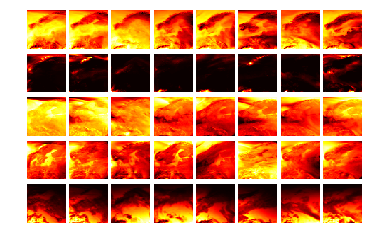

In [107]:
# Convert into Numpy array and read in first four hours
n = np.array(df_r.iloc[0:1000, :])
n = np.reshape(n, (-1, 55, 55, 5))

hours = 8
i = 1
fig, ax = plt.subplots(5, hours)
fig.subplots_adjust(hspace=0.01, wspace=0.1)
for b in range(5):
    for h in range(hours):
        #fig.add_subplot(5, hours, i)
        #plt.imshow(n[h, ..., b], cmap = 'hot')
        ax[b, h].imshow(n[h*30, ..., b], cmap = 'hot')
        ax[b, h].axis('off')
        i = i + 1
fig.savefig('grid.pdf', bbox_inces = 'tight')